# Ejercicio 1. PGR

## Descripción general de la tabla

https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico

Información actualizada de las carpetas de investigación de la Fiscalia General de Justicia (FGJ) de la Cdmx apartir de **enero de 2016**.

Las variables contenidas son Carpetas de Investigación de delitos a nivel calle de la FGJ por FIscalía, Agenica, Unidad de Investigación (UI), fecha de apertura de la carpeta de investigación, delito, categoría de delito, calle, colonia, alcaldía, coordenadas, mes y año.

Actualizaciones mensuales (**última actualización 29 de julio de 2020**) 

**Nota**
1. Pueden presentarse diferencias en lo reportado del Secretariado, ya que el reporte mensual se basa en criterios de homologación del resto de los estados, y solo considera delitos del fuero común excluyendo:
    * incompetencias por tipo de fuero
    * incompetencias por territorio
    * hechos no delictivos
    * denuncias de hechos
    * hechos delicitivos cometidos por menores de edad
    

## Preguntas

1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas. Sólo describe la prueba y qué te dice cada una.

2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los
datos?
3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más
frecuentes?

4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten
cuidado con los delitos con pocas ocurrencias).

5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea
esto?

6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas)?

8. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada
Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de
población no esté actualizado).

    9.1. Pinta un mapa con este indicador. Describe los resultados.

10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra
patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de
Machine Learning no supervisados).
    11.1. ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?

12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con
y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos
delitos?

# Librerías y datos

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

import multiprocessing
from os import getpid
from datetime import datetime

%matplotlib inline

In [2]:
pgr = pd.read_csv('data/48fcb848-220c-4af0-839b-4fd8ac812c0f', delimiter = ",")

/home/abraxas/venv/opi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Resolución

In [3]:
pgr.sample(5)

_id  ao_hechos  mes_hechos         fecha_hechos  ao_inicio  \
18204    18205     2016.0        Mayo  2016-05-04 21:00:00       2016   
280849  280850     2018.0     Febrero  2018-02-19 11:00:00       2018   
613662  613663     2019.0        Mayo  2019-05-29 14:30:00       2019   
240218  240219     2017.0       Enero  2017-01-17 08:00:00       2017   
648739  648740     2018.0  Septiembre  2018-09-27 08:30:00       2018   

        mes_inicio         fecha_inicio  \
18204         Mayo  2016-05-07T16:16:13   
280849     Febrero  2018-02-19T21:22:00   
613662        Mayo  2019-05-29T20:19:41   
240218       Enero  2017-01-17T18:49:41   
648739  Septiembre  2018-09-27T15:41:00   

                                                delito  \
18204                                  ROBO DE OBJETOS   
280849                                         DESPOJO   
613662  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
240218                 ROBO A REPARTIDOR CON VIOLENCIA   
648739                                 ROBO DE OBJETOS   

                               fiscalia agencia unidad_investigacion  \
18204   INVESTIGACIÓN EN ÁLVARO OBREGÓN    AO-4               UI-1CD   
280849    INVESTIGACIÓN EN AZCAPOTZALCO    AZ-1               UI-3SD   
613662       INVESTIGACIÓN EN IZTACALCO   IZC-1               UI-2SD   
240218         INVESTIGACIÓN EN TLALPAN   TLP-4               UI-1CD   
648739      INVESTIGACIÓN EN IZTAPALAPA   IZP-5               UI-1SD   

                                         categoria_delito  \
18204                              DELITO DE BAJO IMPACTO   
280849                             DELITO DE BAJO IMPACTO   
613662  ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...   
240218              ROBO A REPARTIDOR CON Y SIN VIOLENCIA   
648739                             DELITO DE BAJO IMPACTO   

                                         calle_hechos   calle_hechos2  \
18204   CARRETERA A DESIERTO DE LOS LEONES, NUMERO 79       ACUEDUCTO   
280849                               AV. AZCAPOTZALCO             NaN   
613662                              EJE TRES TRONCOSO             NaN   
240218                                 AV.  CAFETALES             NaN   
648739                                       CALLE 63  SAMUEL GOMPERS   

                    colonia_hechos alcaldia_hechos competencia   longitud  \
18204           SANTA ROSA XOCHIAC  ALVARO OBREGON         NaN -99.288340   
280849      CENTRO DE AZCAPOTZALCO    AZCAPOTZALCO         NaN -99.185815   
613662     CAMPAMENTO 2 DE OCTUBRE       IZTACALCO         NaN -99.112350   
240218  RINCONADA COAPA 2A SECCIÓN         TLALPAN         NaN -99.114254   
648739       SANTA CRUZ MEYEHUALCO      IZTAPALAPA         NaN -99.046259   

          latitud  tempo  
18204   19.323868    NaN  
280849  19.483840    NaN  
613662  19.387980    NaN  
240218  19.297204    NaN  
648739  19.348128    NaN

## ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

1. Reliability

    a.  Accuracy: 

        The data provided is accurate

        * API checar si las coordenadas corresponden a domiclio 
        * Fechas con sentido (no fechas >= a la mínima
        * Coordenadas dentro de la ciudad de México

        The data representation (or value) reflects well the actual state of the source information

        * Cruzar información de reporte de plataforma contra mismos agrupados: The data representation (or value) reflects well the actual state of the source information (+-10% variación de los resultados, ya que no coinciden al 100% por lo comentado en la **Nota** inicial)

        The representation of information (data) will not cause ambiguity
        * Datos vacíos: The representation of information (data) will not cause ambiguity

    b. Integrity

        The data format is clear and meets the criteria


        * Se respetan los catálogos de datos (categoría de delito, fiscalía, agencia, unidad de investigación):The data format is clear and meets the criteria
        Data is consistent with structural integrity
        * Tipos de datos
        * Rangos aceptables para variables numéricas 
        * Si hay transformaciones de variables como columnas deben de tener completo sentido
        
    c. Completeness

        Whether a component deficiency will affect the accuracy and integrity of the data
        * fechas >= fecha suceso
        * Id's únicos
        * Coordenadas corresponden al domicilio
        * Coordenadas dentro del país
        * Outliers
        * Missings
    
2. Presentation quality :
    a. Readability
        The data (content, format, etc.) is clear and understandable
        Data description, classification, and coding content meet specification and are easy to understand

        * Existencia de diccionario
        * Existencia de catálogos

Clasificación basada en:

https://translate.google.com/translate?hl=en&sl=es&u=https://blog.powerdata.es/el-valor-de-la-gestion-de-datos/bid/368784/introducci-n-a-la-calidad-de-datos-definici-n-control-y-beneficios&prev=search&pto=aue

## ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [4]:
pgr['fecha_hechos'] = pgr['fecha_hechos'].apply(lambda x: x if not type(x) == str else datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
pgr['fecha_inicio'] = pgr['fecha_inicio'].apply(lambda x: x if not type(x) == str else datetime.strptime(x,'%Y-%m-%dT%H:%M:%S'))

In [5]:
print(f'Total de delitos registrados: {len(pgr)}\n', f'Fecha mínima para hechos: {pgr.fecha_hechos.min()}\n',
      f'Fecha mínima para inicios de carpeta: {pgr.fecha_inicio.min()}')

Total de delitos registrados: 1168250
 Fecha mínima para hechos: 1906-06-02 19:00:00
 Fecha mínima para inicios de carpeta: 2016-01-01 01:35:06


# Limpieza de datos

In [6]:
pgr.shape

(1168250, 20)

#### Tipo de datos

In [7]:
pgr.dtypes.to_frame()

0
_id                            int64
ao_hechos                    float64
mes_hechos                    object
fecha_hechos          datetime64[ns]
ao_inicio                      int64
mes_inicio                    object
fecha_inicio          datetime64[ns]
delito                        object
fiscalia                      object
agencia                       object
unidad_investigacion          object
categoria_delito              object
calle_hechos                  object
calle_hechos2                 object
colonia_hechos                object
alcaldia_hechos               object
competencia                   object
longitud                     float64
latitud                      float64
tempo                        float64

In [8]:
pgr.isnull().sum()

_id                           0
ao_hechos                   433
mes_hechos                  433
fecha_hechos                433
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  0
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               2969
calle_hechos2            709215
colonia_hechos            47432
alcaldia_hechos            3177
competencia             1064079
longitud                  46464
latitud                   46464
tempo                   1168250
dtype: int64

**NULOS**
* Fecha_hechos
    Imputar nulos de fechas con 1900-01-01 (asegurarnos que no hay registros con este valor)

* Fiscalia, unidad_investigacion, calle_hechos, calle_hechoS2, colonia_hechos, alcaldia_hechos, competencia
    Imputar con "SIN INFORMACIÓN"
    
* Longitud/latitud
    No imputar

* Tempo
    Eliminar

In [9]:
pgr['mes_hechos'] = pgr.fecha_hechos.dt.month
pgr['ao_hechos'] = pgr.fecha_hechos.dt.year

In [10]:
pgr['mes_inicio'] = pgr.fecha_inicio.dt.month
pgr['ao_inicio'] = pgr.fecha_inicio.dt.year

In [11]:
col_str = ['delito', 'fiscalia', 'agencia','unidad_investigacion', 'categoria_delito', 'calle_hechos',
           'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia']
col_int = ['_id', 'ao_hechos', 'mes_hechos','ao_inicio','mes_inicio']
col_dt = ['fecha_hechos','fecha_inicio']
col_float = ['longitud', 'latitud', 'tempo']

In [12]:
#Asegurarme que no olvido o me sobra alguna variable
print(len(set(col_dt+col_float+col_int+col_str))/len(pgr.columns),
      len(col_dt+col_float+col_int+col_str)/len(pgr.columns))

1.0 1.0


In [13]:
col_str

['delito',
 'fiscalia',
 'agencia',
 'unidad_investigacion',
 'categoria_delito',
 'calle_hechos',
 'calle_hechos2',
 'colonia_hechos',
 'alcaldia_hechos',
 'competencia']

In [14]:
pgr[col_str] = pgr[col_str].astype(str)

In [15]:
col_float

['longitud', 'latitud', 'tempo']

In [16]:
pgr[col_float] = pgr[col_float].astype(float)

In [17]:
pgr[col_int] = pgr[col_int].astype(pd.Int32Dtype())

In [18]:
pgr.dtypes.to_frame()

0
_id                            Int32
ao_hechos                      Int32
mes_hechos                     Int32
fecha_hechos          datetime64[ns]
ao_inicio                      Int32
mes_inicio                     Int32
fecha_inicio          datetime64[ns]
delito                        object
fiscalia                      object
agencia                       object
unidad_investigacion          object
categoria_delito              object
calle_hechos                  object
calle_hechos2                 object
colonia_hechos                object
alcaldia_hechos               object
competencia                   object
longitud                     float64
latitud                      float64
tempo                        float64

#### Categorías, rangos y outliers

* Latitud (-90,90)
* Longitud (-180,180)
* Fecha inicio >= 2016
* Fecha hechos <= fecha_inicio
* Tempo >= 0

In [19]:
pgr[['latitud','longitud','ao_hechos','ao_inicio','tempo']].describe()

latitud      longitud     ao_hechos     ao_inicio  tempo
count  1.121786e+06  1.121786e+06  1.167817e+06  1.168250e+06    0.0
mean   1.938754e+01 -9.913727e+01  2.017964e+03  2.018112e+03    NaN
std    6.966439e-02  5.970430e-02  1.734185e+00  1.422001e+00    NaN
min    1.909535e+01 -1.002319e+02  1.906000e+03  2.016000e+03    NaN
25%    1.934020e+01 -9.917550e+01  2.017000e+03  2.017000e+03    NaN
50%    1.939013e+01 -9.914218e+01  2.018000e+03  2.018000e+03    NaN
75%    1.943771e+01 -9.910001e+01  2.019000e+03  2.019000e+03    NaN
max    1.958333e+01 -9.894686e+01  2.021000e+03  2.021000e+03    NaN

In [20]:
pgr[pgr.ao_inicio<2016]

Empty DataFrame
Columns: [_id, ao_hechos, mes_hechos, fecha_hechos, ao_inicio, mes_inicio, fecha_inicio, delito, fiscalia, agencia, unidad_investigacion, categoria_delito, calle_hechos, calle_hechos2, colonia_hechos, alcaldia_hechos, competencia, longitud, latitud, tempo]
Index: []

In [21]:
len(pgr[(pgr.fecha_hechos.dt.date>pgr.fecha_inicio.dt.date)])/len(pgr)

8.38861545046009e-05

In [22]:
len(pgr._id)/len(pgr)

1.0

* Las coordenadas entran dentro del rango

* Inicio de carpetas si es apartir de 2016

* Fecha hechos > fecha inicio (sin contar diferencia de horas) son datos que no cumplen con data accuracy ya que no pudo haberse cometido délito después de iniciar la carpeta de investigación. ¿O sí?

**Beredicto**: Son eliminados 0.00003886%

* _id si es un identificador para cada carpeta de investigación

In [23]:
pgr = pgr[~(pgr.fecha_hechos.dt.date>pgr.fecha_inicio.dt.date)].reset_index(drop=True).copy()

In [24]:
pgr.shape

(1168152, 20)

In [25]:
pgr.columns

Index(['_id', 'ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio',
       'mes_inicio', 'fecha_inicio', 'delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'categoria_delito', 'calle_hechos',
       'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia',
       'longitud', 'latitud', 'tempo'],
      dtype='object')

In [26]:
pgr.drop(['tempo'],axis=1,inplace=True)

In [27]:
pgr.columns

Index(['_id', 'ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio',
       'mes_inicio', 'fecha_inicio', 'delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'categoria_delito', 'calle_hechos',
       'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia',
       'longitud', 'latitud'],
      dtype='object')

In [28]:
ident = ['id']
var_cont = ['longitud', 'latitud']
var_disc = ['ao_hechos','ao_inicio',]
var_cat  = ['mes_hechos','mes_inicio','delito', 'fiscalia', 'agencia','unidad_investigacion', 'categoria_delito', 
            'calle_hechos','calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'competencia']
var_dts  = ['fecha_hechos','fecha_inicio']

In [29]:
#Asegurarme que no olvido o me sobra alguna variable
print(len(set(ident+var_cont+var_disc+var_cat+var_dts))/len(pgr.columns),
      len(ident+var_cont+var_disc+var_cat+var_dts)/len(pgr.columns))

1.0 1.0


In [30]:
for columna in var_cat:
    print(columna,'*'*10,pgr[columna].value_counts(1),'-'*5,len(pgr[columna].unique()))

mes_hechos ********** 1     0.093322
2     0.090523
10    0.087744
3     0.084797
8     0.084068
11    0.082795
9     0.082279
5     0.080927
7     0.080018
12    0.079815
6     0.078339
4     0.075373
Name: mes_hechos, dtype: Float64 ----- 13
mes_inicio ********** 2     0.092859
1      0.09252
10    0.088795
3     0.084758
8     0.084506
11    0.082475
9     0.081632
7     0.080881
12     0.07905
5     0.078988
6     0.078079
4     0.075458
Name: mes_inicio, dtype: Float64 ----- 12
delito ********** VIOLENCIA FAMILIAR                        9.956838e-02
FRAUDE                                    6.042878e-02
ROBO DE OBJETOS                           5.900174e-02
ROBO A NEGOCIO SIN VIOLENCIA              5.595419e-02
AMENAZAS                                  5.243068e-02
                                              ...     
DESACATO                                  8.560530e-07
SECUESTRO                                 8.560530e-07
VIOLACION A LOS DERECHOS HUMANOS          8.560530e-07

## ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

pgr = pgr.drop(columns=['n'])

In [31]:
pgr['num_delitos'] = 1

In [32]:
group_delito = pgr[['num_delitos','delito']].groupby(['delito']).sum().sort_values(by='num_delitos',ascending=False)/len(pgr)*100

In [33]:
group_delito

num_delitos
delito                                                         
VIOLENCIA FAMILIAR                                     9.956838
FRAUDE                                                 6.042878
ROBO DE OBJETOS                                        5.900174
ROBO A NEGOCIO SIN VIOLENCIA                           5.595419
AMENAZAS                                               5.243068
...                                                         ...
SECUESTRO                                              0.000086
ASOCIACION DELICTUOSA                                  0.000086
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y...     0.000086
VIOLACION Y ROBO DE VEHICULO                           0.000086
CALUMNIAS                                              0.000086

[341 rows x 1 columns]

## Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [34]:
fecha_final = datetime.today()
fecha_inicial = fecha_final-timedelta(weeks=52)

In [35]:
pgr_lastyear = pgr[(pgr.fecha_hechos>=fecha_inicial) & (pgr.fecha_hechos<=fecha_final)].copy()

In [36]:
lista_fechas = pd.date_range(fecha_inicial,fecha_final,freq='D').strftime('%Y-%m').unique().tolist()

### Mes-anio

In [37]:
pgr_lastyear = pgr_lastyear[~pgr_lastyear.fecha_hechos.isnull()].copy()

pgr_lastyear['mes_anio_hechos'] = pgr_lastyear['fecha_hechos'].apply(lambda x: x.strftime('%Y-%m'))
pgr_lastyear['semana_anio_hechos'] = pgr_lastyear['fecha_hechos'].apply(lambda x: x.strftime('%Y-%WS'))

In [38]:
group_delito_lastyear = pgr_lastyear[['num_delitos','delito']].groupby(['delito']).sum().sort_values(by='num_delitos',ascending=False)
group_delito_lastyear.reset_index(inplace=True)
group_delito_lastyear['pct_delitos'] = group_delito_lastyear['num_delitos']/len(pgr_lastyear)*100

In [39]:
def crecimiento(periodo,data):
    if periodo == 'semanas':
        columna = 'semana_anio_hechos'
    elif periodo == 'mes':
        columna =  'mes_anio_hechos'
    agrupado = data[[columna,'delito','num_delitos']].groupby([columna,'delito']).sum().reset_index()
    result_delito = pd.DataFrame()
    for delito in agrupado.delito.unique():
        agrupado_delito = agrupado[agrupado.delito==delito].copy()
        aux = [x for x in lista_fechas if x not in agrupado_delito[columna].unique()]
        agrupado_delito = agrupado_delito.append(pd.DataFrame({columna:aux,'delito':delito,'num_delitos':[0]*len(aux)})).sort_values(by=columna).reset_index(drop=True)
        #agrupado_delito['diff_'] = (agrupado_delito['num_delitos']-agrupado_delito['num_delitos'].shift(1))
        #agrupado_delito.dropna(inplace=True)
        x = np.arange(0,len(agrupado_delito))
        y=np.array(agrupado_delito.num_delitos)
        z = np.polyfit(x,y,1)
        result_delito = result_delito.append(pd.DataFrame({'delito':[delito],'m':[z[0]]}))
    return result_delito
                                    

In [40]:
result_delito = crecimiento('semanas',pgr_lastyear)

In [41]:
result_delito

delito         m
0                                  ABUSO DE CONFIANZA -0.154814
0                                            AMENAZAS  0.758265
0                                             COHECHO -0.006606
0                          CONTRA LA INTIMIDAD SEXUAL  0.144573
0   DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...  0.232382
..                                                ...       ...
0    HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE  0.002198
0        ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA  0.002198
0                                   HOMICIDIO CULPOSO  0.015385
0                     PERDIDA DE LA VIDA POR DERRUMBE  0.028571
0                                   REGULACIÓN URBANA  0.028571

[270 rows x 2 columns]

In [42]:
result_delito = result_delito.merge(group_delito_lastyear,on=['delito'])

In [43]:
result_delito['m*pct'] = result_delito["m"]*result_delito["pct_delitos"]

In [44]:
result_delito = result_delito.sort_values(by='m*pct',ascending = False)

In [45]:
result_delito_crec = result_delito.head(10)
result_delito_decrec = result_delito.tail(10)

In [46]:
result_delito_crec

delito         m  num_delitos  \
44                                  VIOLENCIA FAMILIAR  2.258668        20608   
1                                             AMENAZAS  0.758265        10182   
31      ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA  1.221093         6175   
139                         ROBO DE ACCESORIOS DE AUTO  0.728208         5531   
33                                     ROBO DE OBJETOS  0.360910         5939   
9                                               FRAUDE  0.185696         8383   
24                        ROBO A NEGOCIO SIN VIOLENCIA  0.442267         2707   
150        ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO  0.232946         3319   
121                       ROBO A NEGOCIO CON VIOLENCIA  0.548194         1382   
37   ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...  0.165941         3511   

     pct_delitos      m*pct  
44     15.247904  34.439953  
1       7.533684   5.712527  
31      4.568896   5.579049  
139     4.092399   2.980118  
33      4.394279   1.585937  
9       6.202600   1.151797  
24      2.002915   0.885824  
150     2.455735   0.572054  
121     1.022545   0.560553  
37      2.597797   0.431081

In [47]:
result_delito_decrec

delito         m  num_delitos  \
153  ROBO S/V DENTRO DE NEGOCIOS, AUTOSERVICIOS, CO... -0.043584          715   
99                       NEGACION DEL SERVICIO PUBLICO -0.084052          375   
36   ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI... -0.023383         1425   
91                       LA ADMINISTRACION DE JUSTICIA -0.078204          548   
26   ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE... -0.215933          715   
73                                             DESPOJO -0.080637         2653   
23   ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIE... -0.290317          757   
21   PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI... -0.193437         1495   
0                                   ABUSO DE CONFIANZA -0.154814         2019   
17                        NARCOMENUDEO POSESION SIMPLE -0.246976         2596   

     pct_delitos     m*pct  
153     0.529030 -0.023057  
99      0.277463 -0.023321  
36      1.054361 -0.024654  
91      0.405466 -0.031709  
26      0.529030 -0.114235  
73      1.962960 -0.158287  
23      0.560106 -0.162608  
21      1.106154 -0.213971  
0       1.493863 -0.231270  
17      1.920786 -0.474389

In [48]:
agrupado_delito_mesanio = pgr_lastyear.groupby(['delito','mes_anio_hechos'])[['num_delitos']].sum().reset_index()

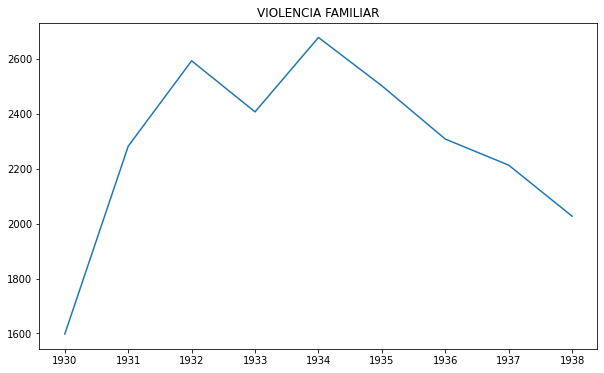

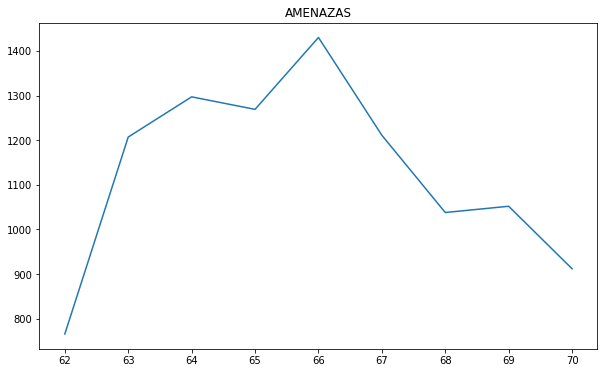

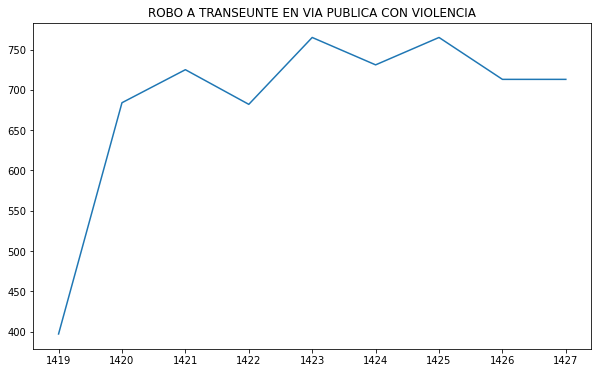

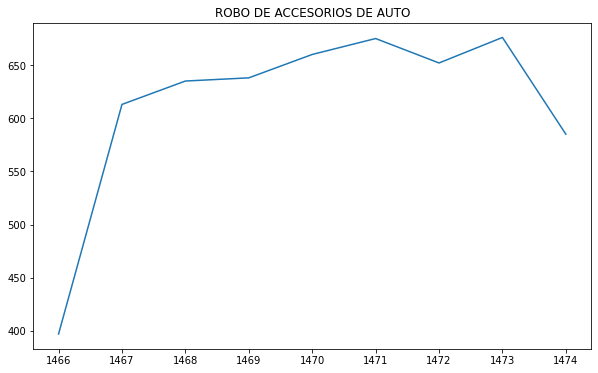

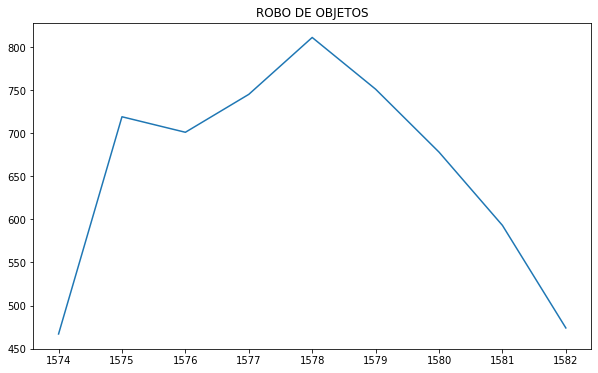

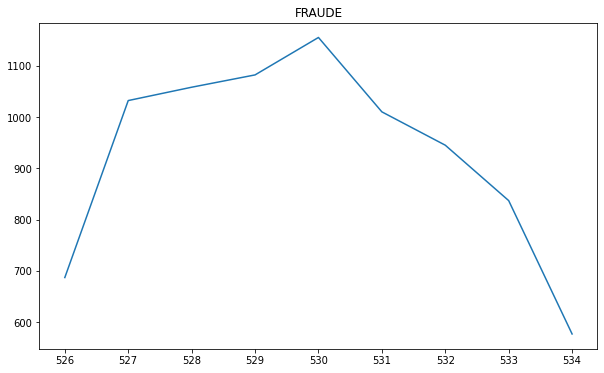

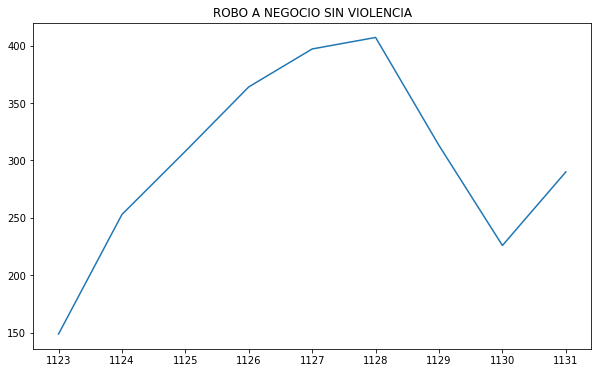

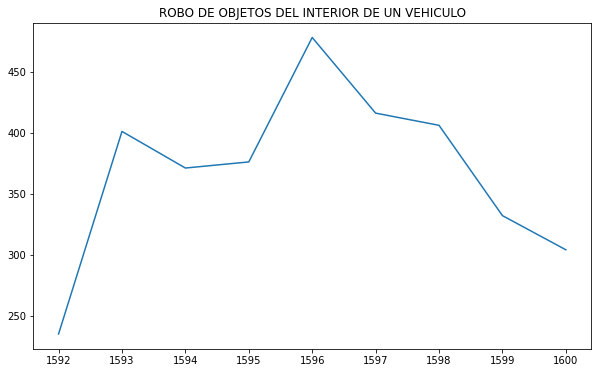

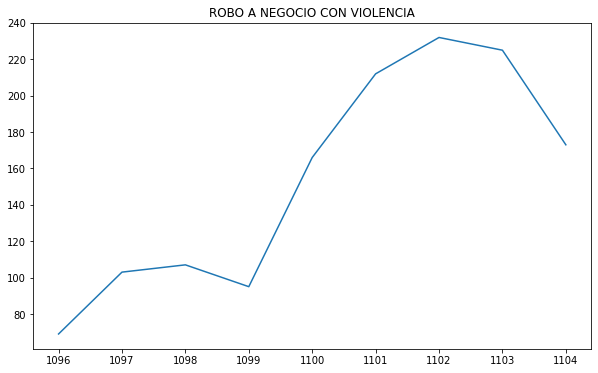

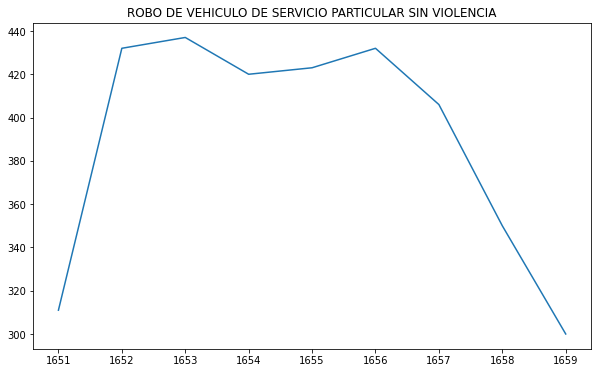

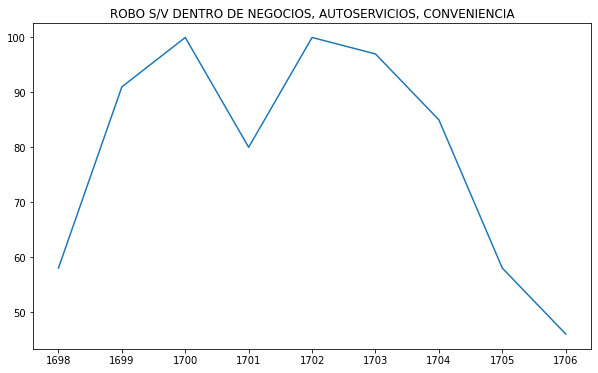

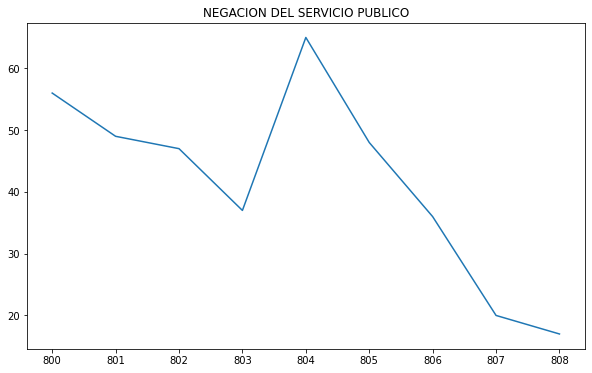

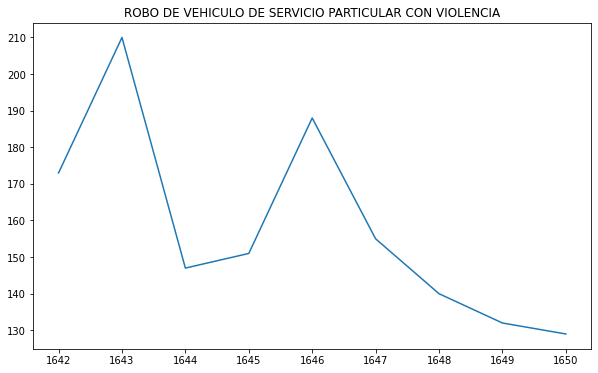

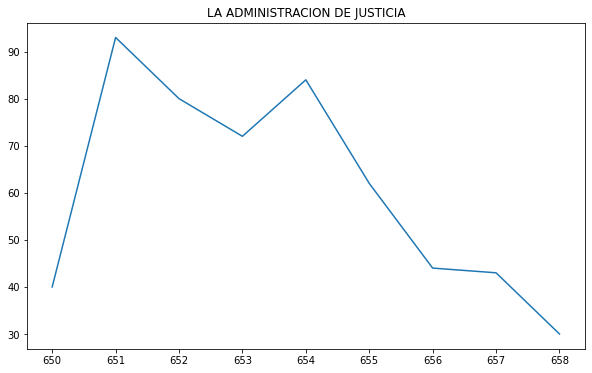

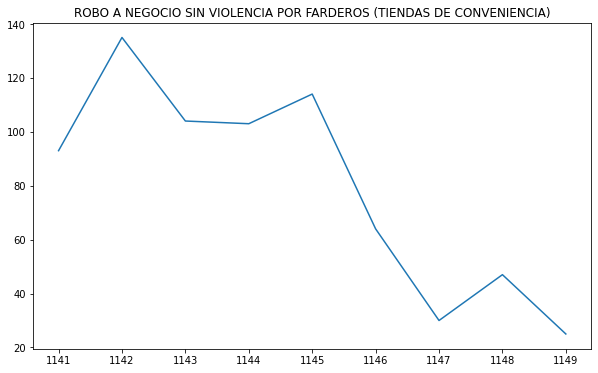

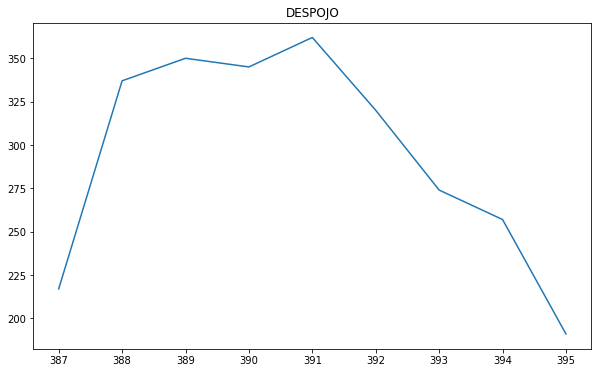

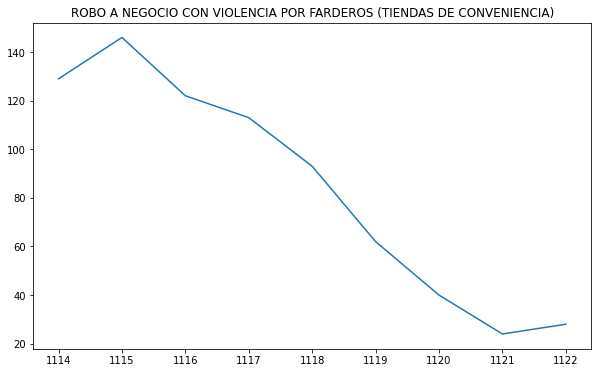

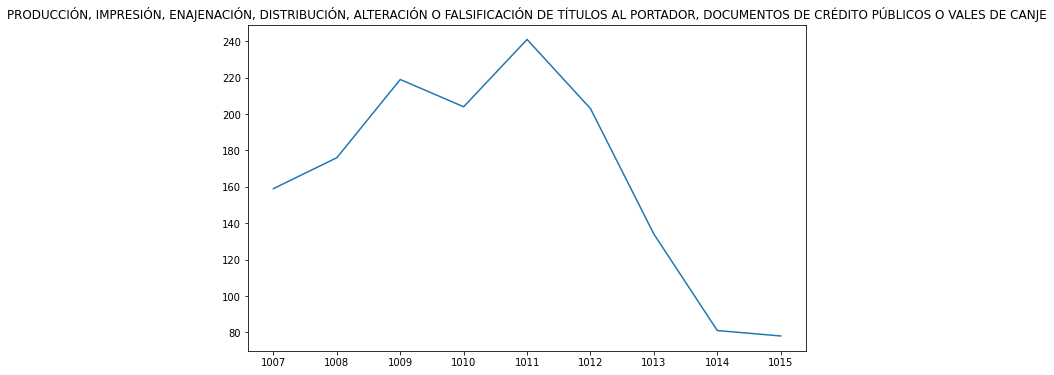

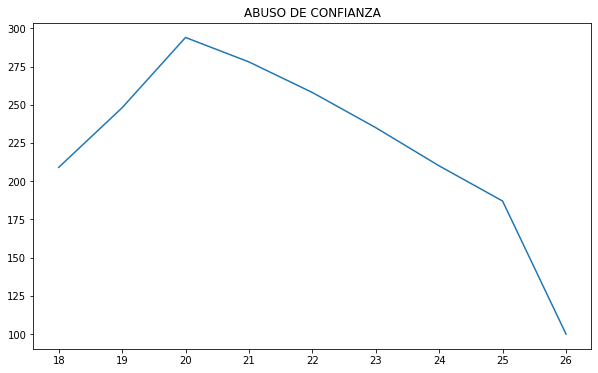

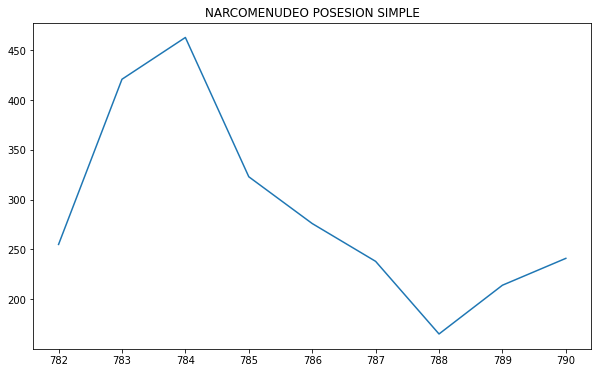

In [49]:
for delito in result_delito_crec.delito.tolist()+result_delito_decrec.delito.tolist():
    fig = plt.figure(figsize=(10,6))
    plt.plot(agrupado_delito_mesanio[agrupado_delito_mesanio.delito == delito].num_delitos)
    plt.title(delito)
    plt.show()

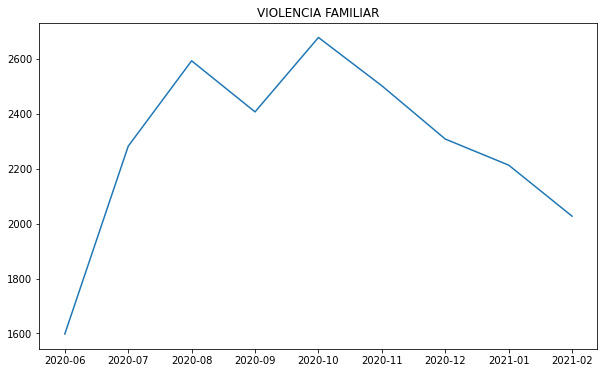

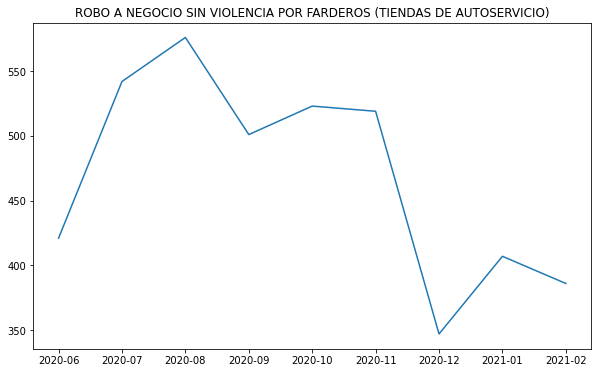

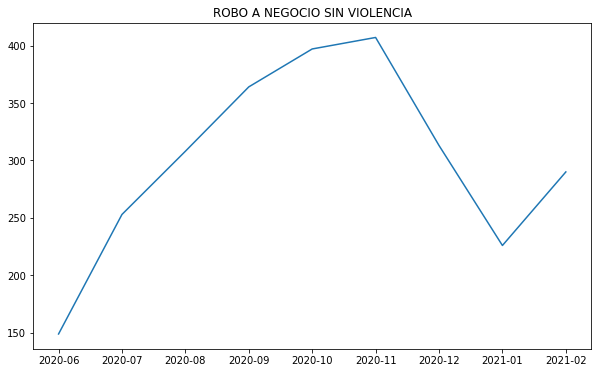

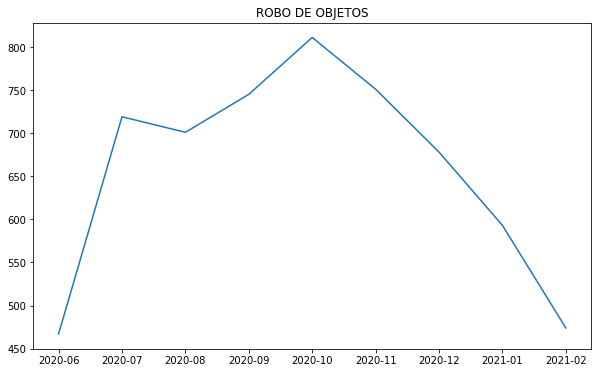

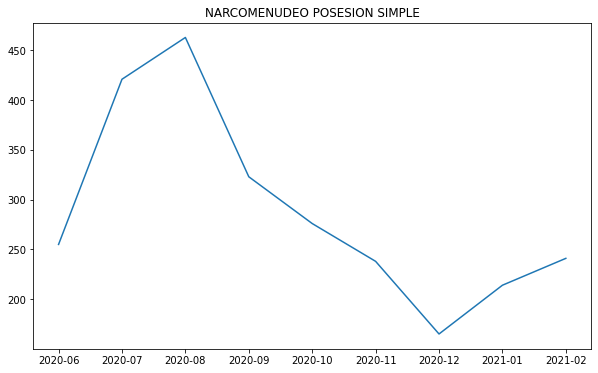

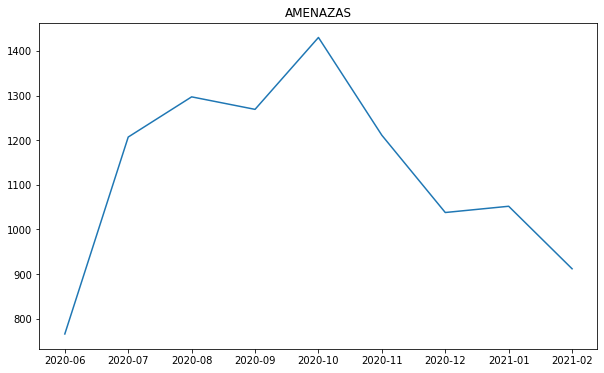

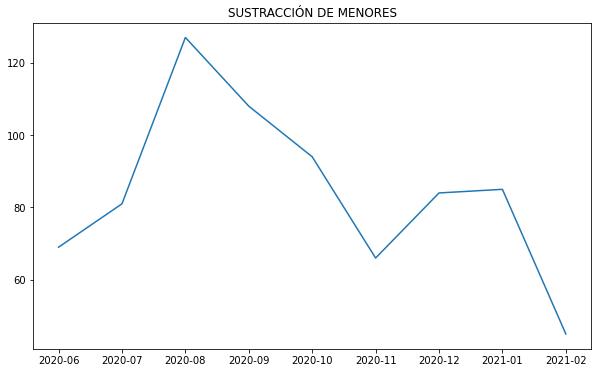

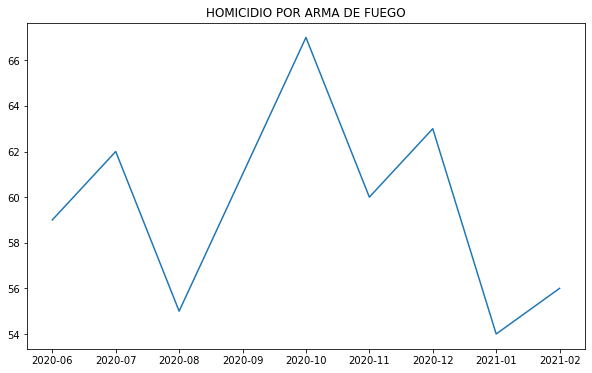

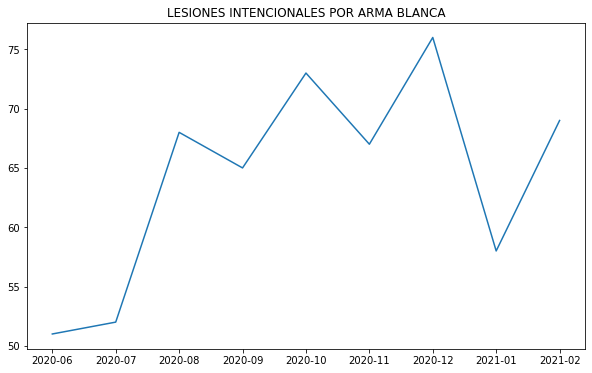

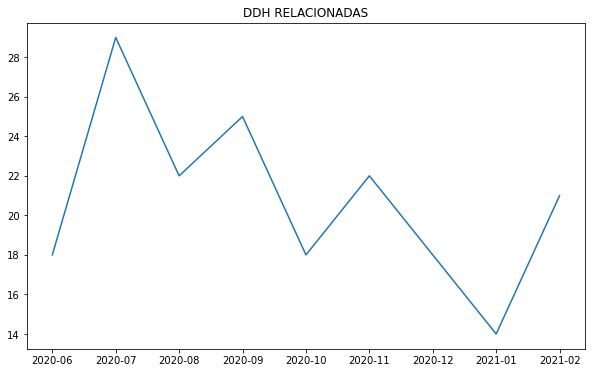

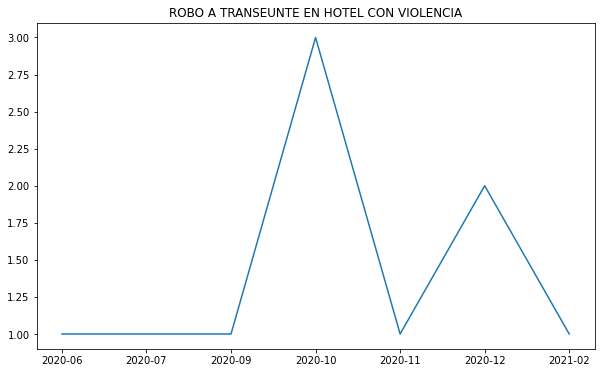

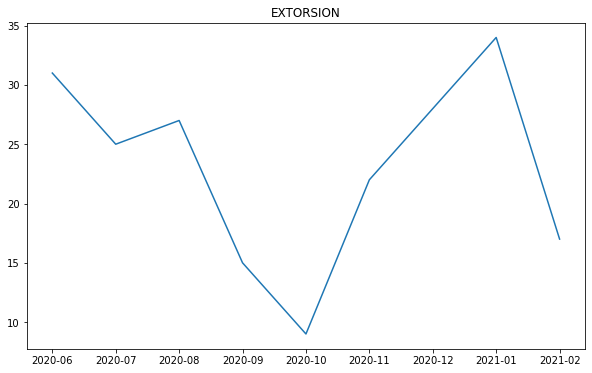

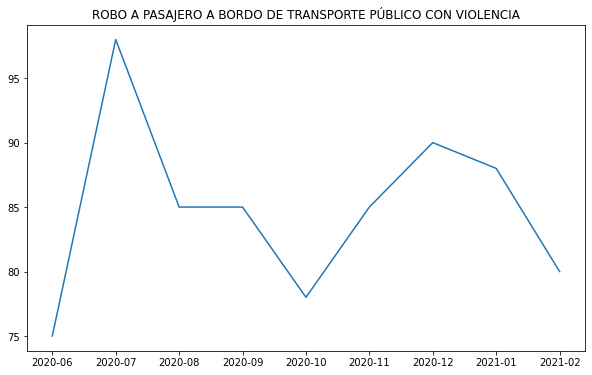

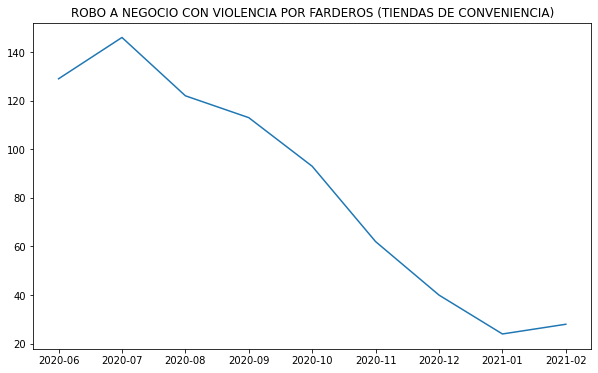

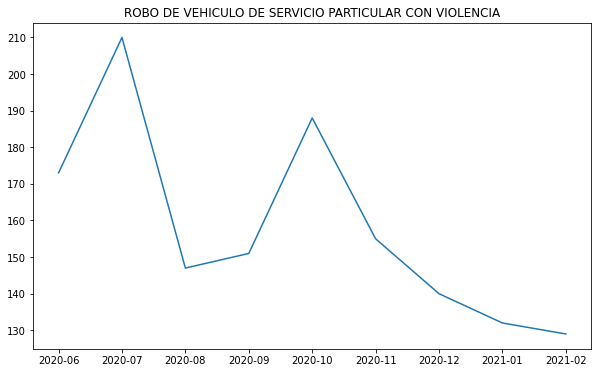

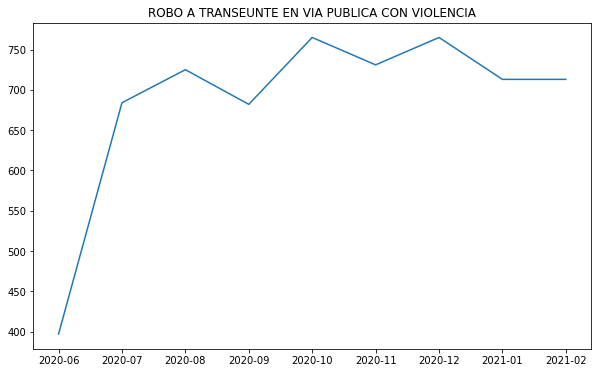

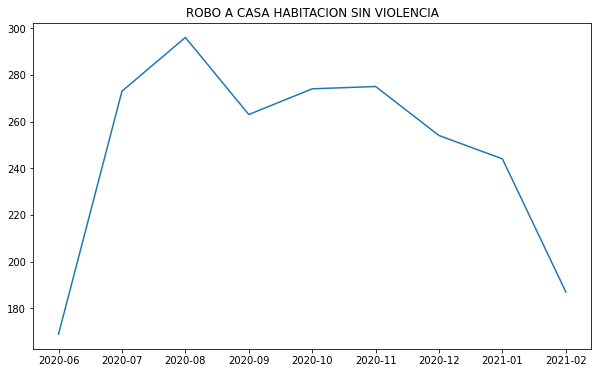

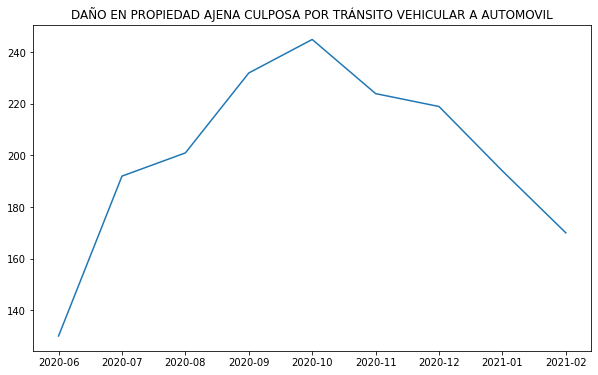

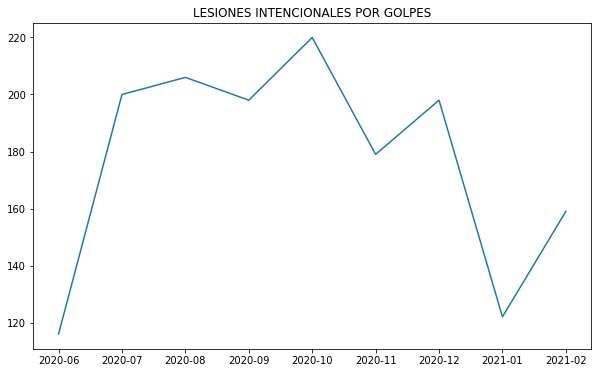

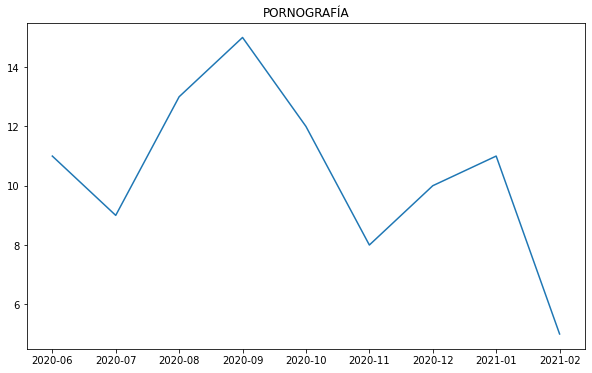

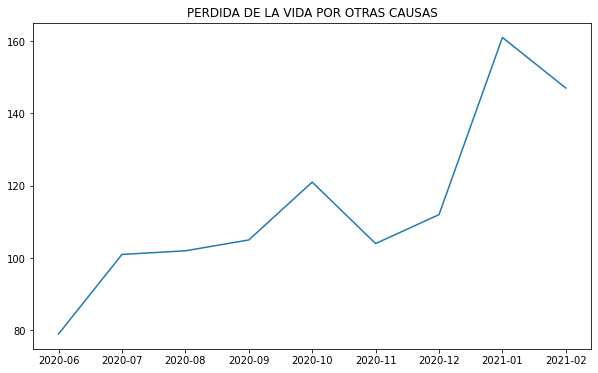

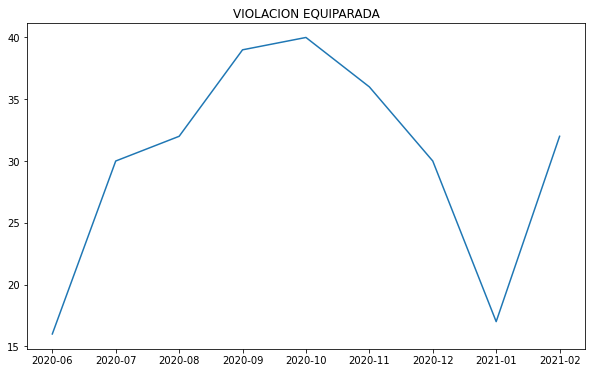

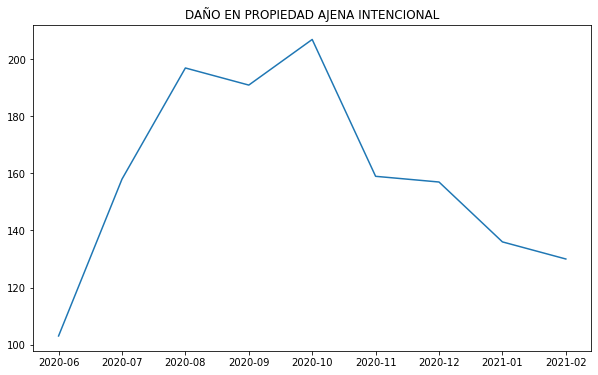

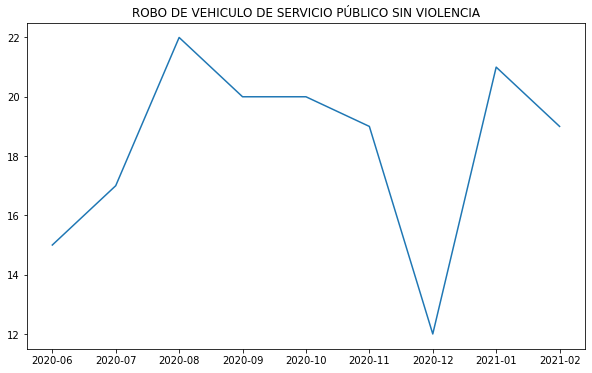

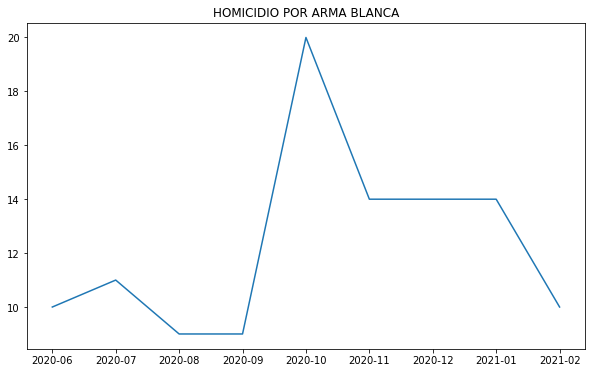

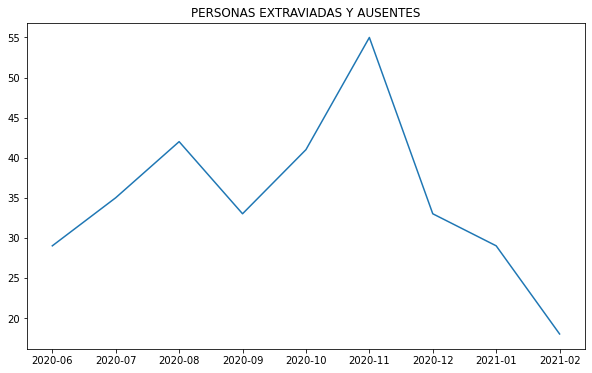

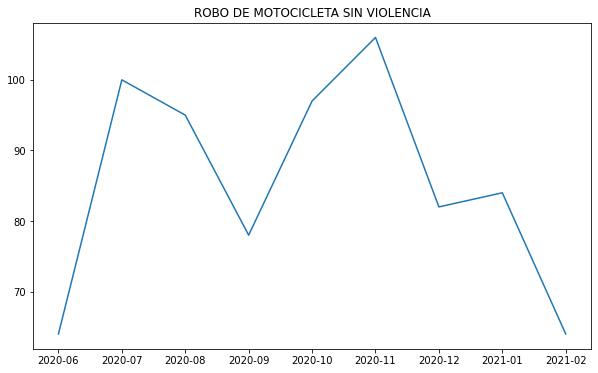

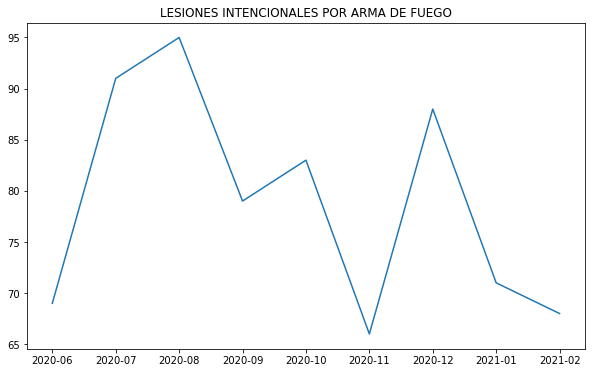

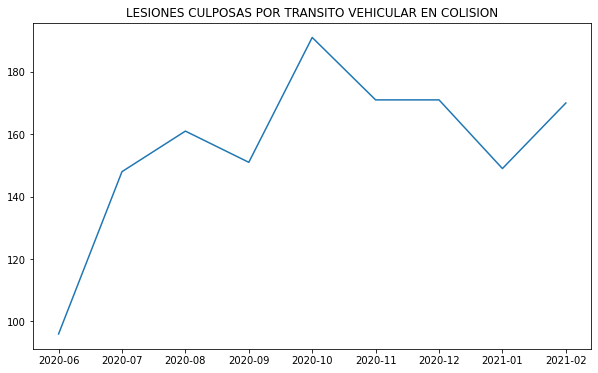

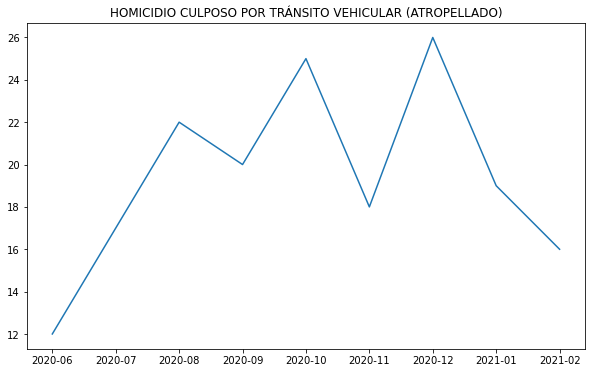

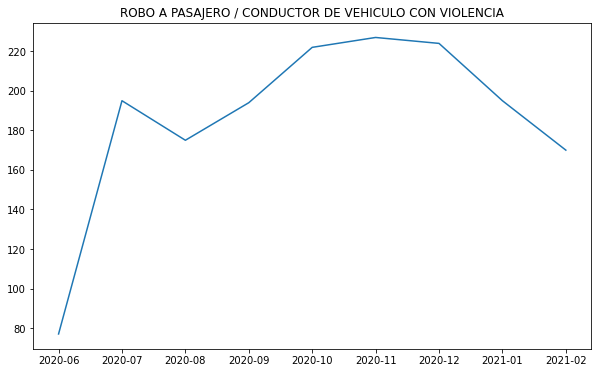

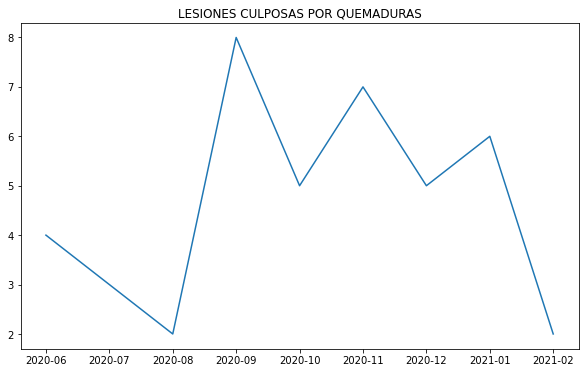

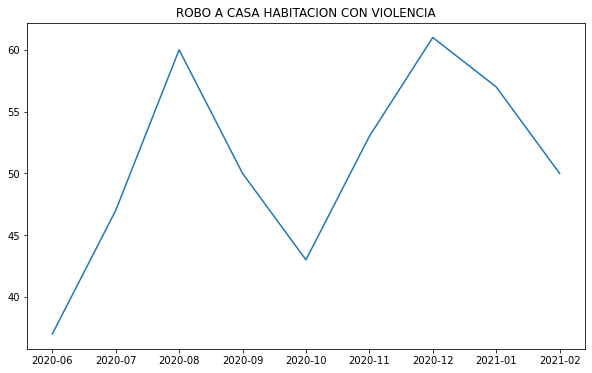

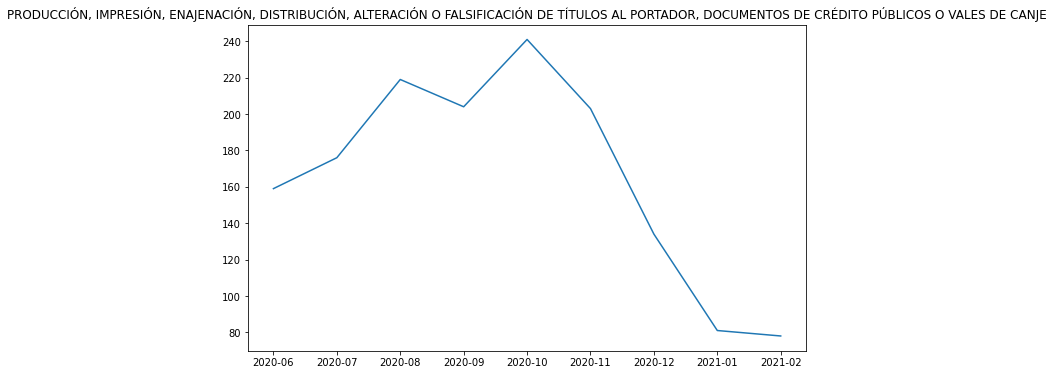

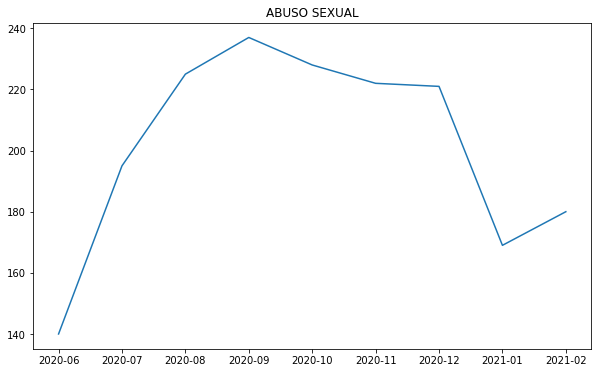

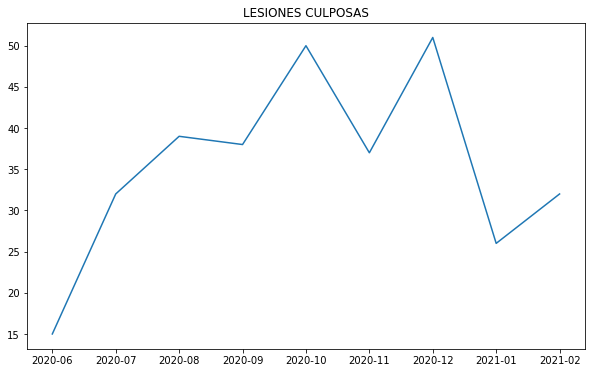

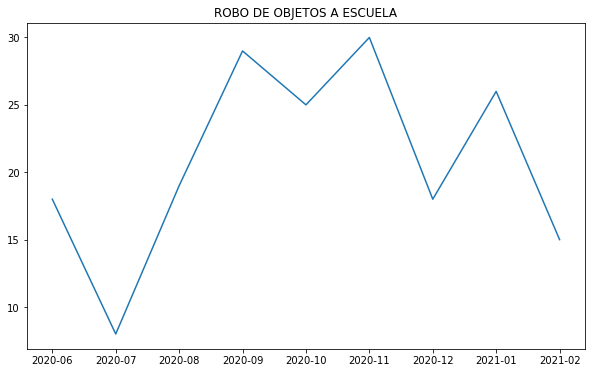

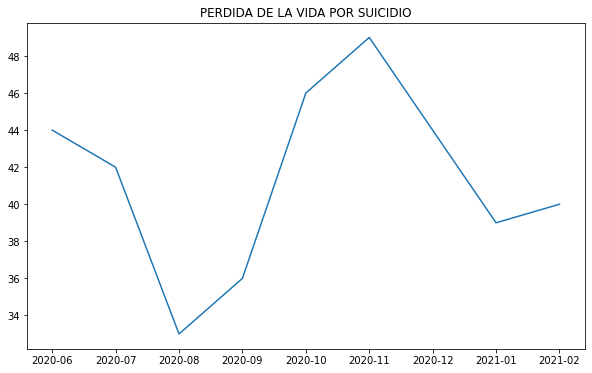

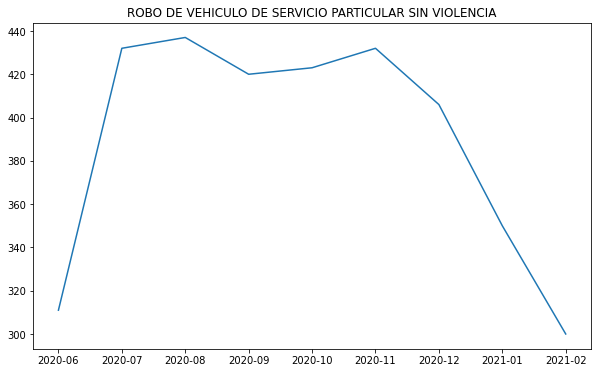

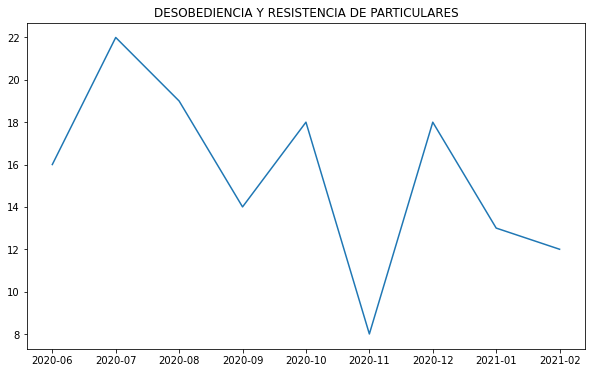

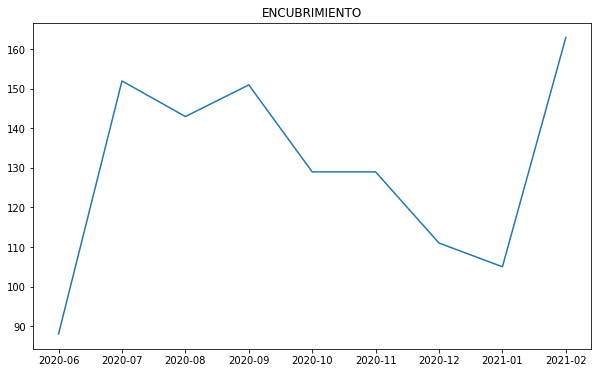

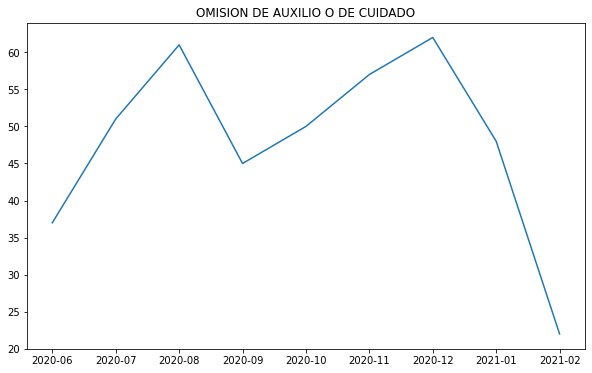

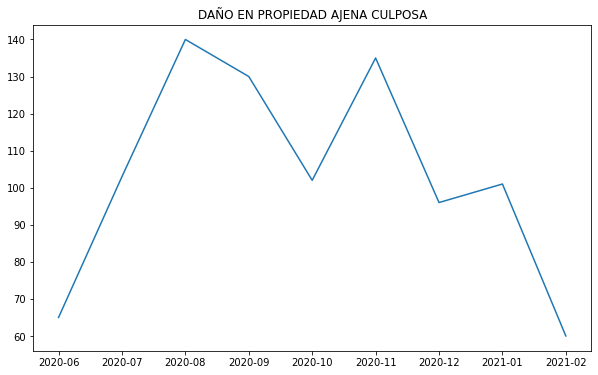

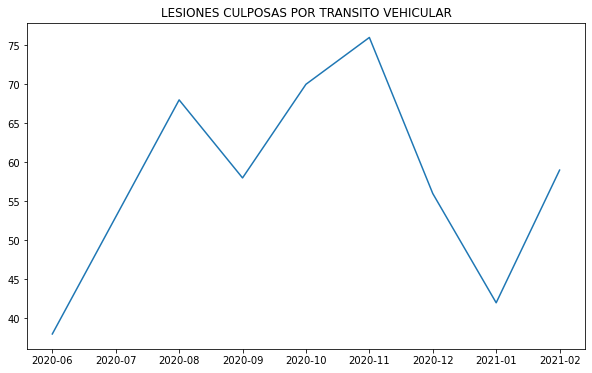

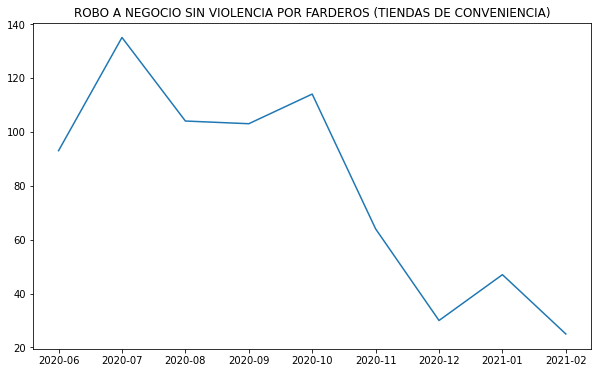

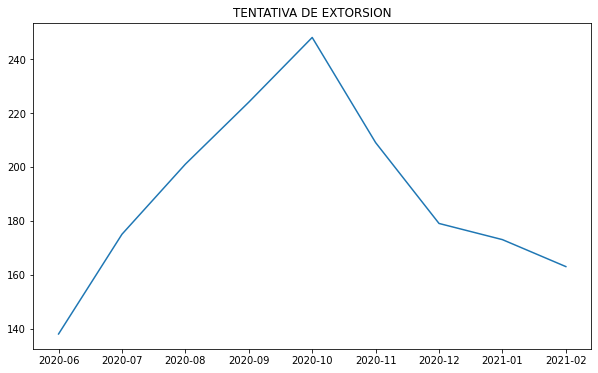

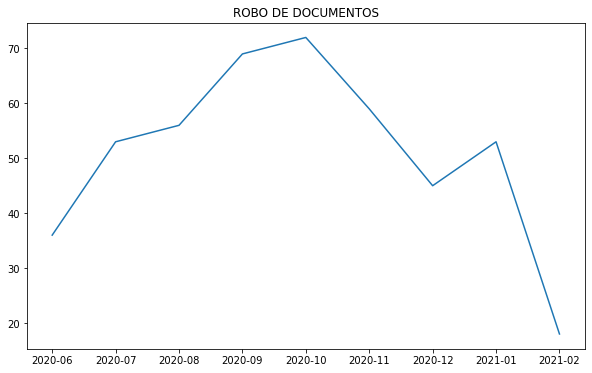

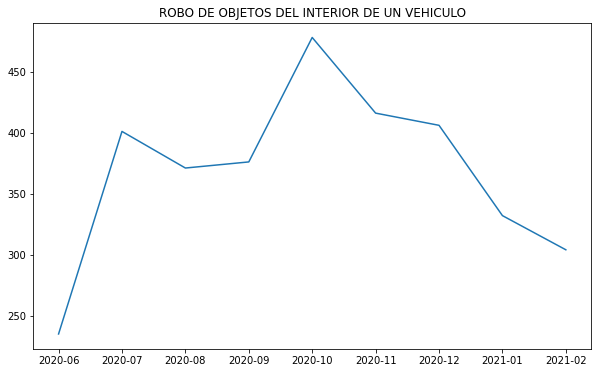

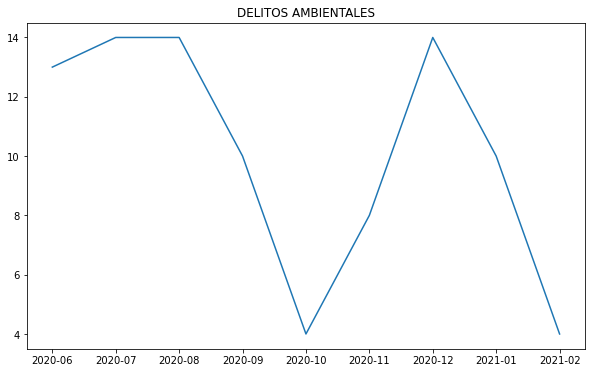

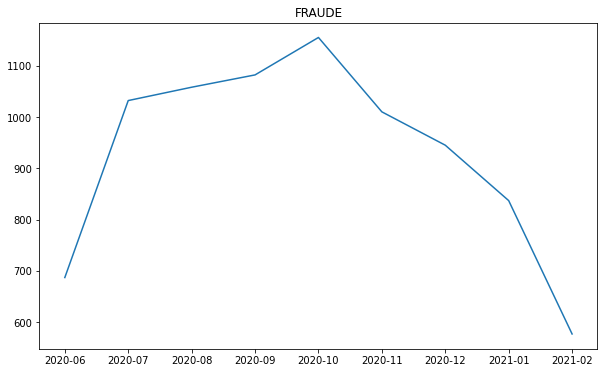

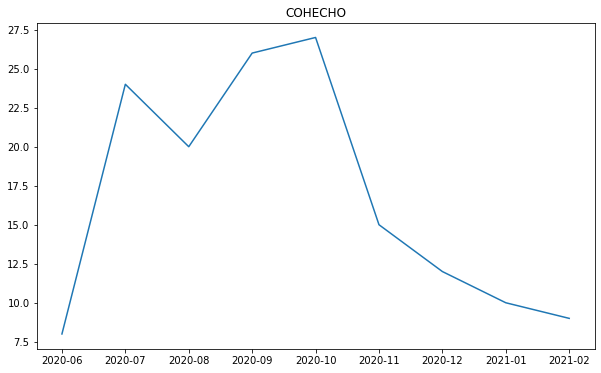

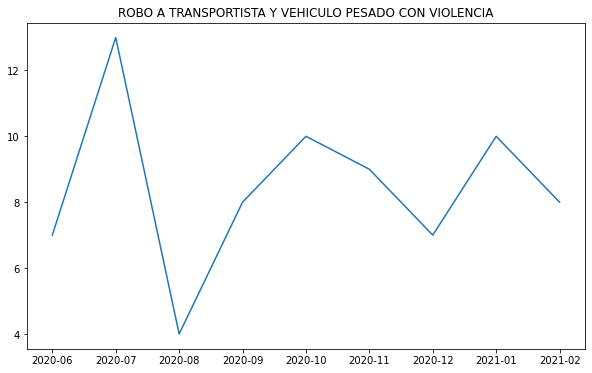

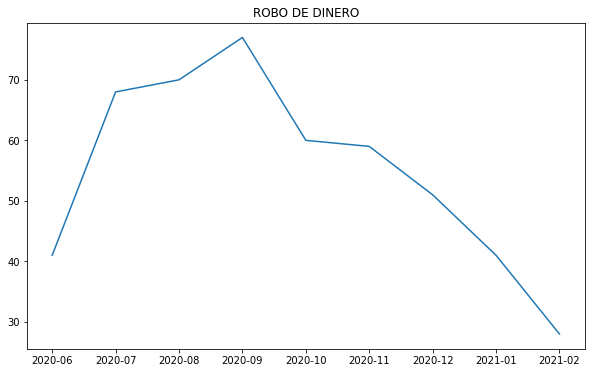

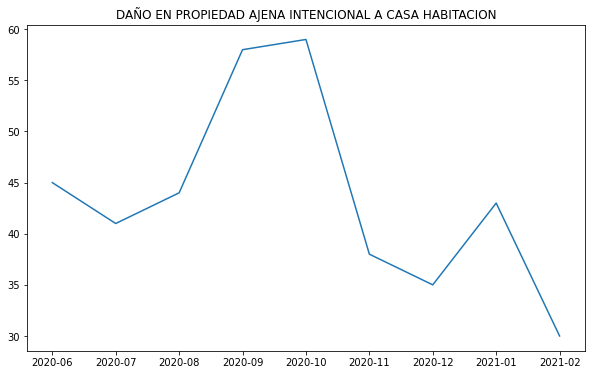

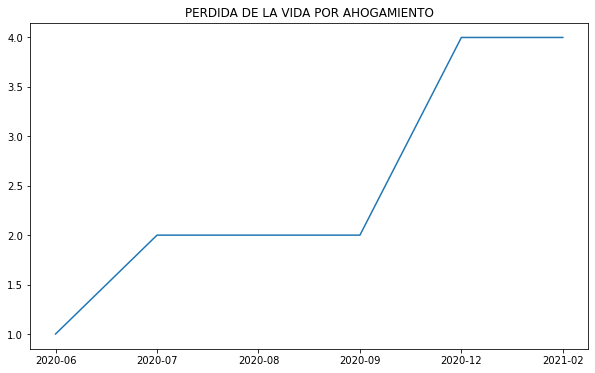

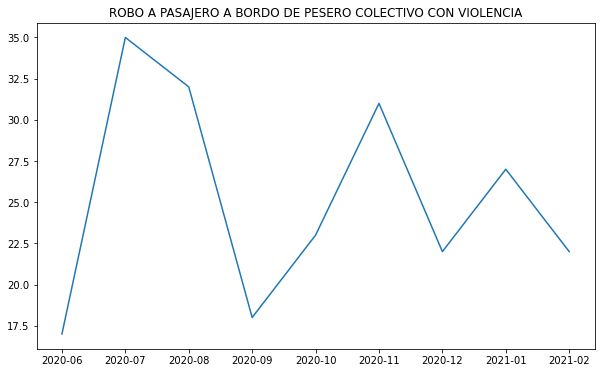

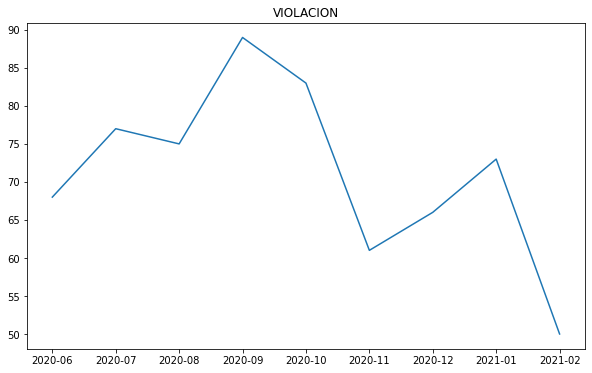

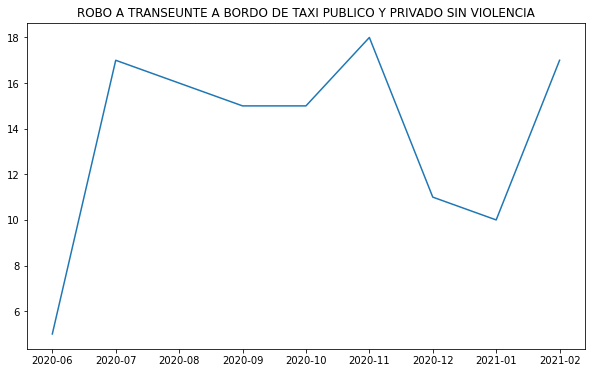

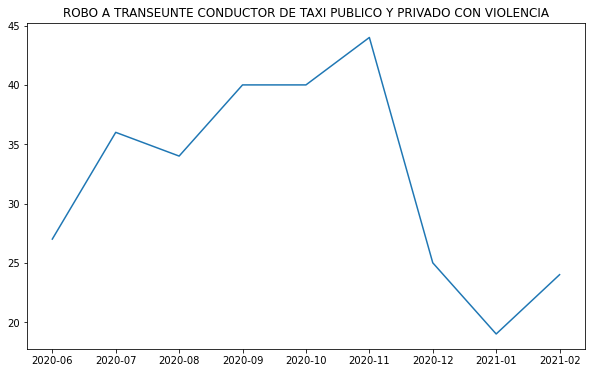

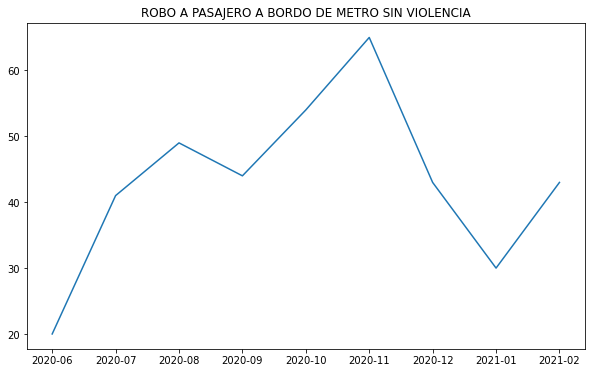

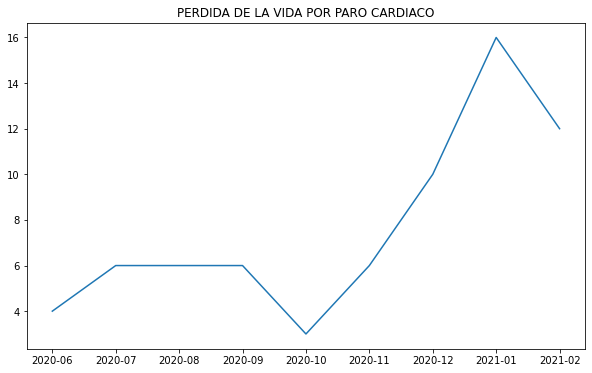

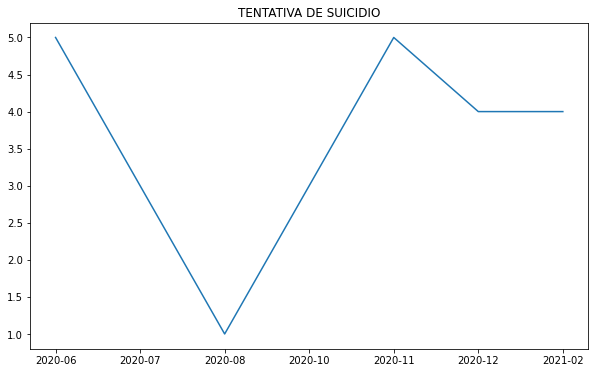

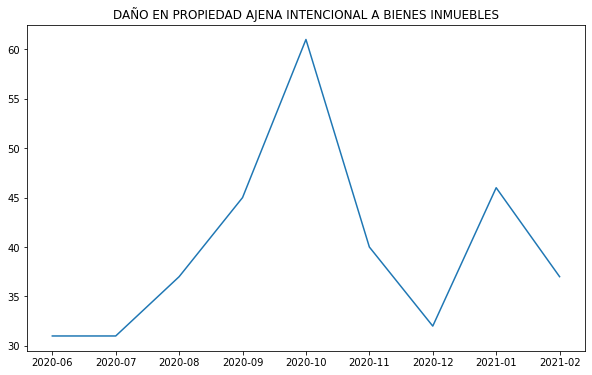

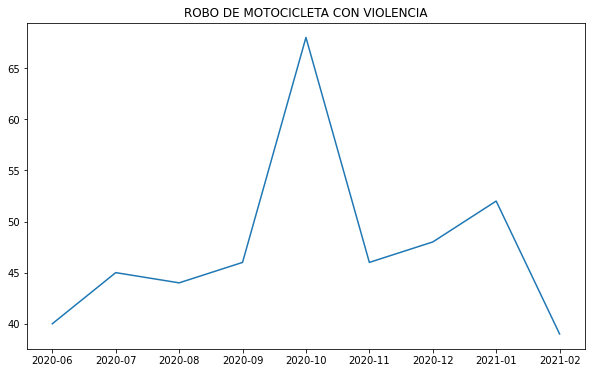

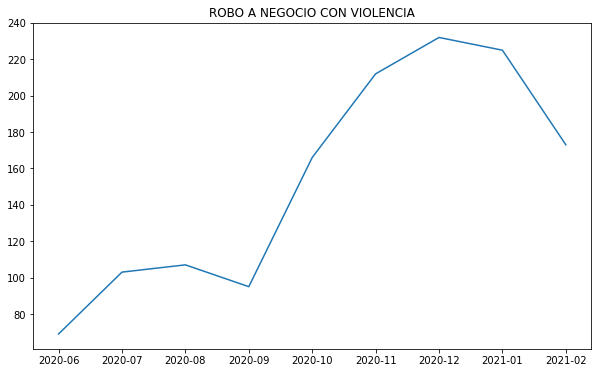

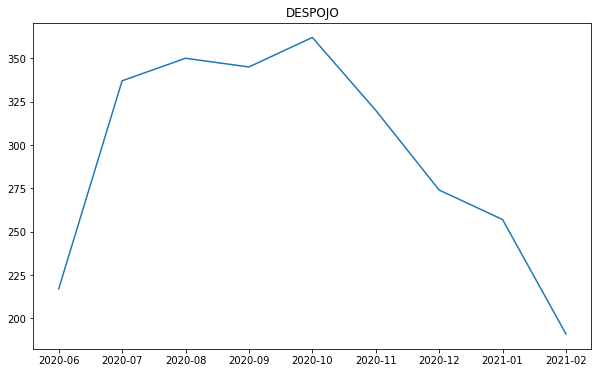

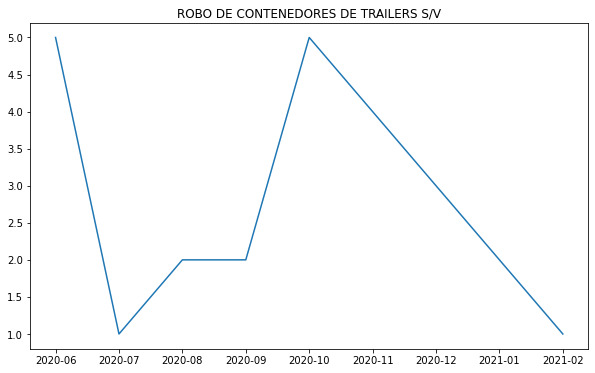

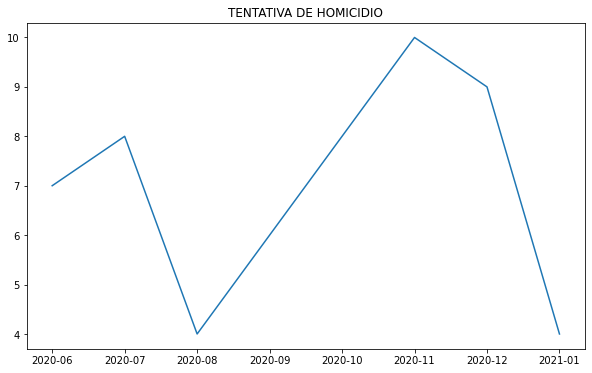

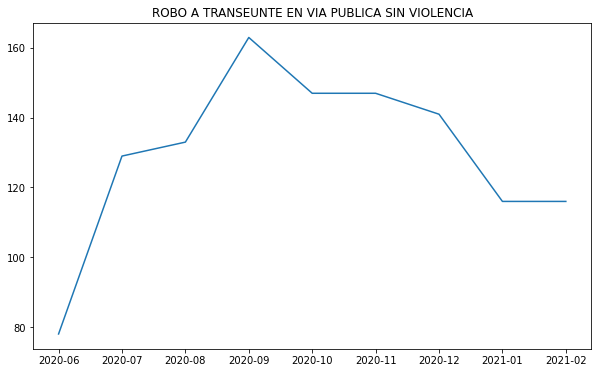

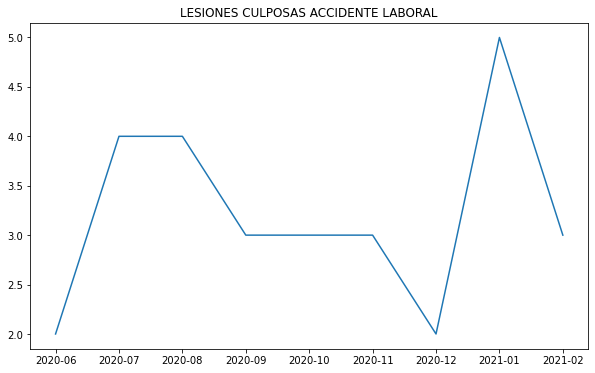

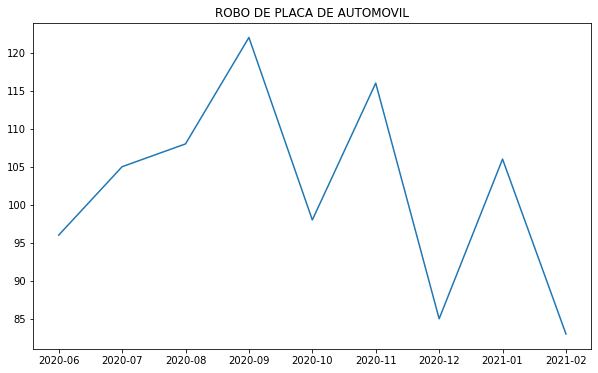

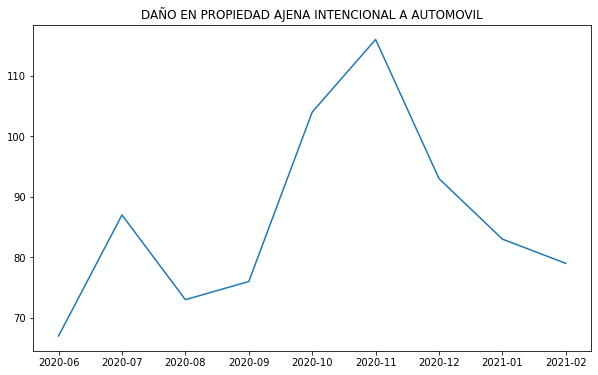

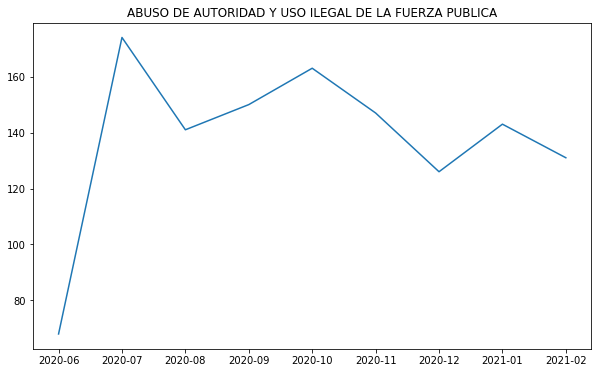

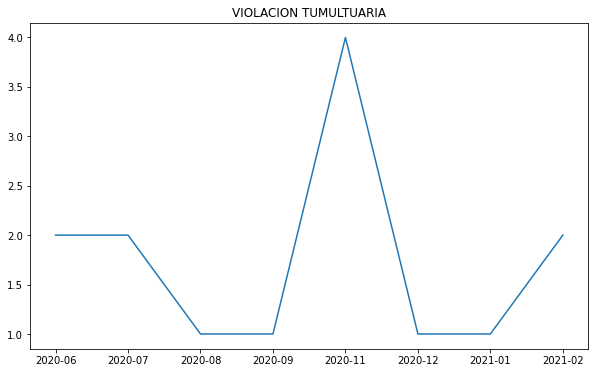

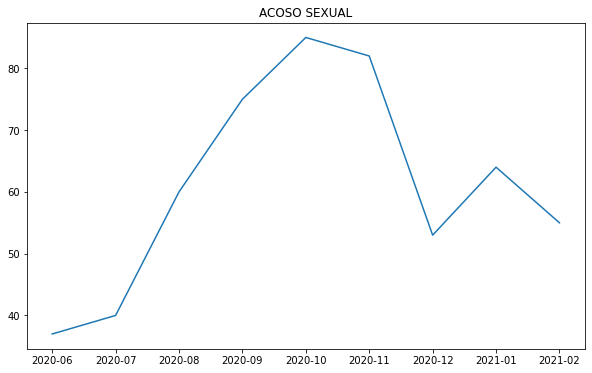

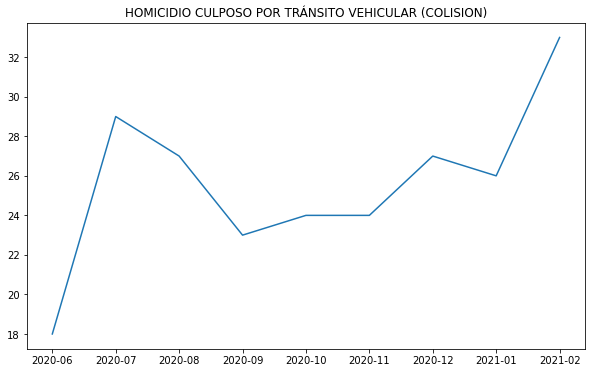

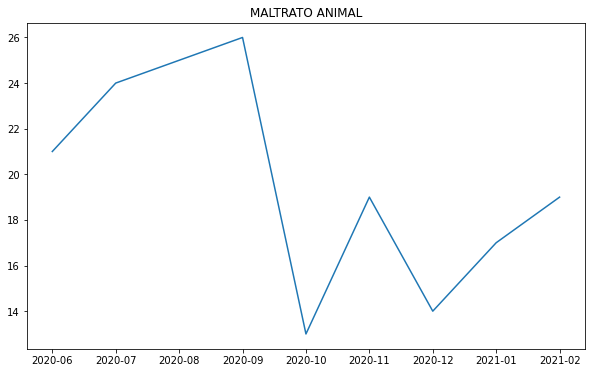

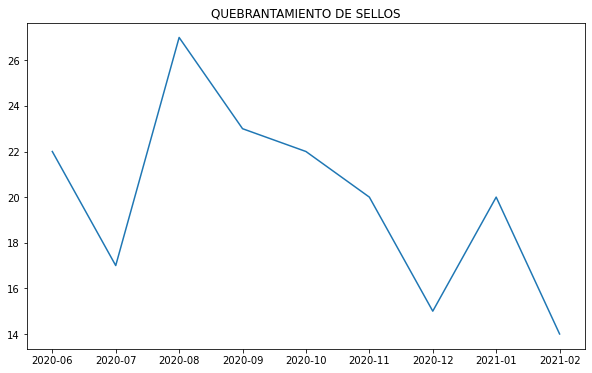

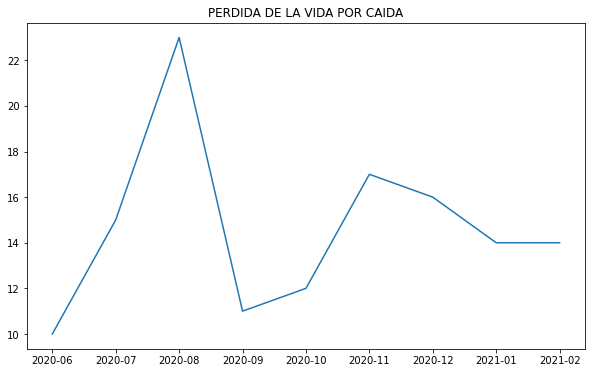

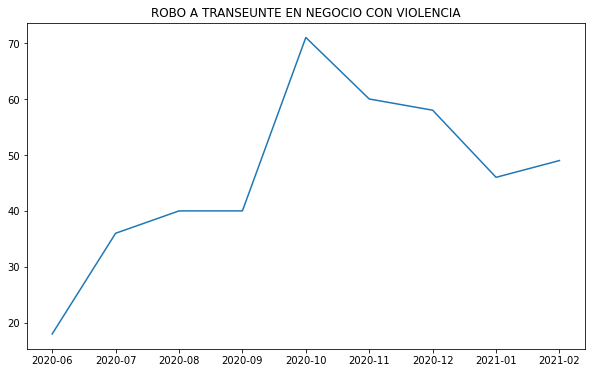

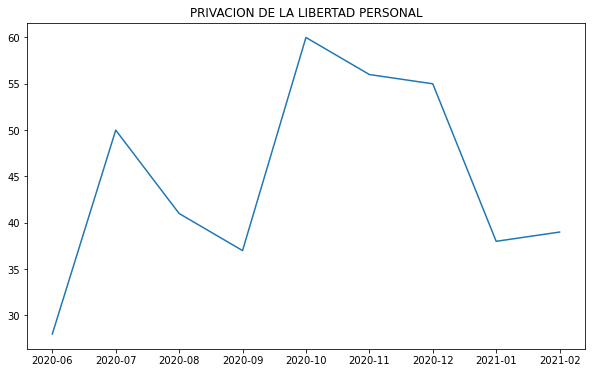

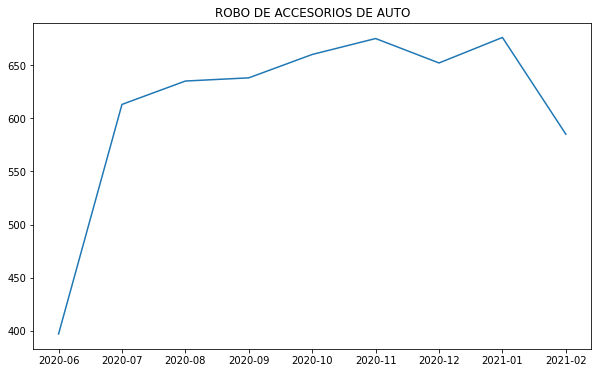

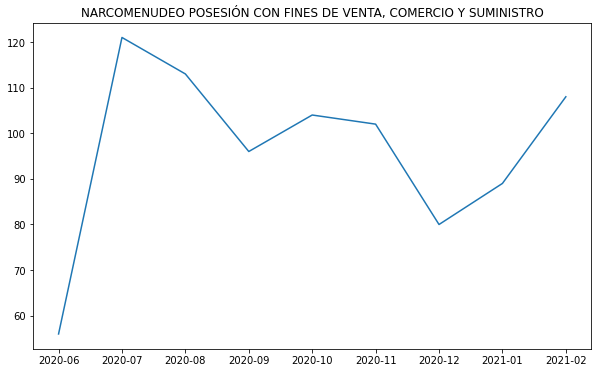

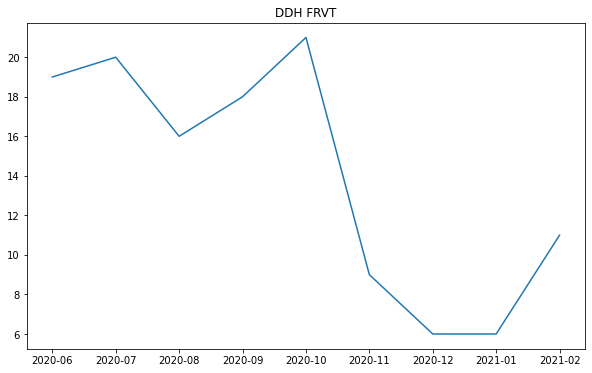

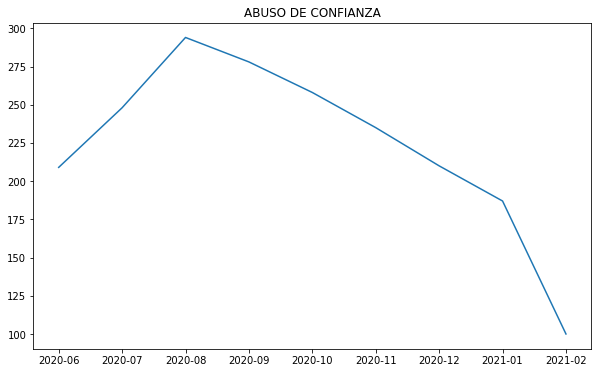

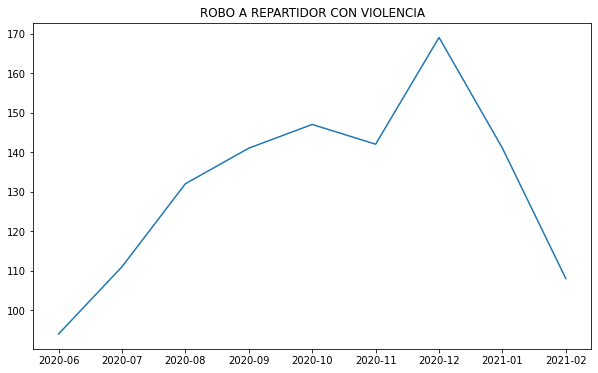

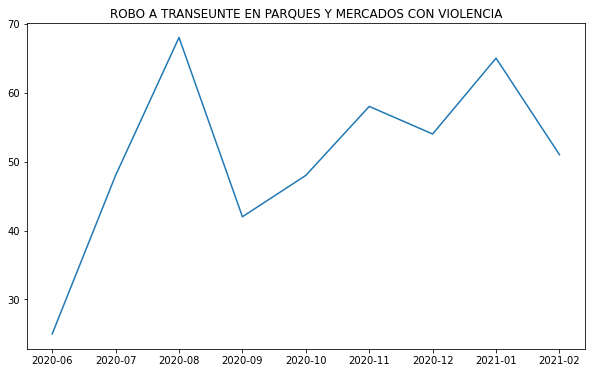

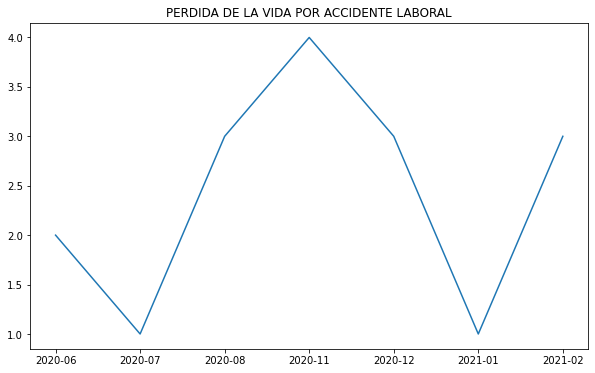

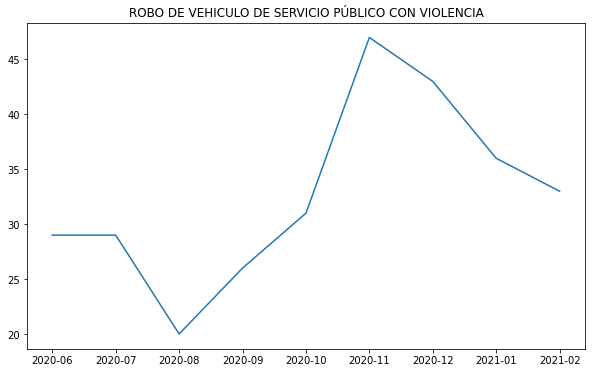

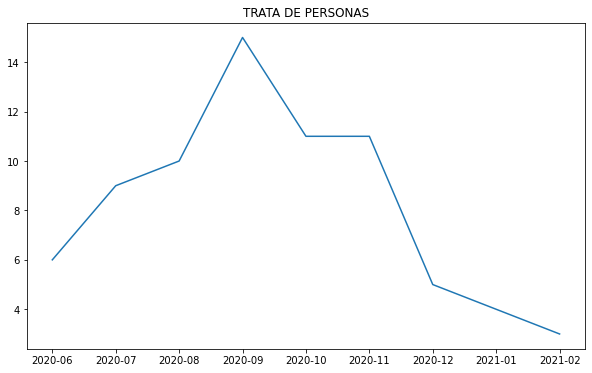

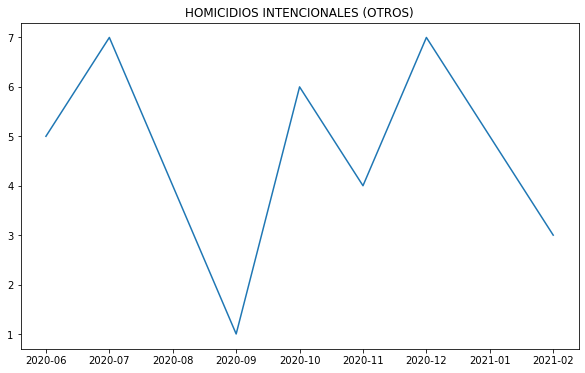

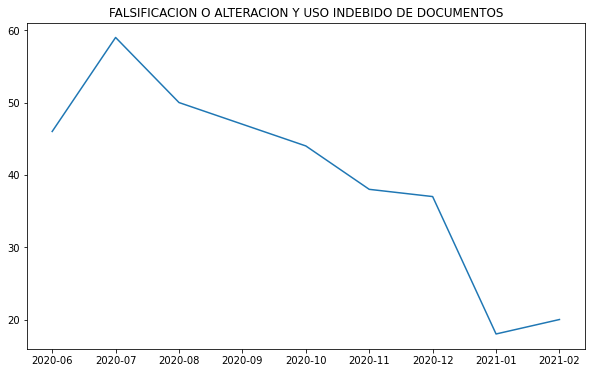

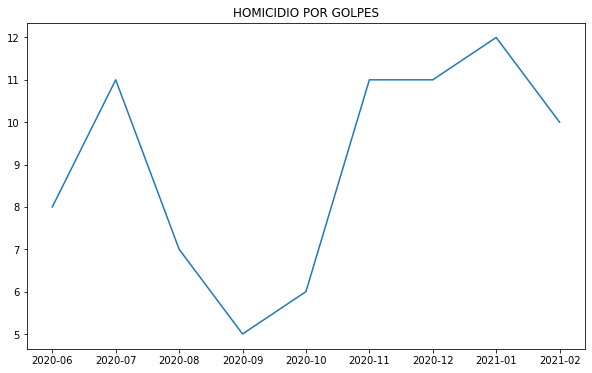

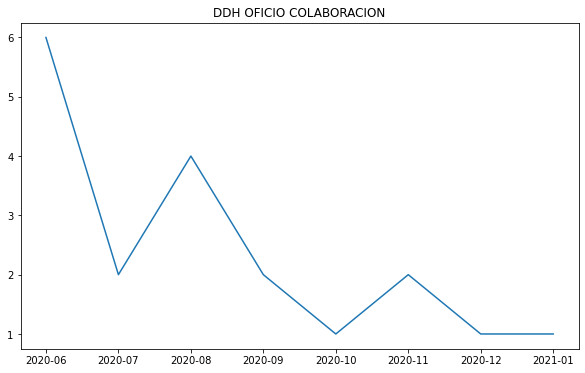

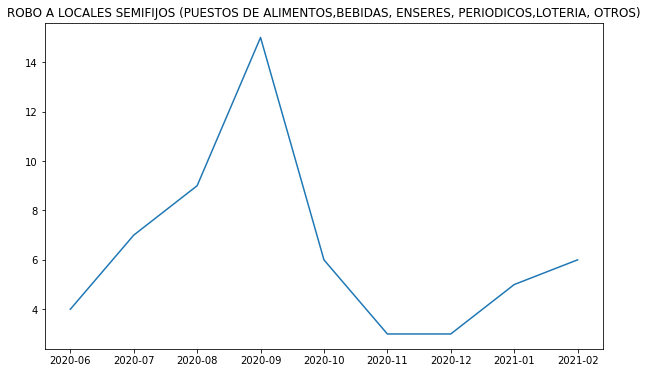

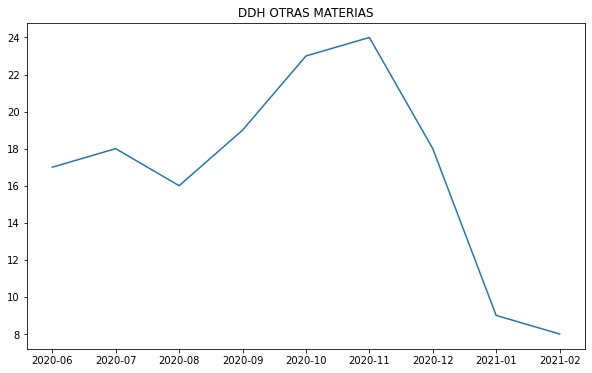

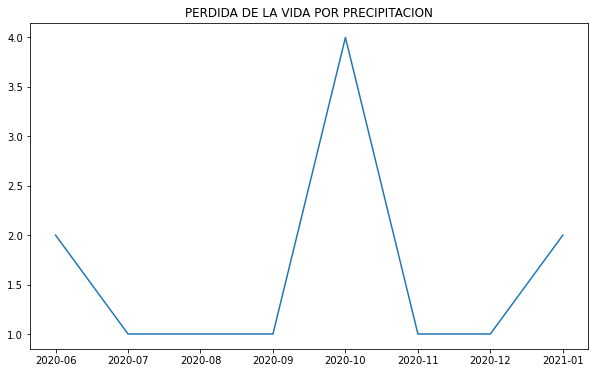

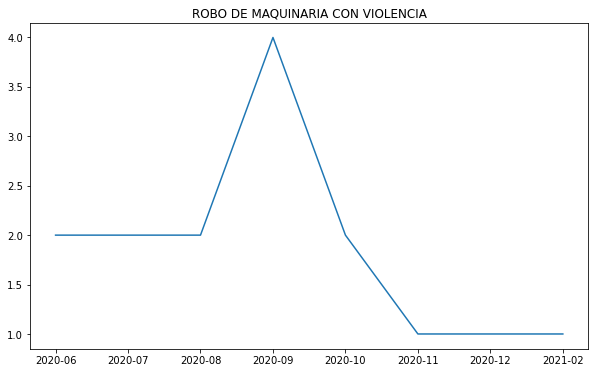

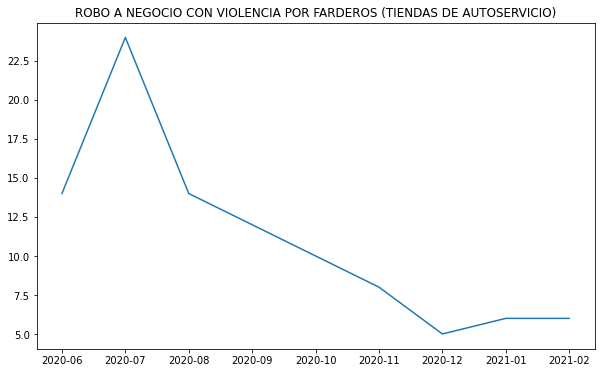

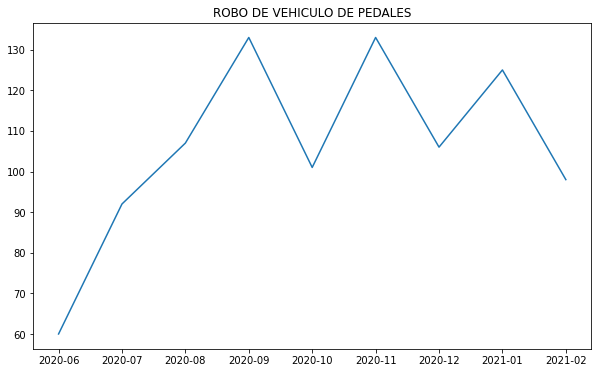

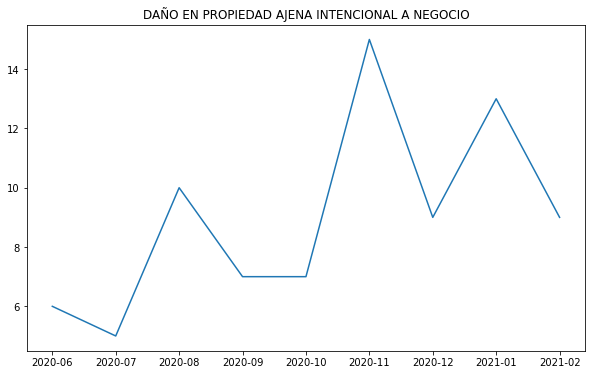

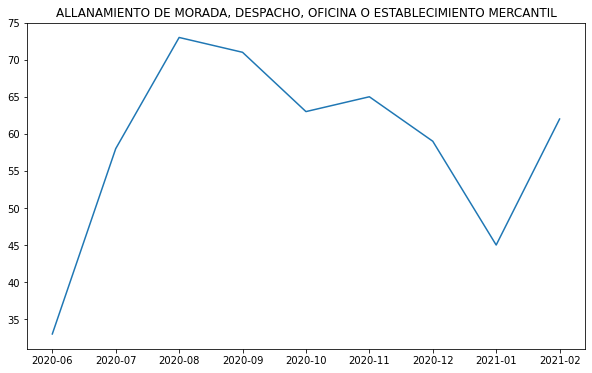

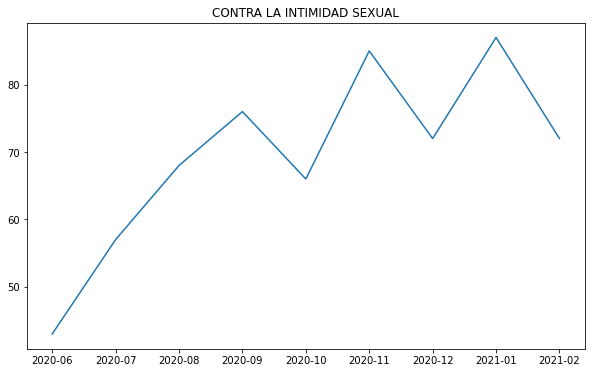

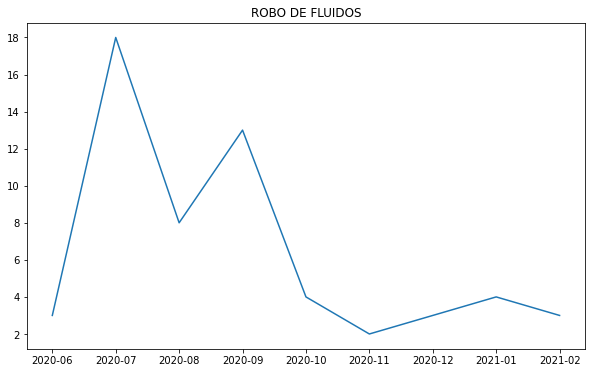

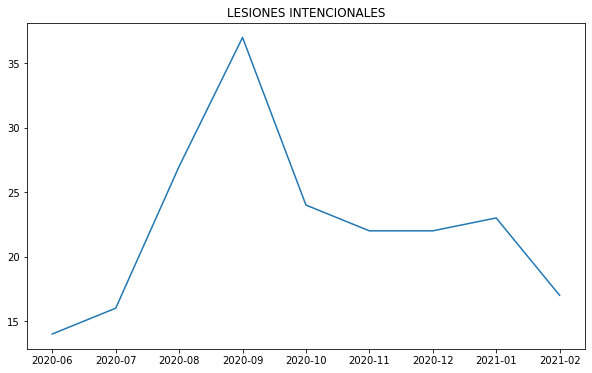

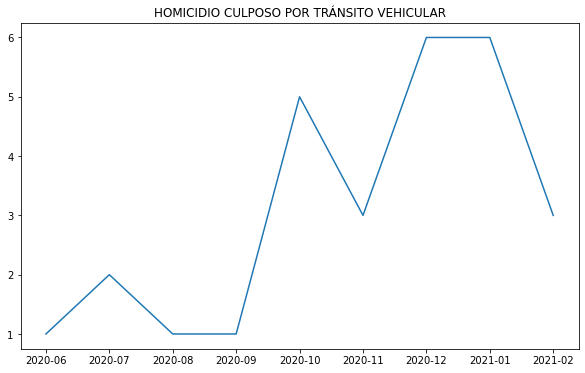

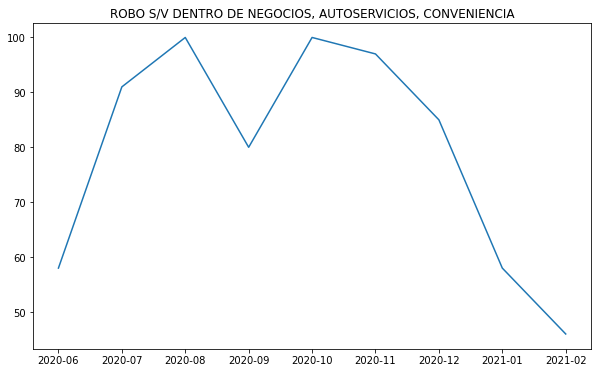

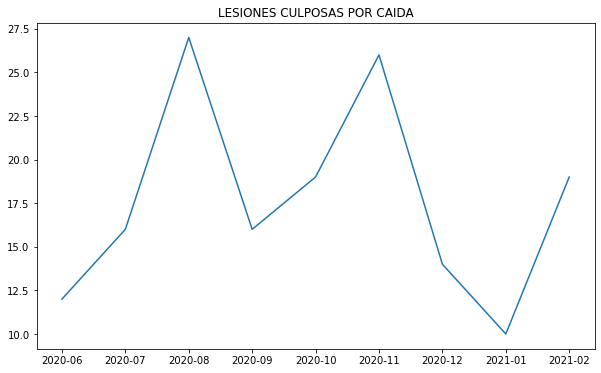

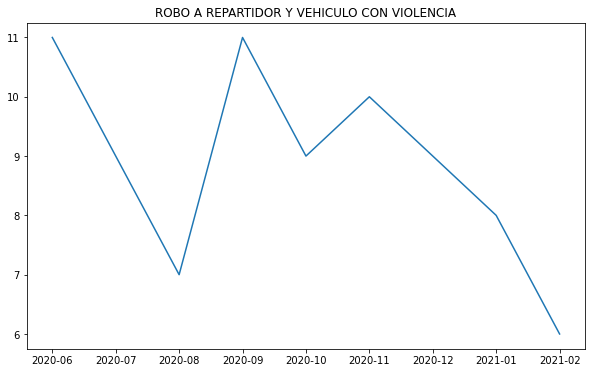

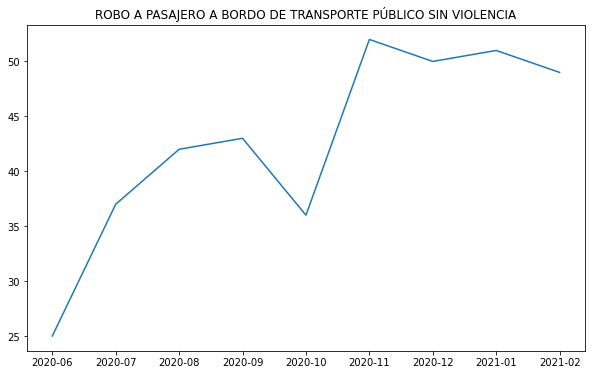

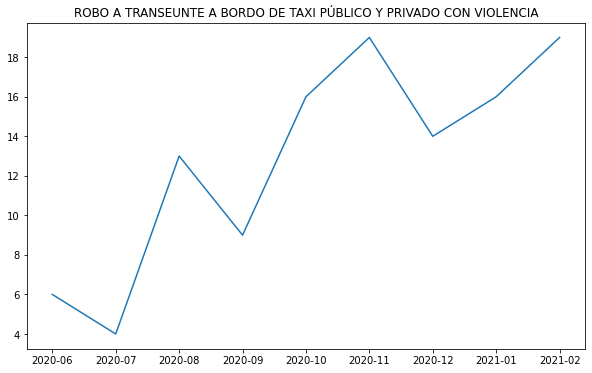

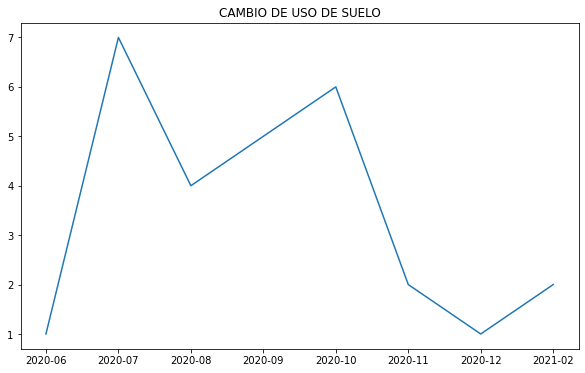

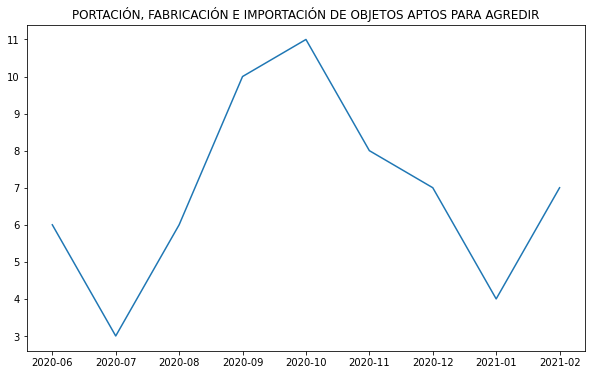

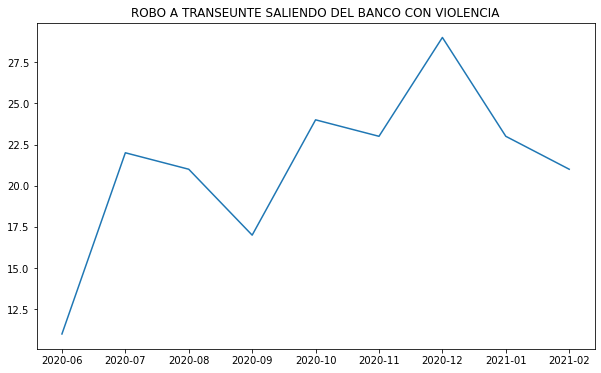

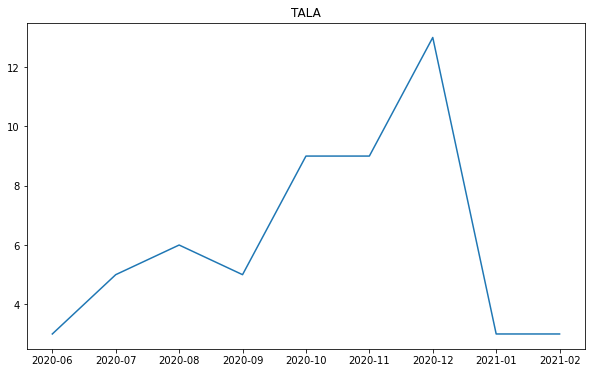

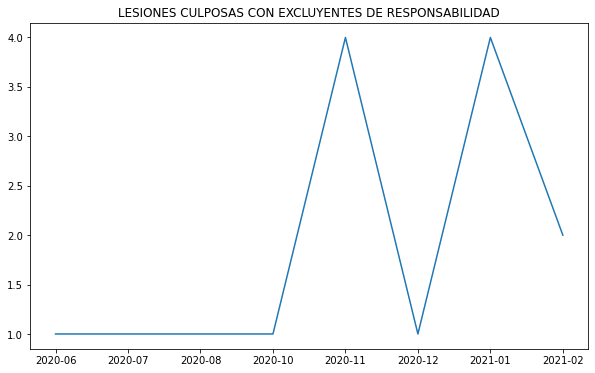

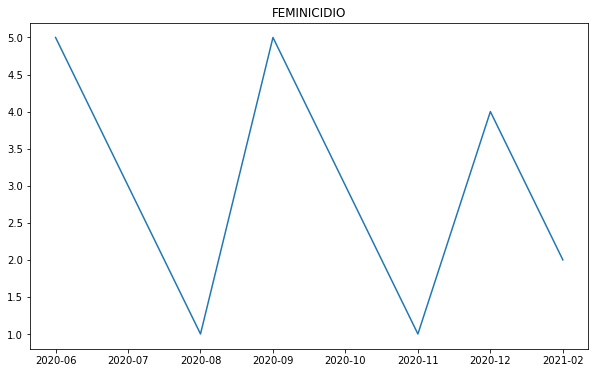

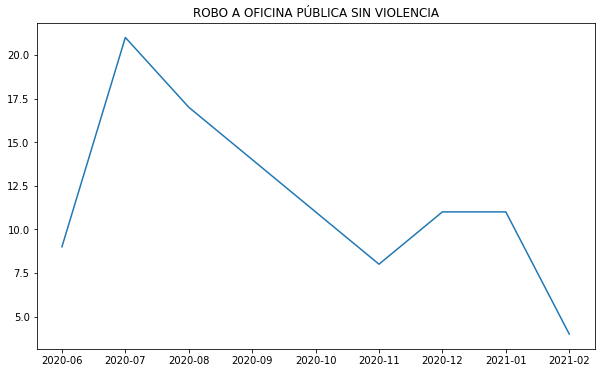

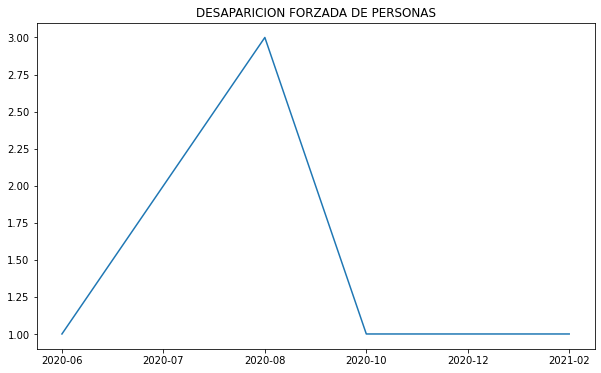

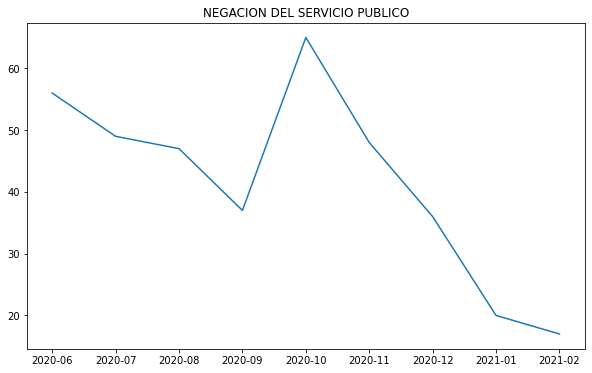

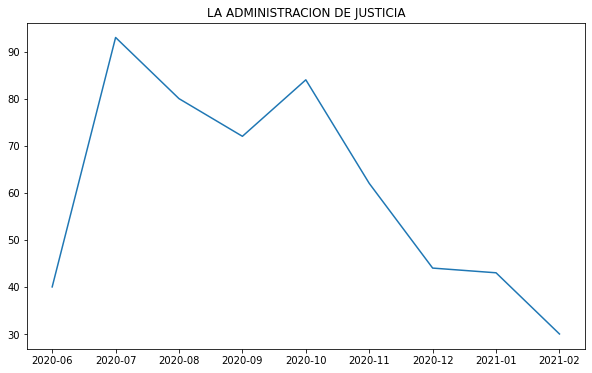

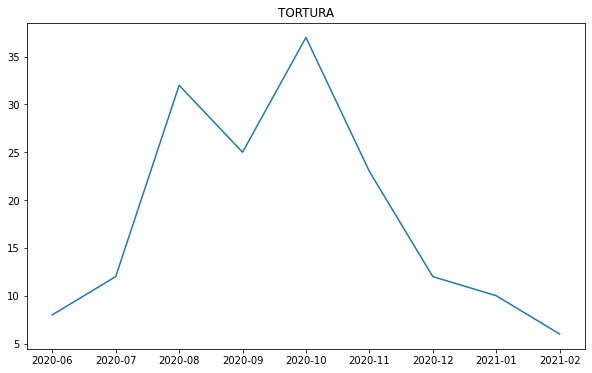

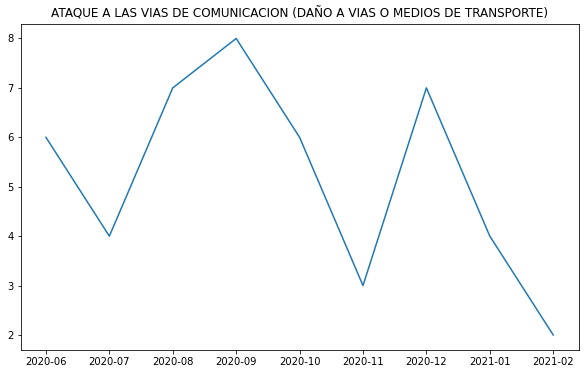

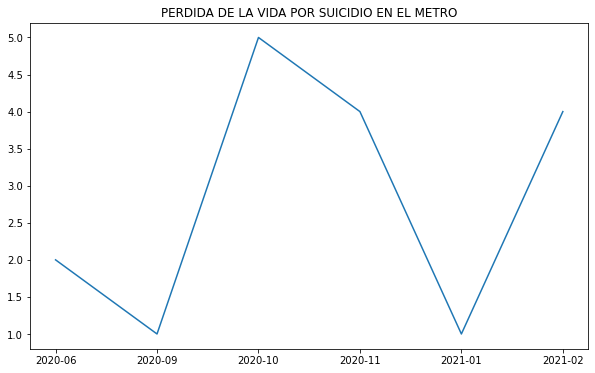

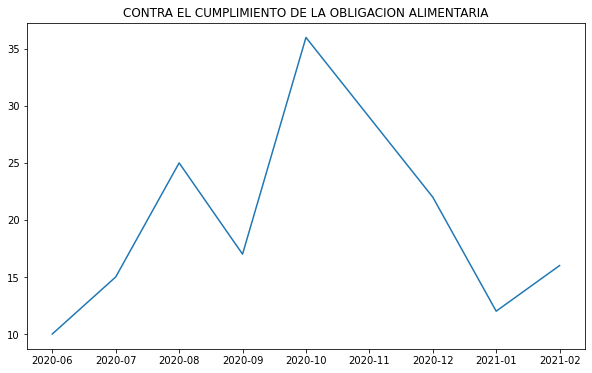

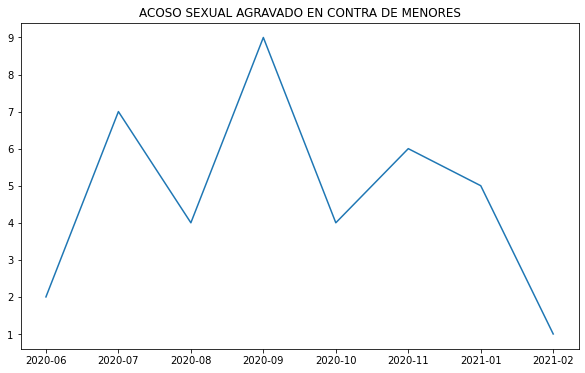

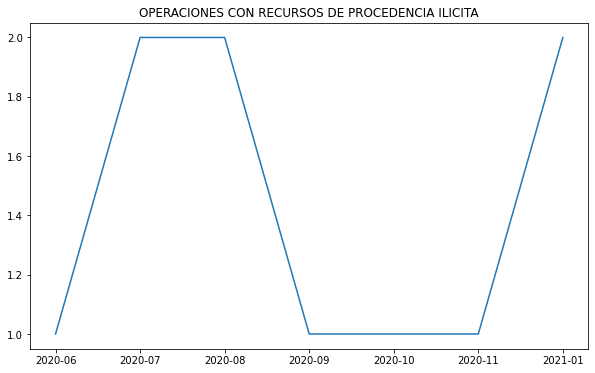

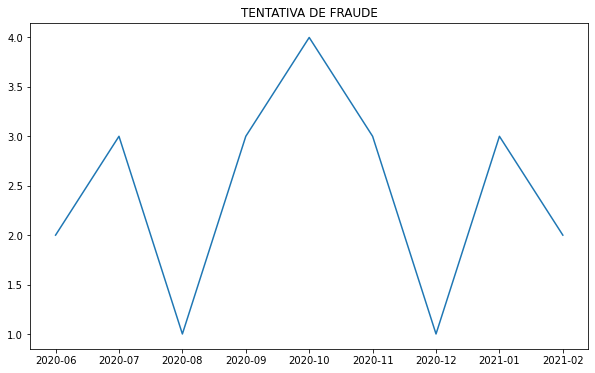

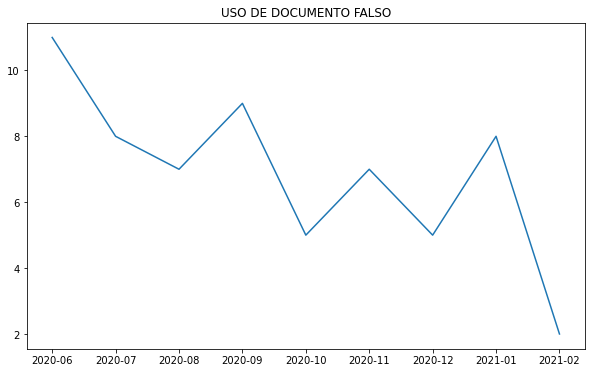

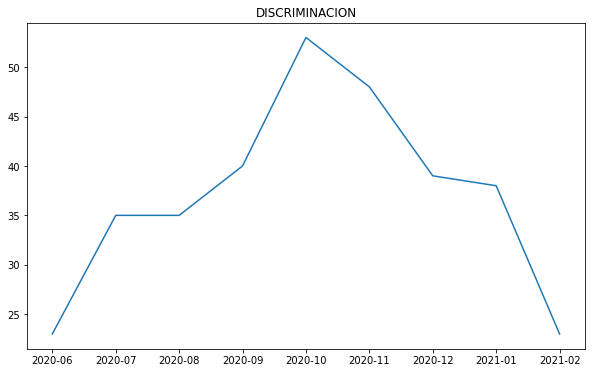

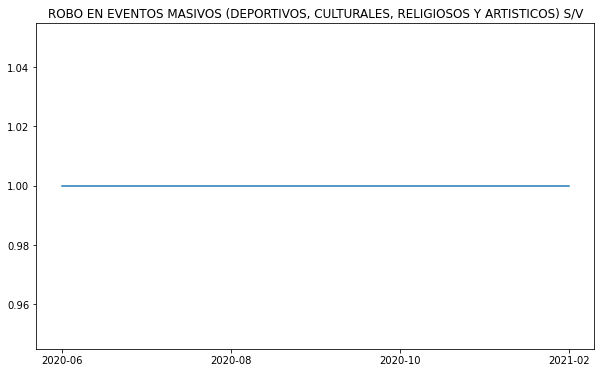

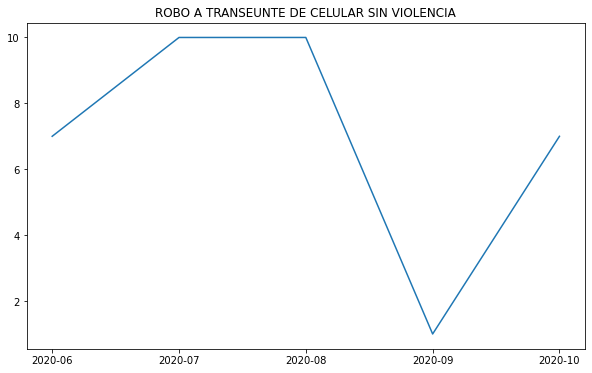

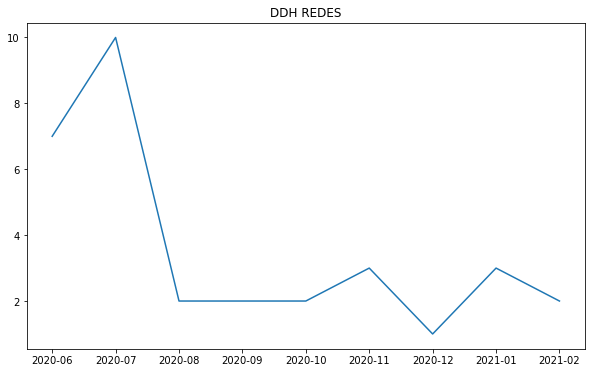

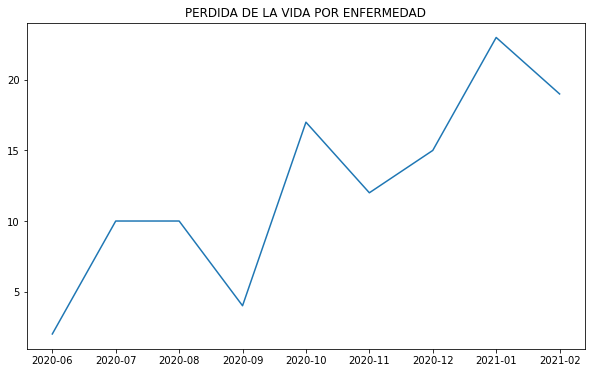

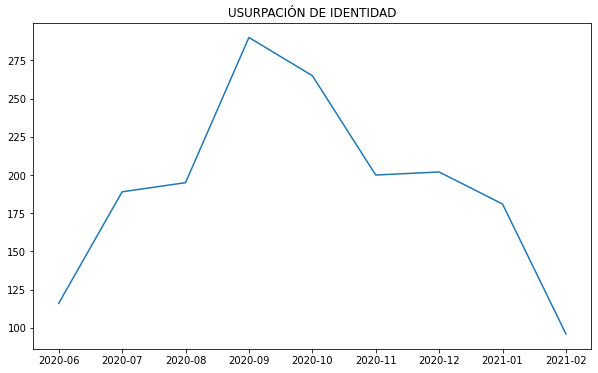

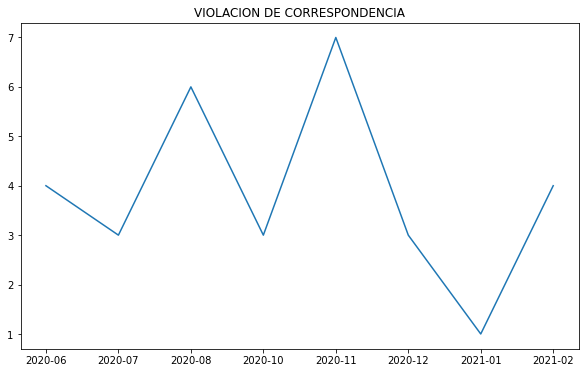

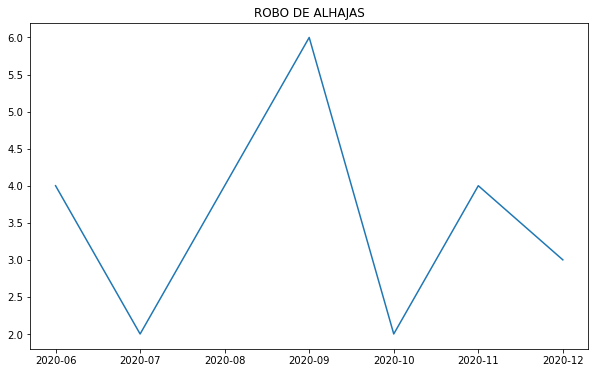

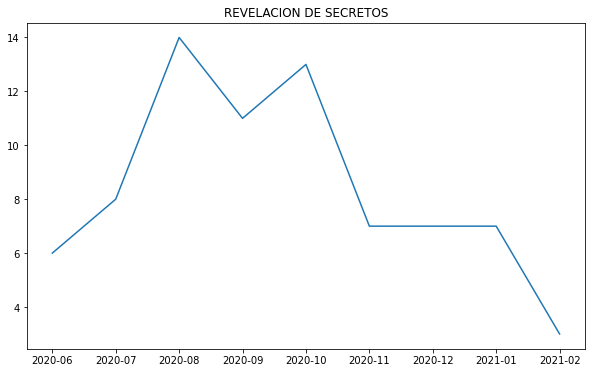

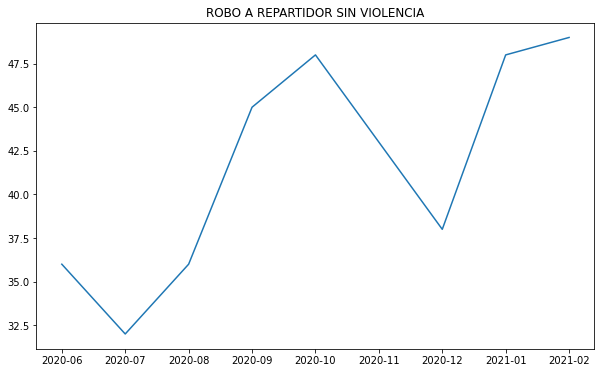

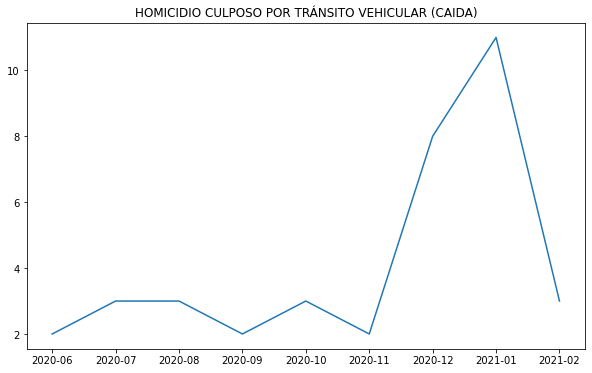

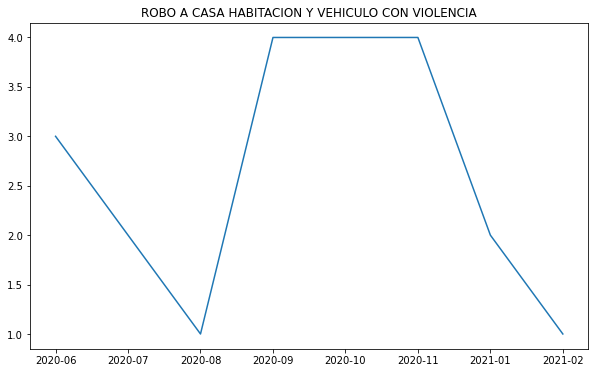

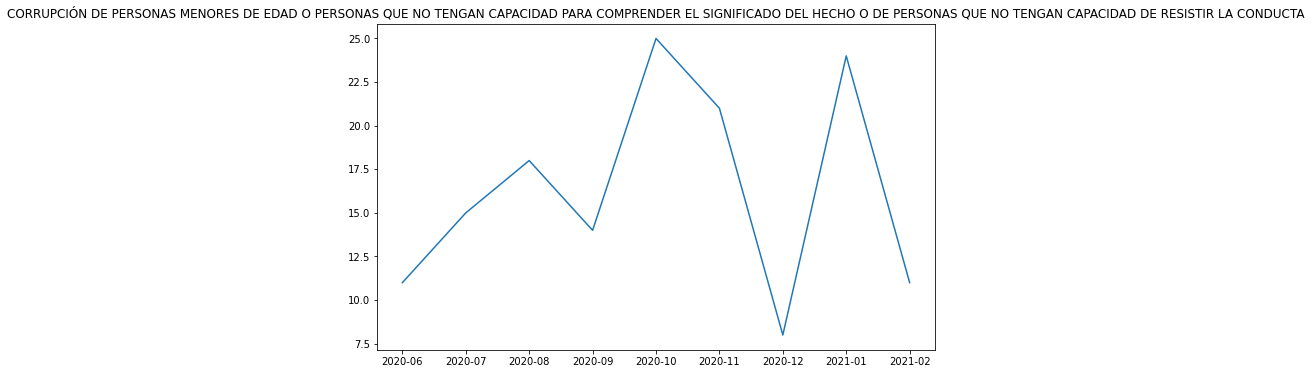

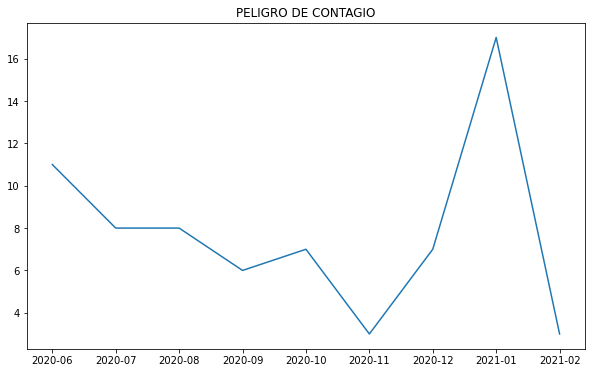

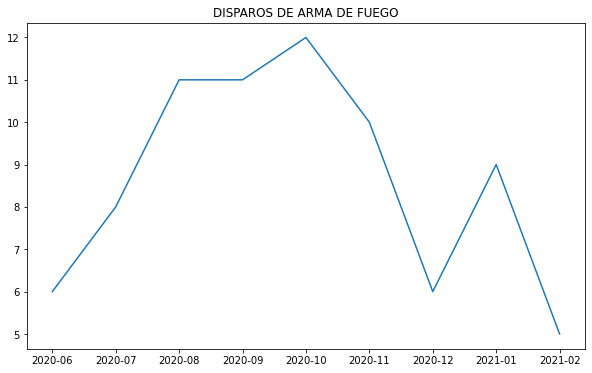

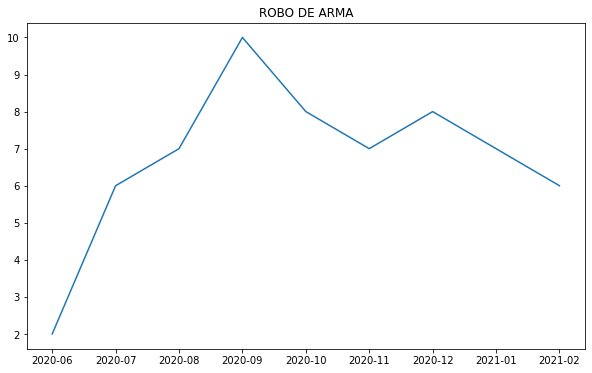

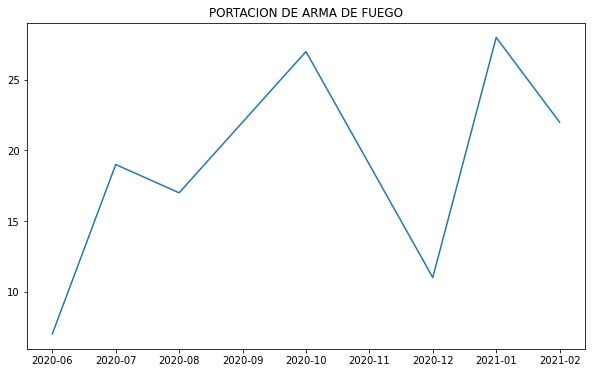

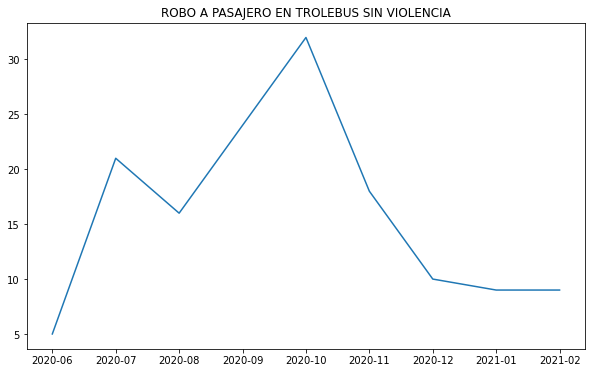

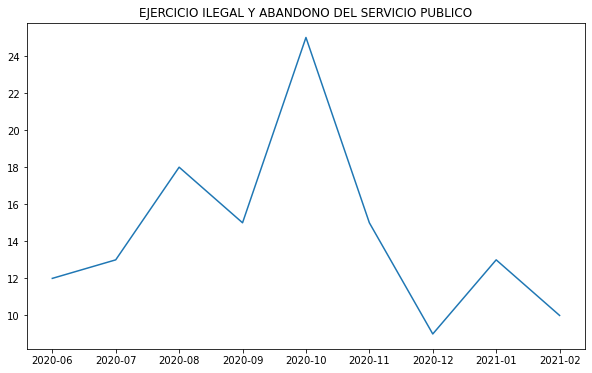

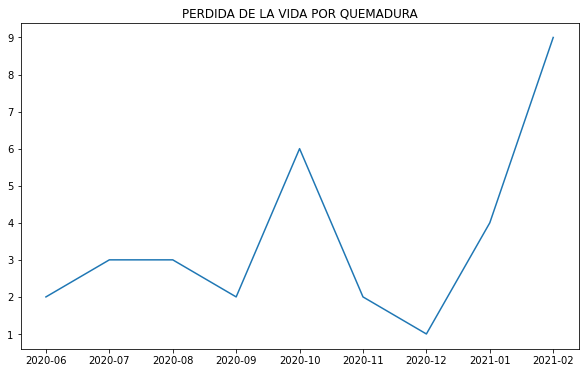

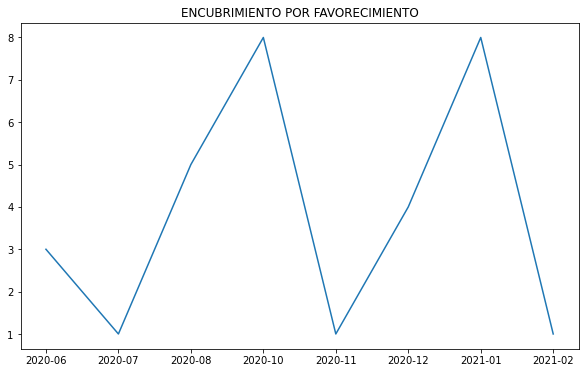

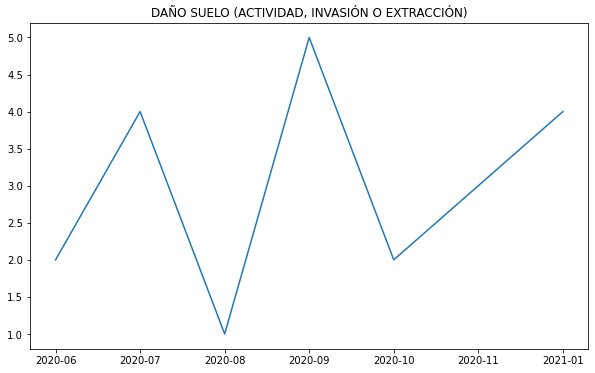

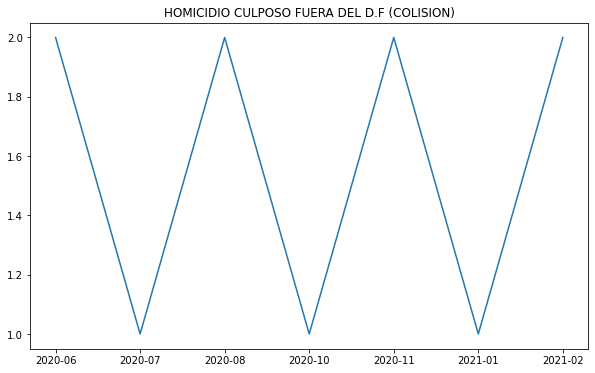

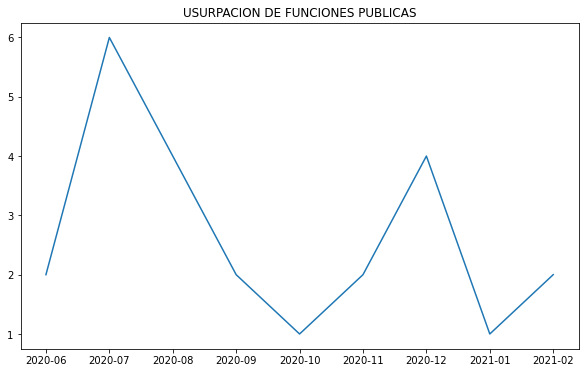

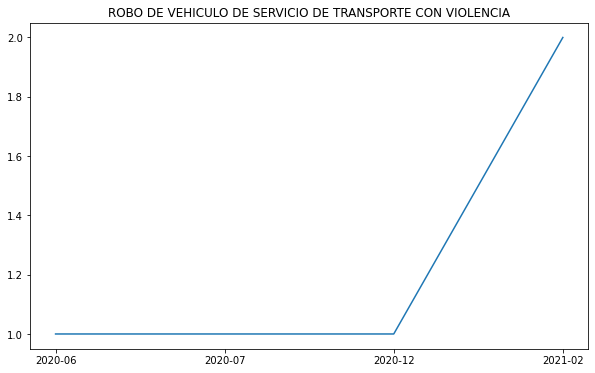

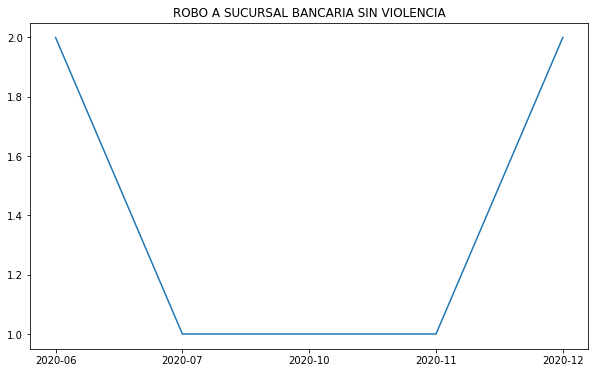

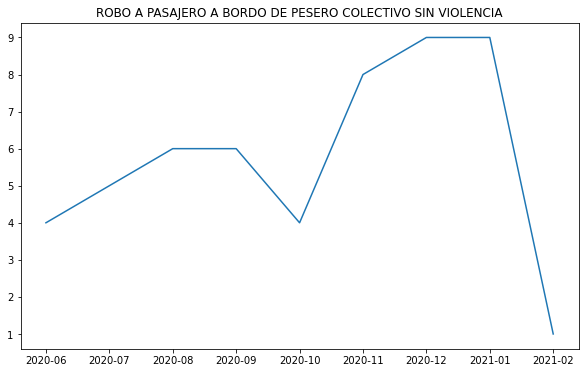

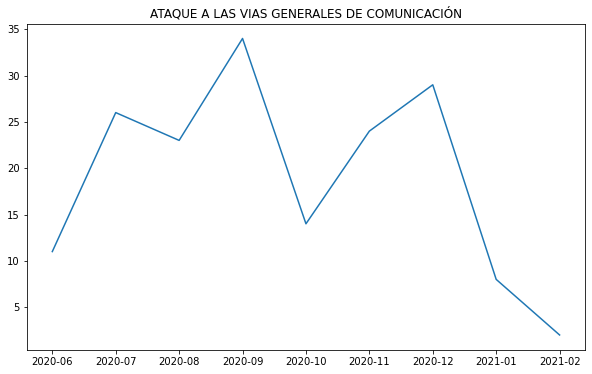

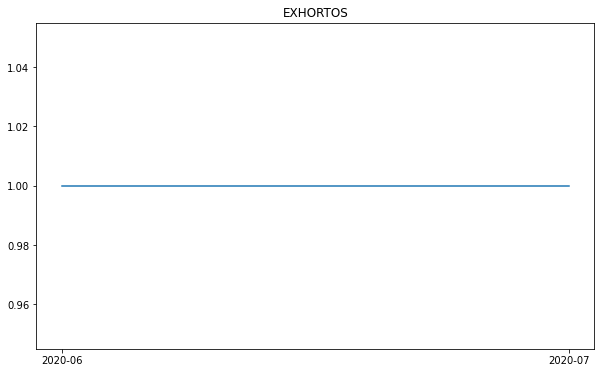

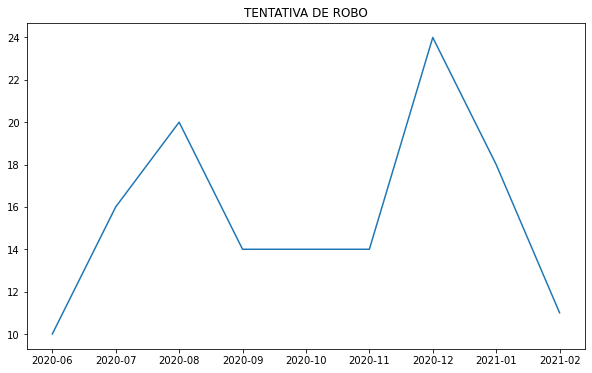

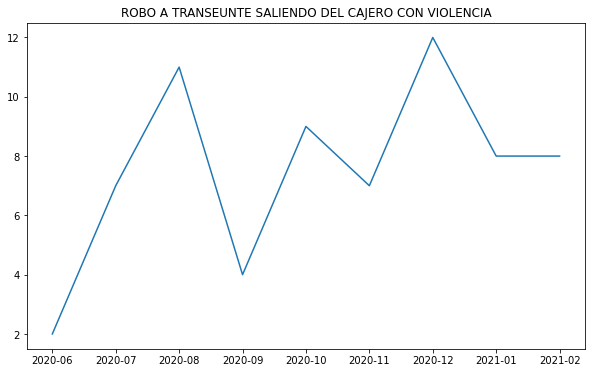

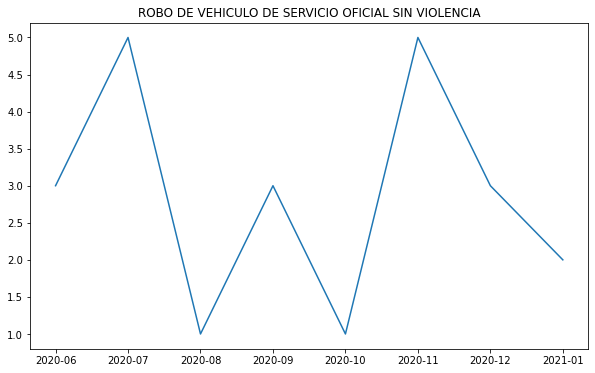

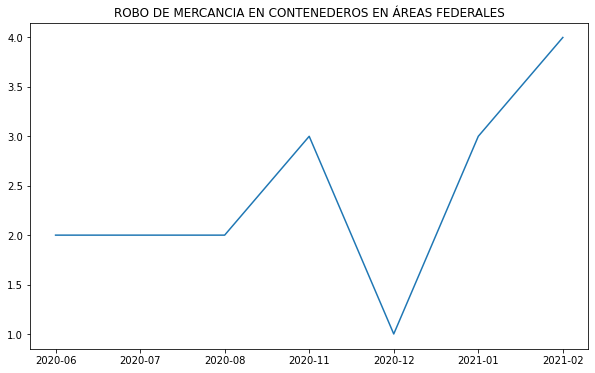

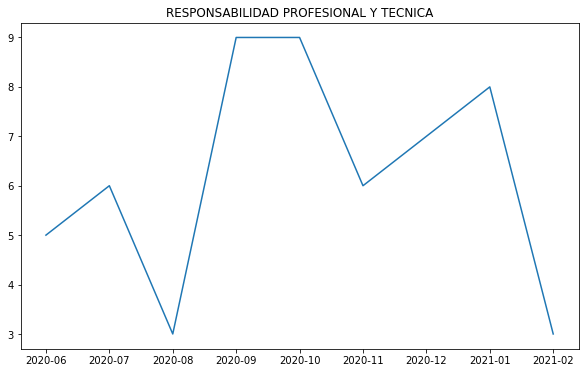

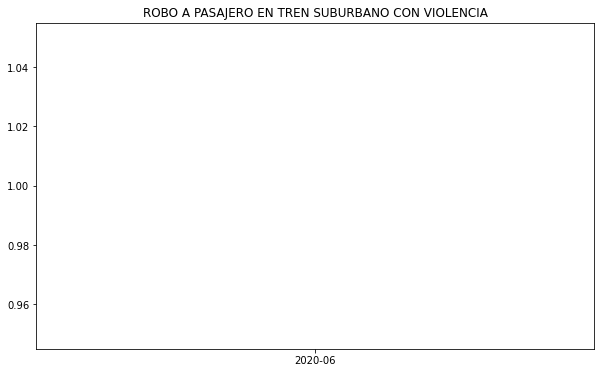

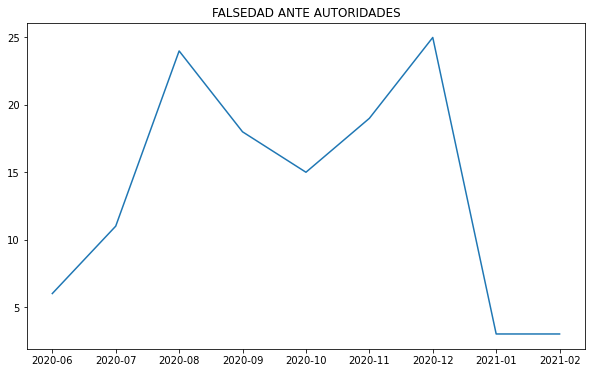

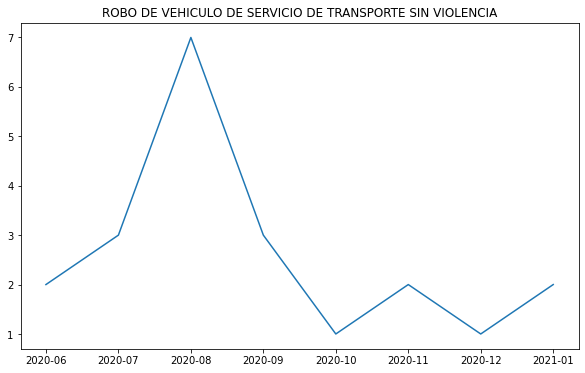

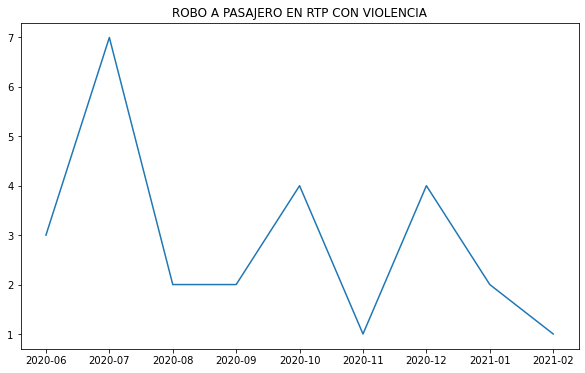

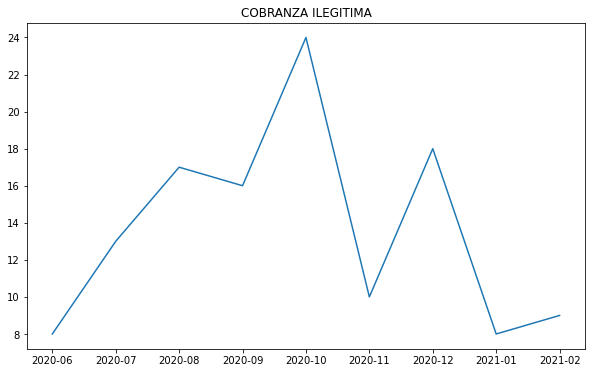

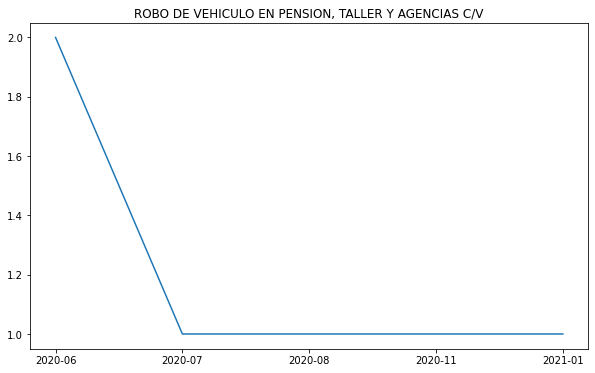

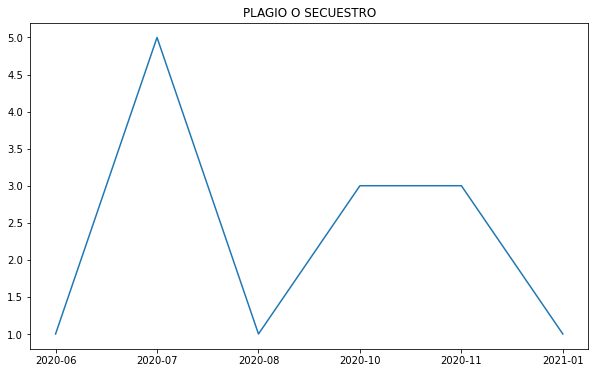

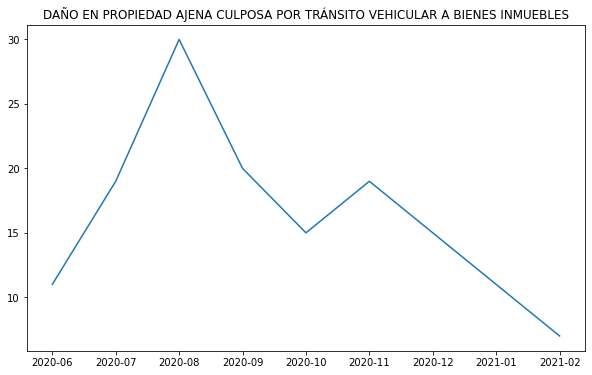

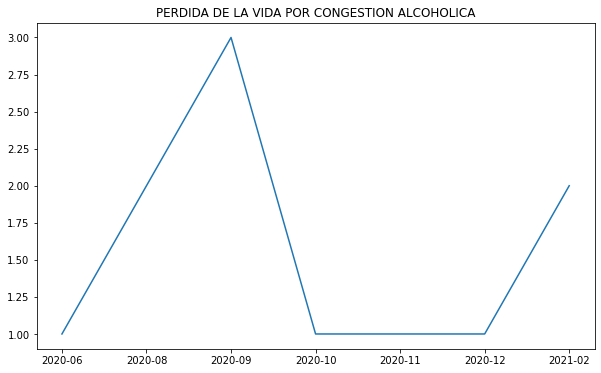

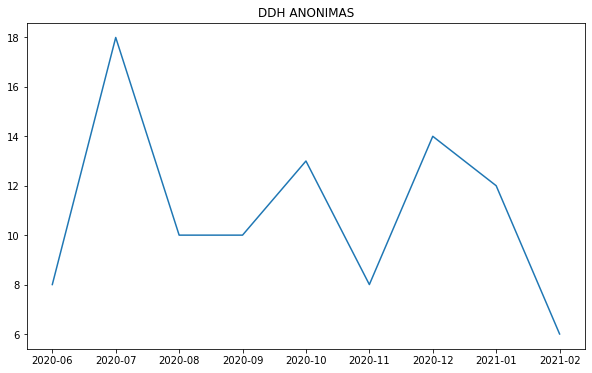

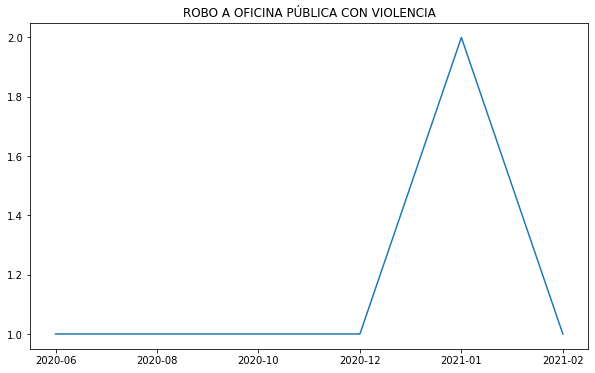

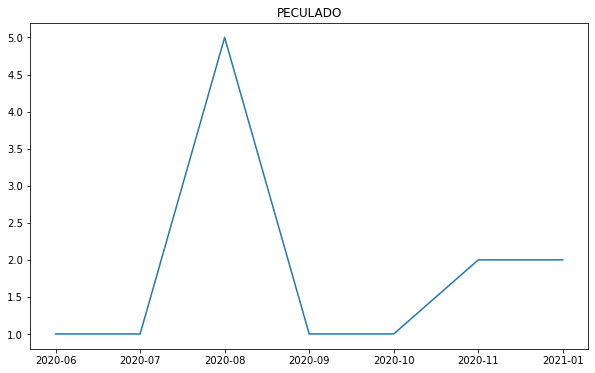

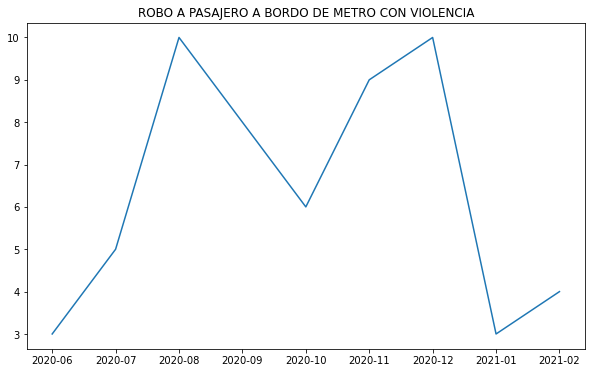

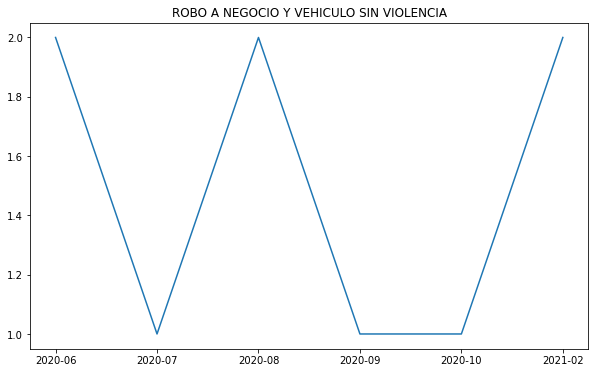

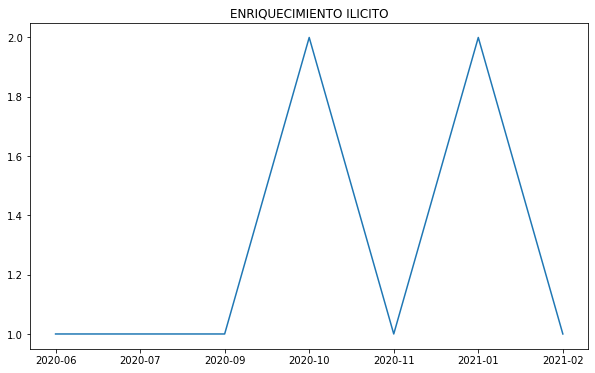

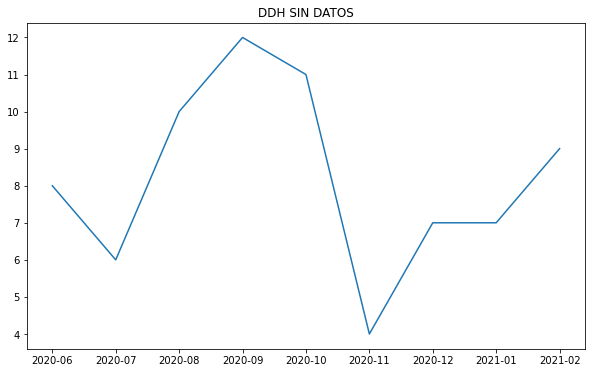

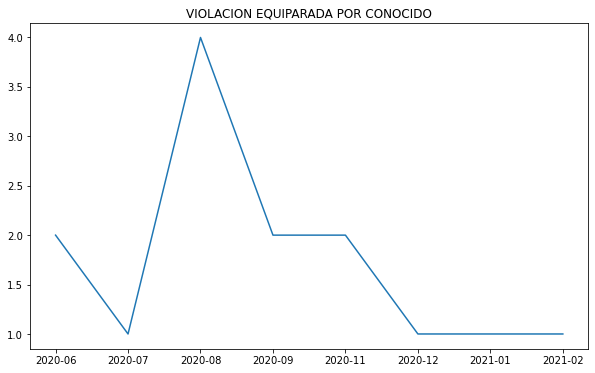

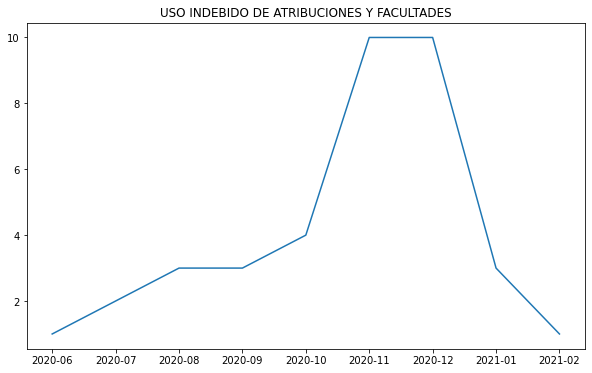

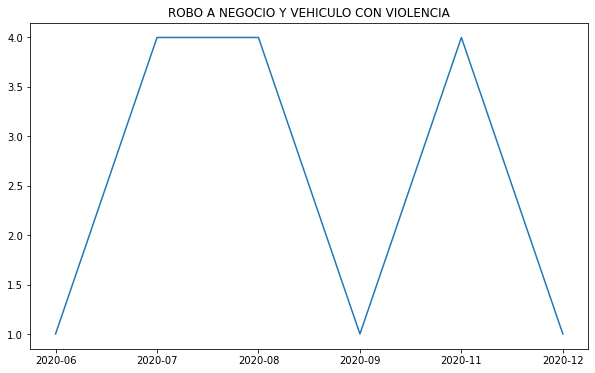

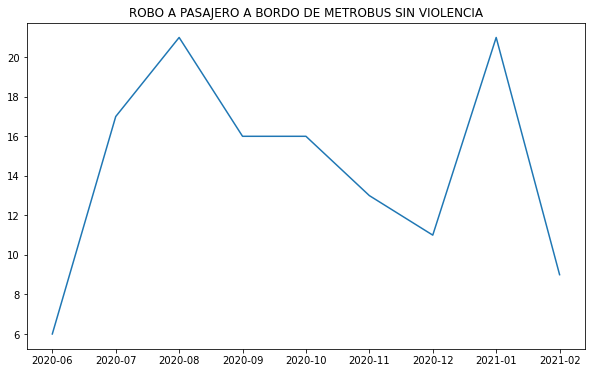

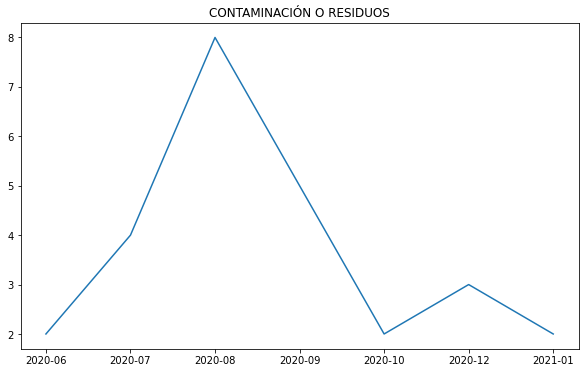

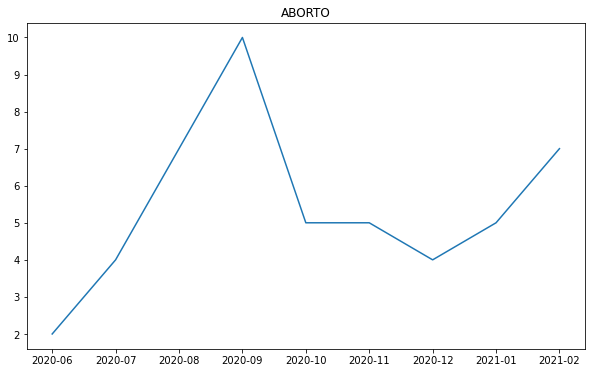

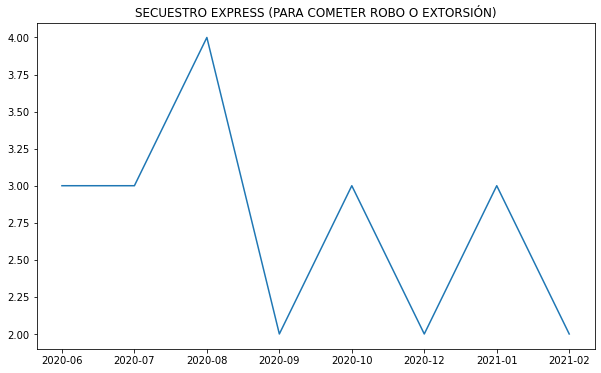

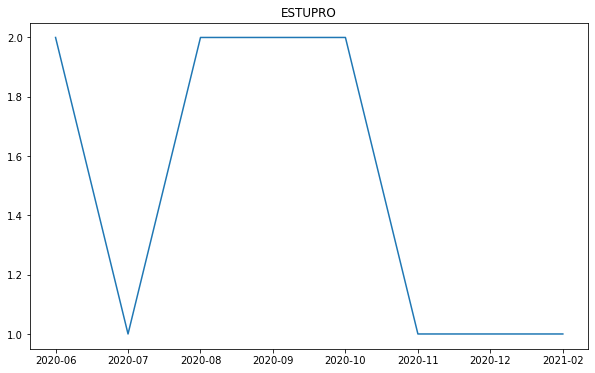

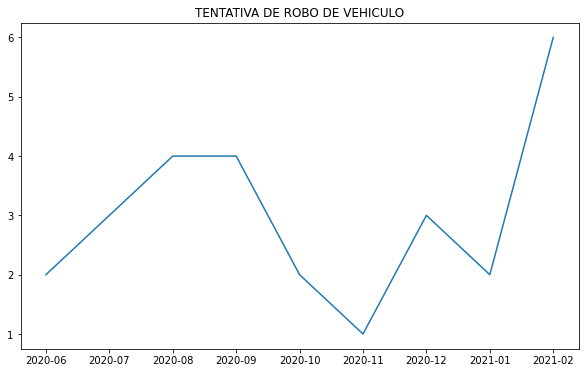

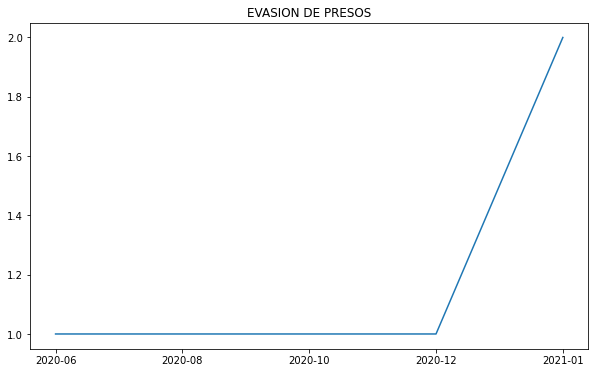

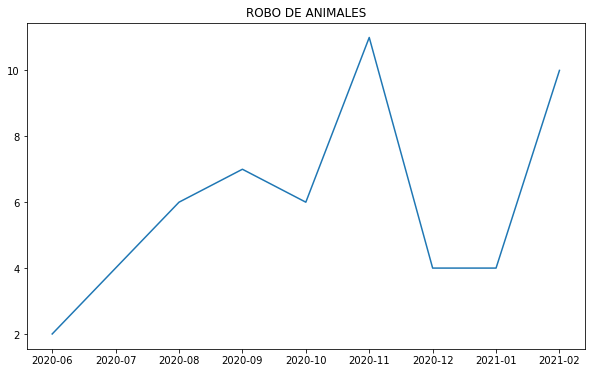

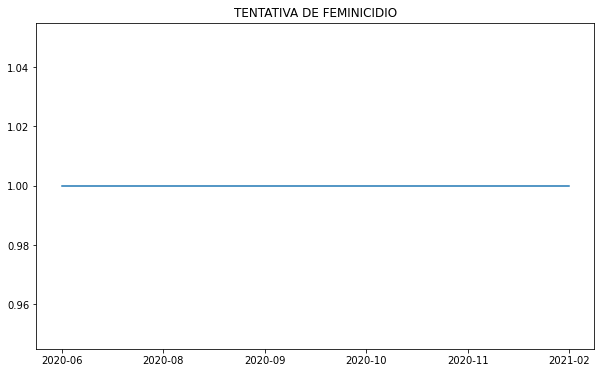

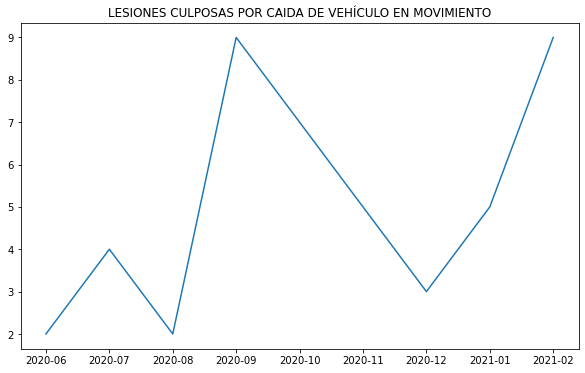

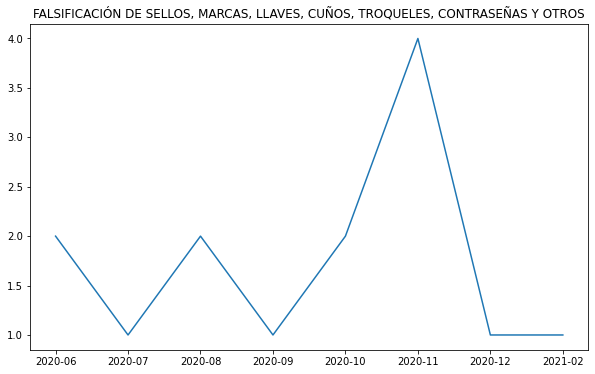

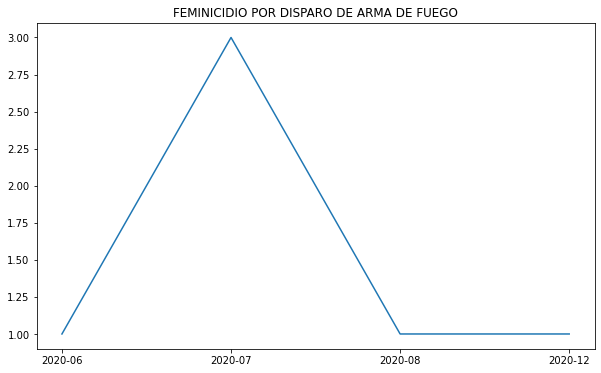

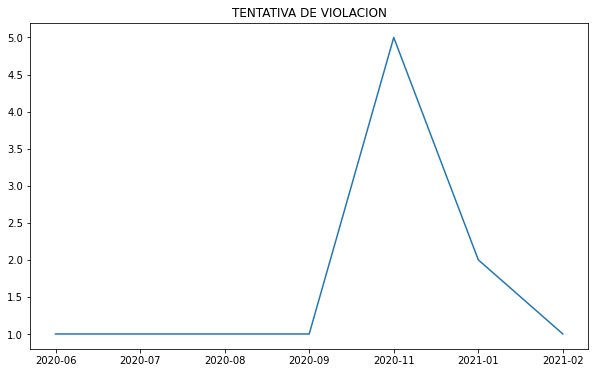

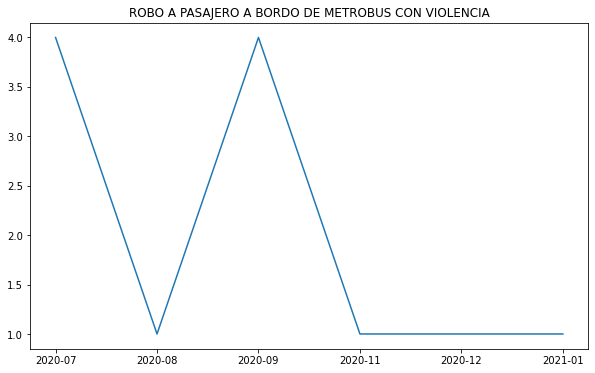

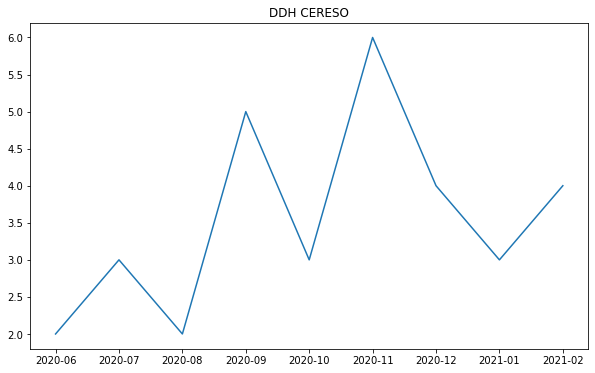

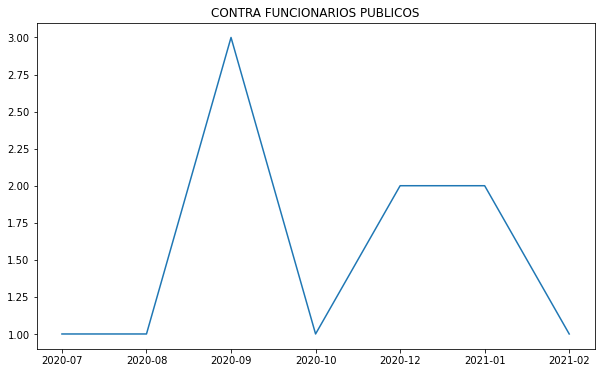

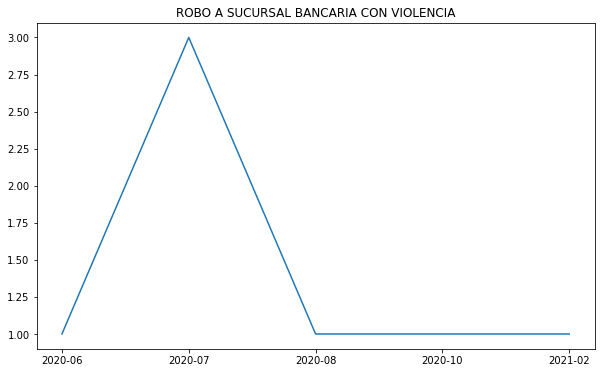

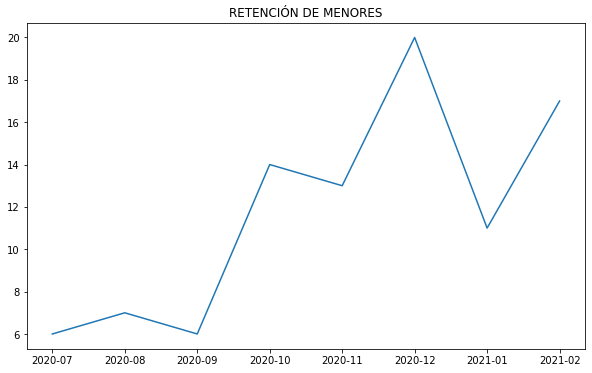

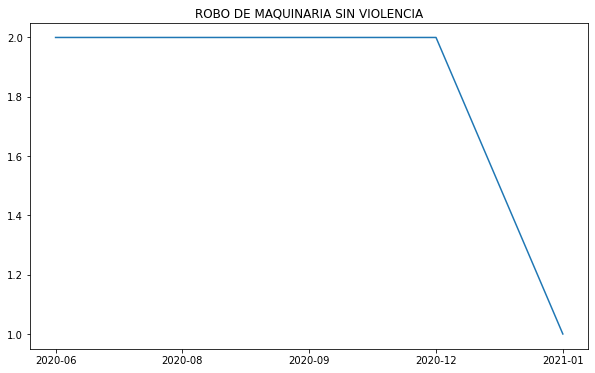

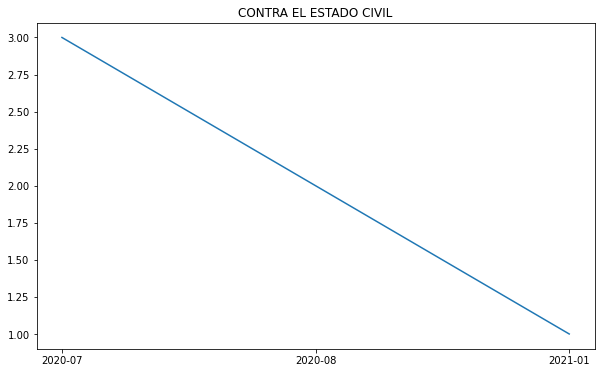

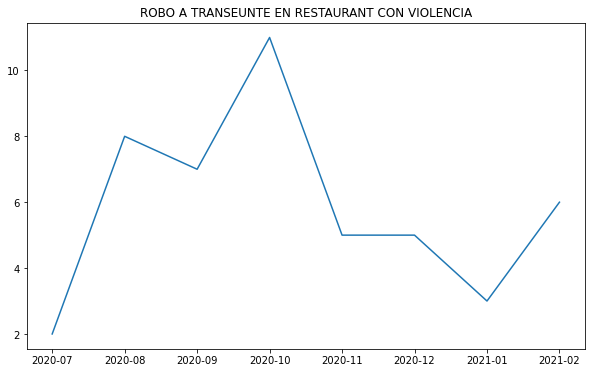

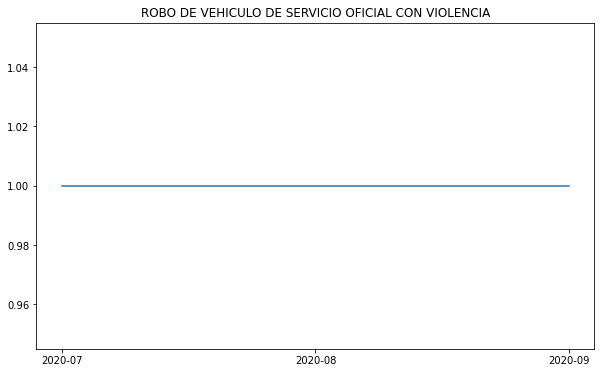

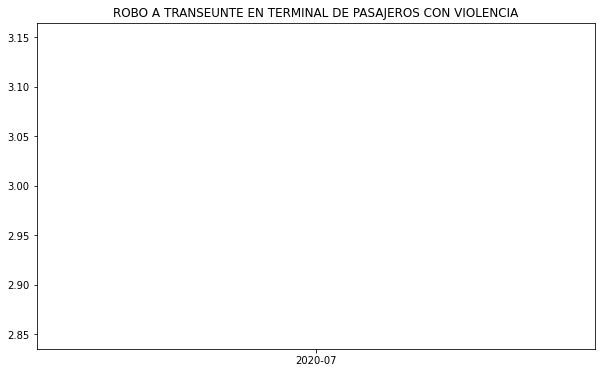

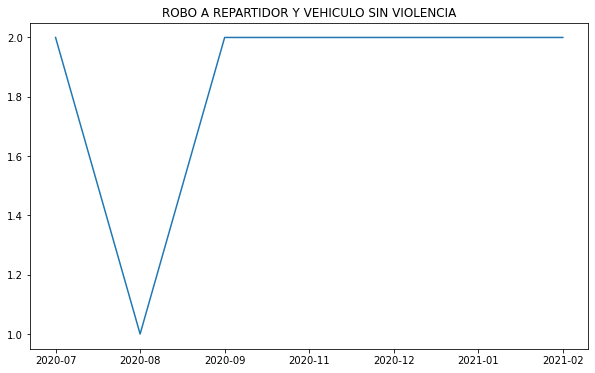

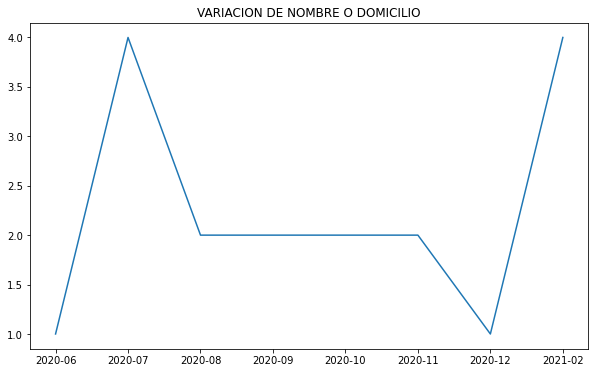

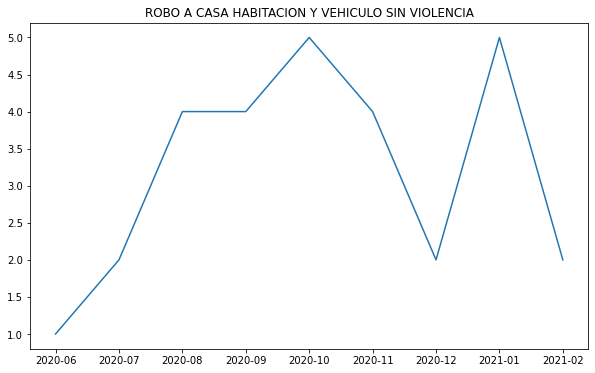

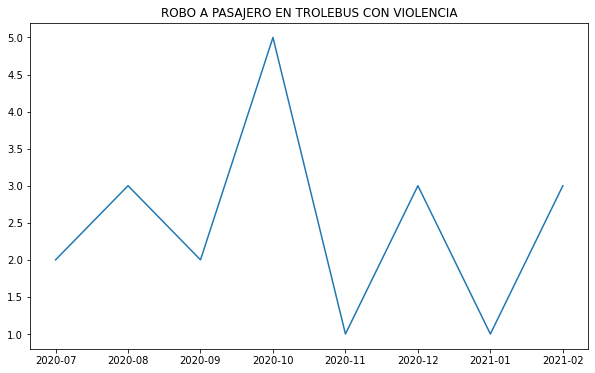

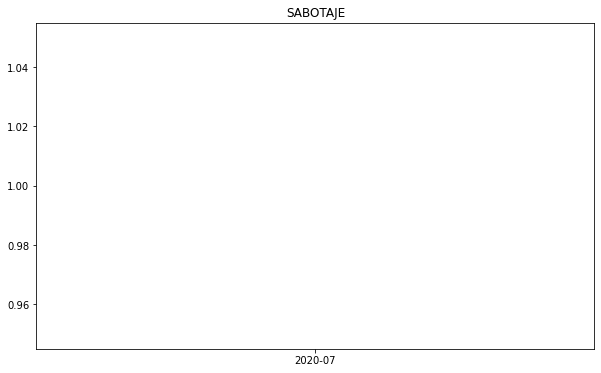

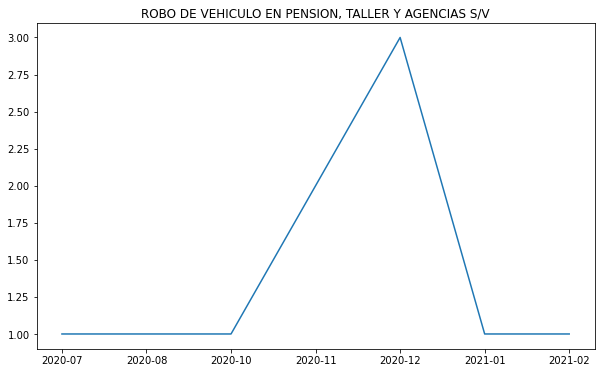

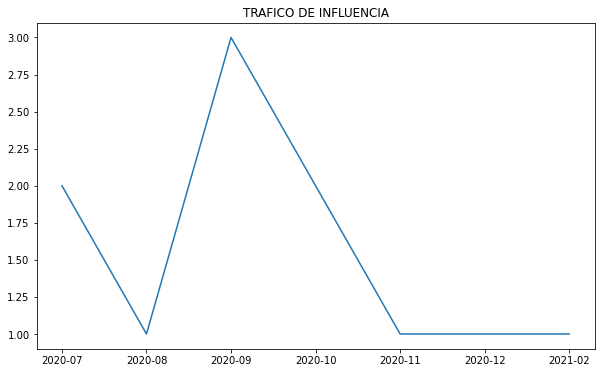

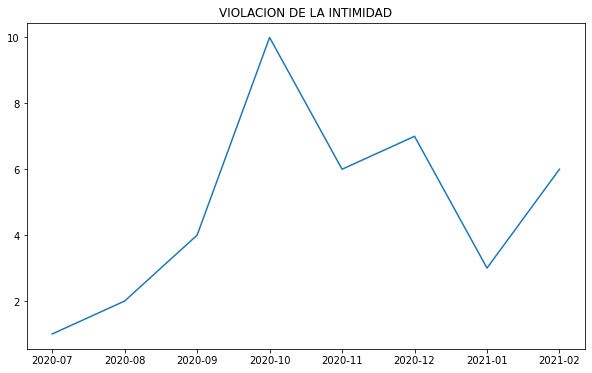

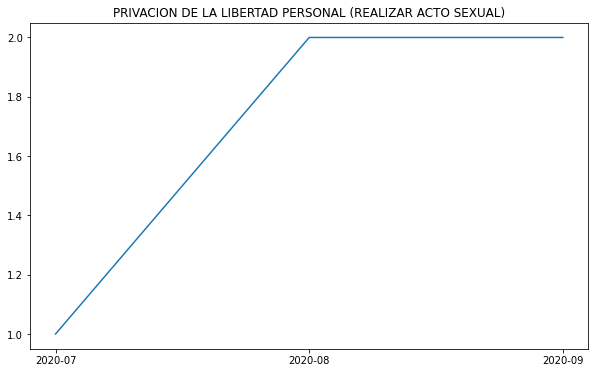

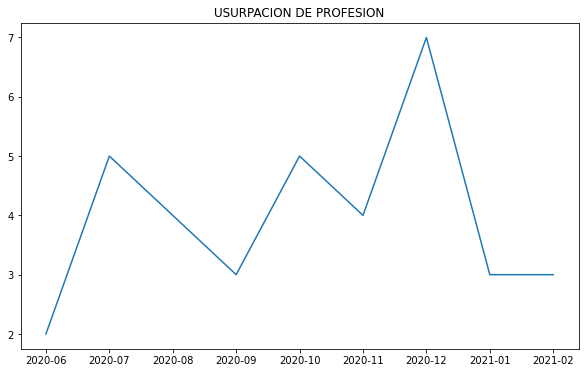

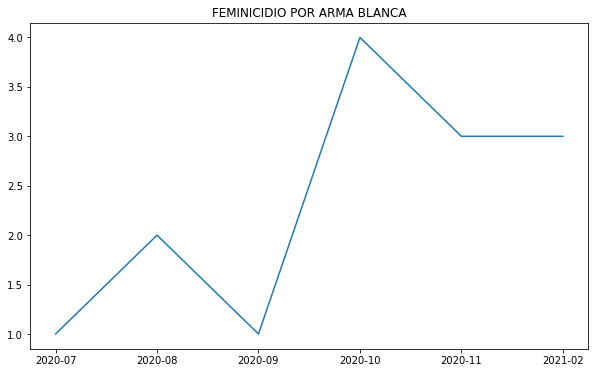

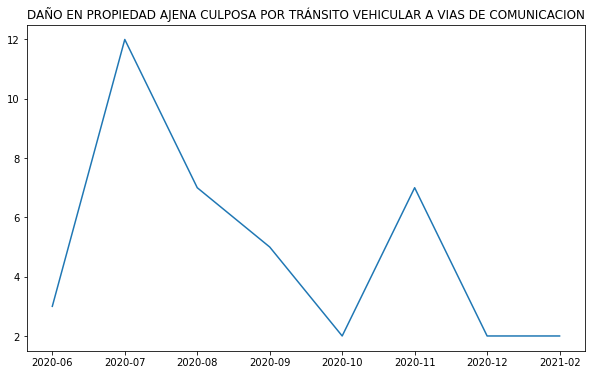

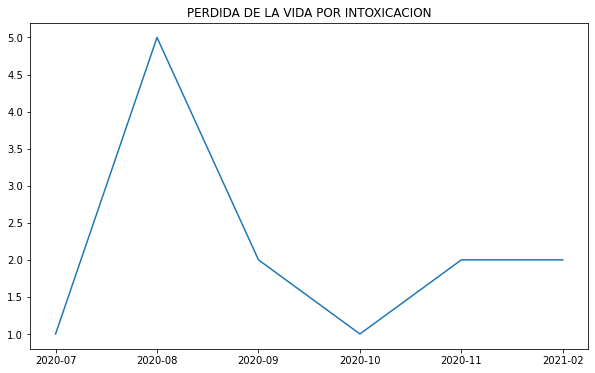

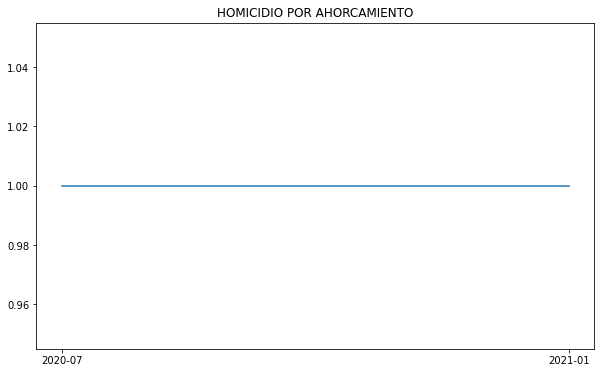

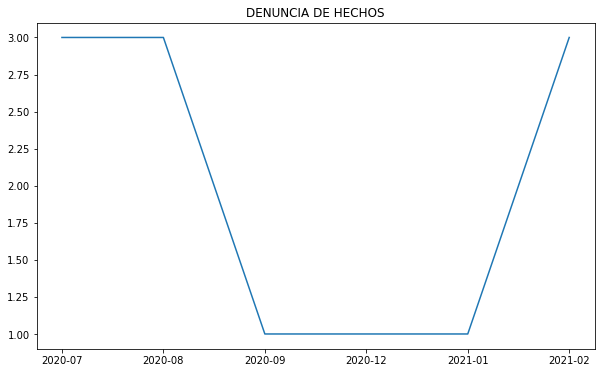

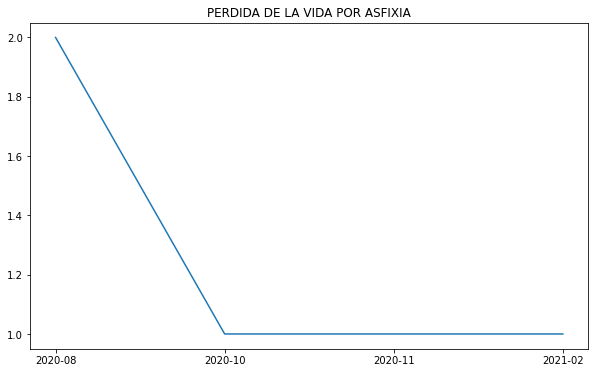

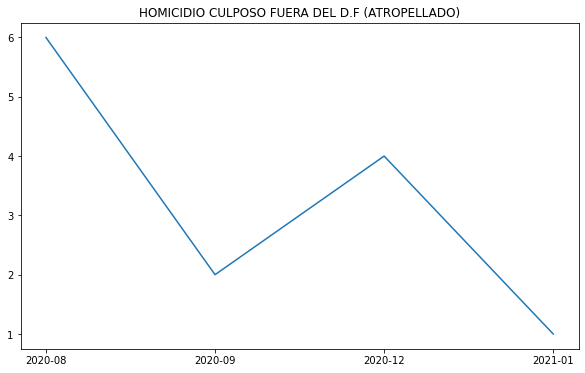

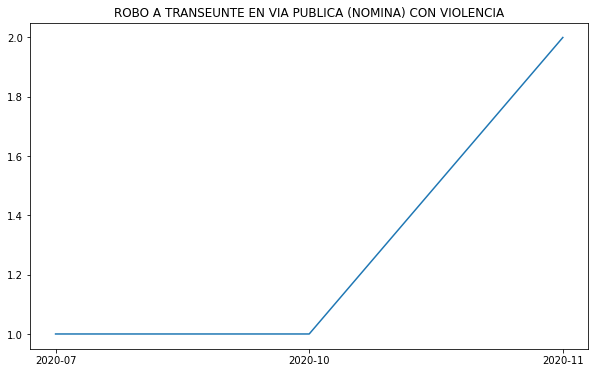

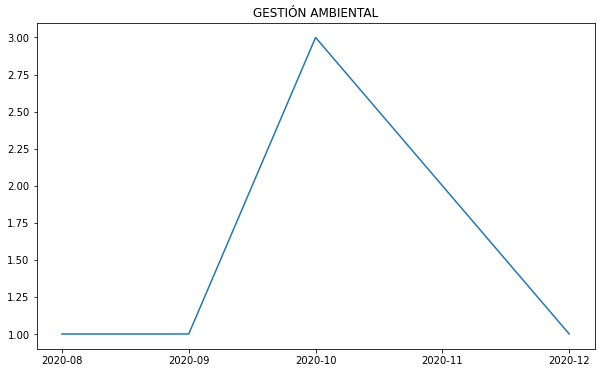

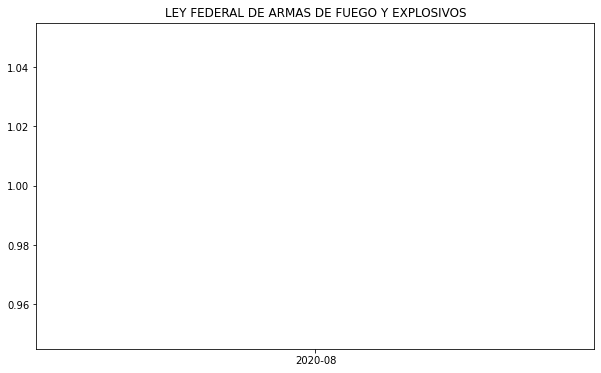

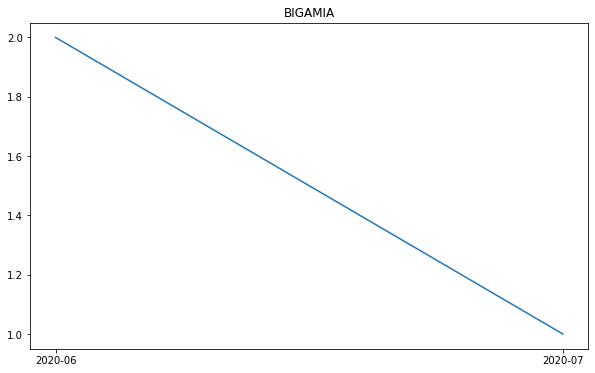

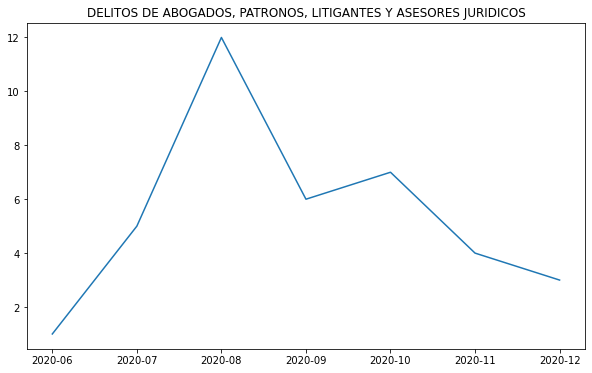

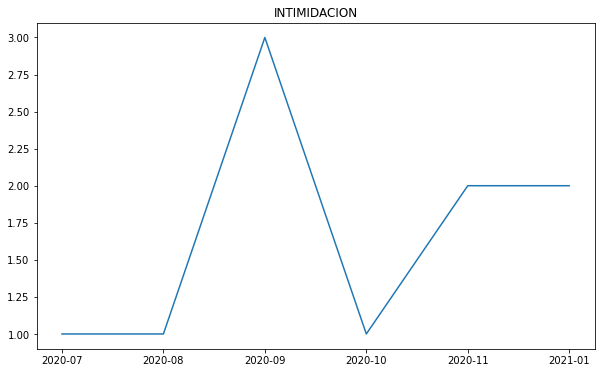

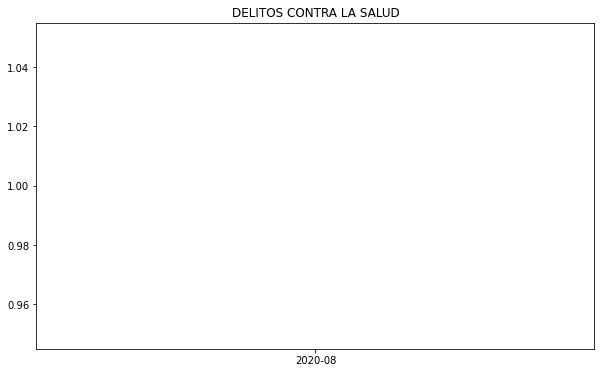

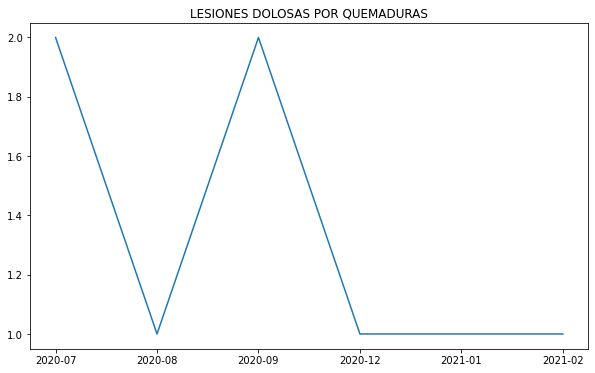

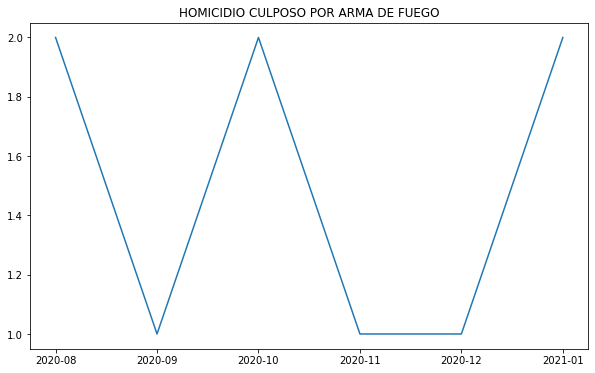

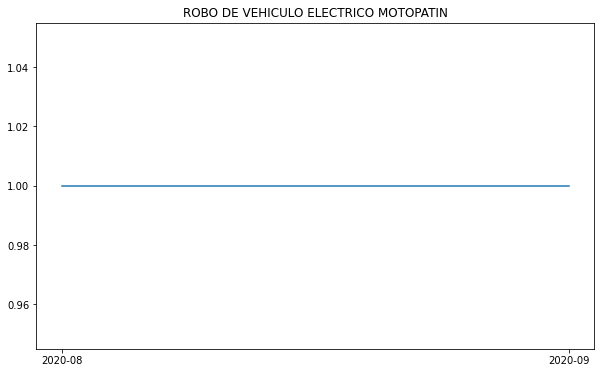

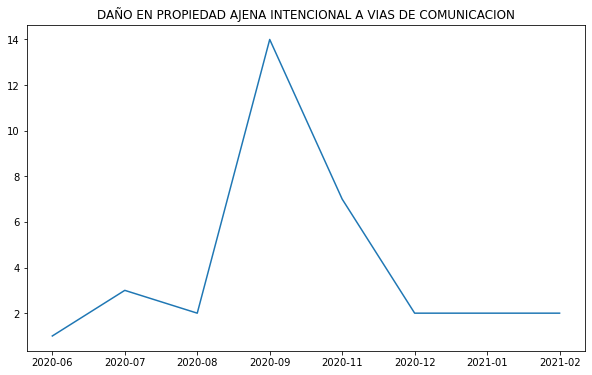

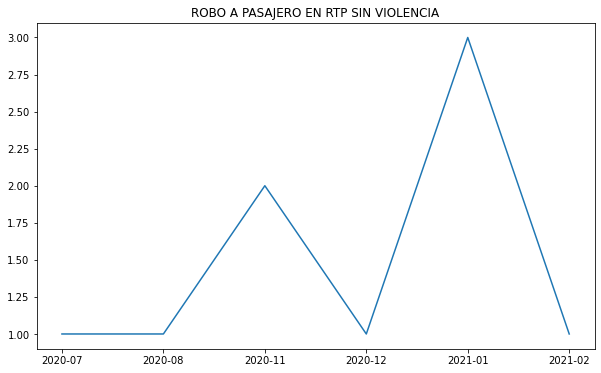

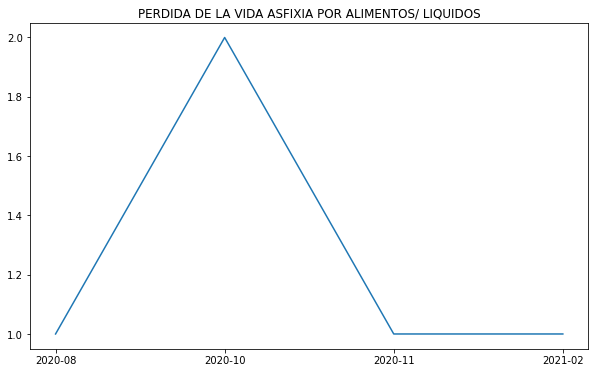

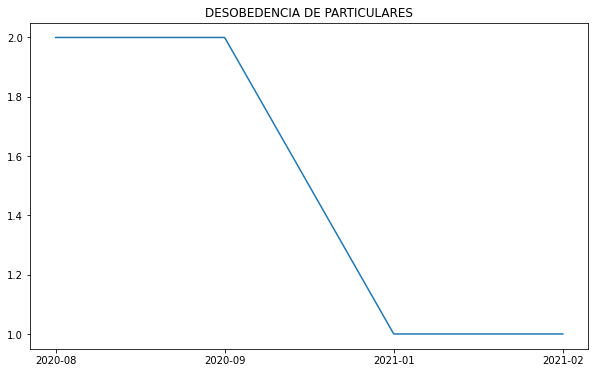

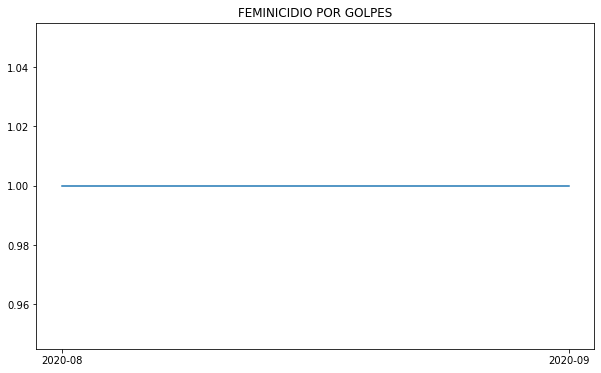

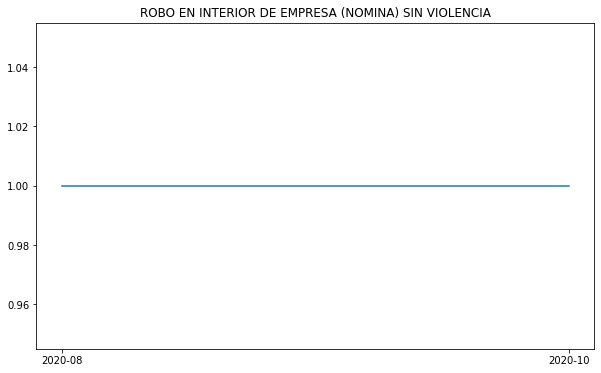

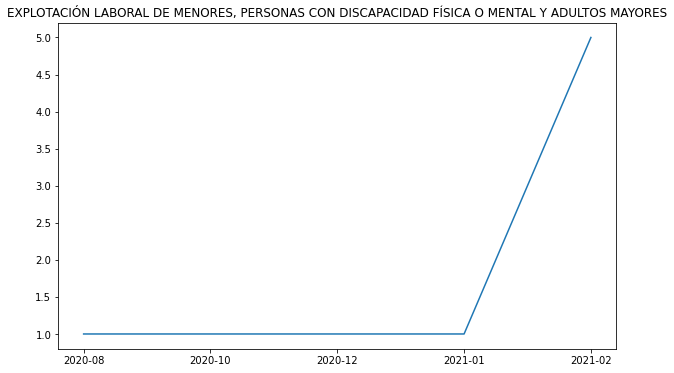

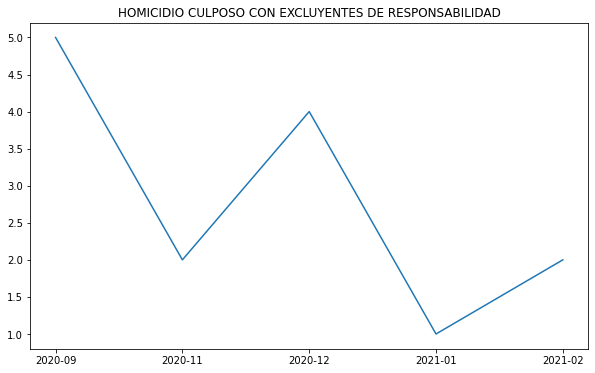

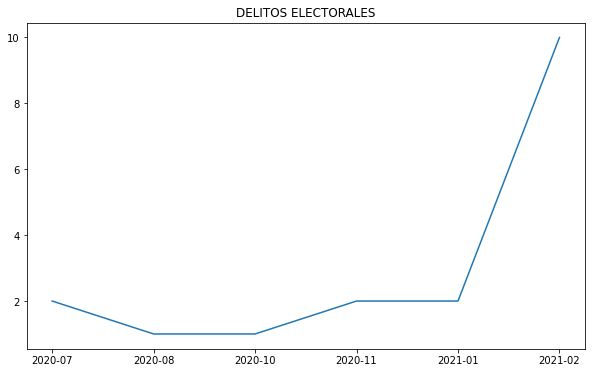

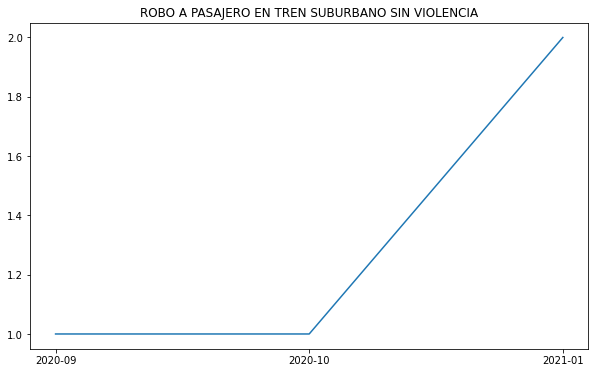

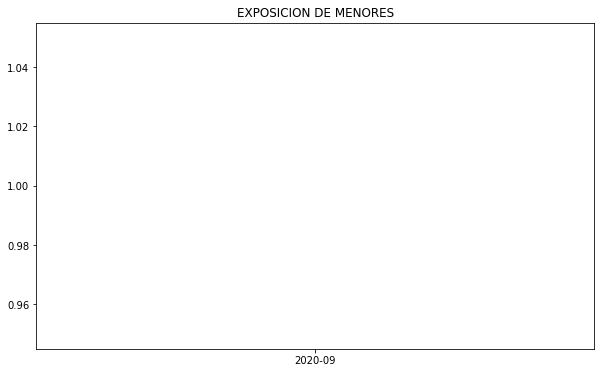

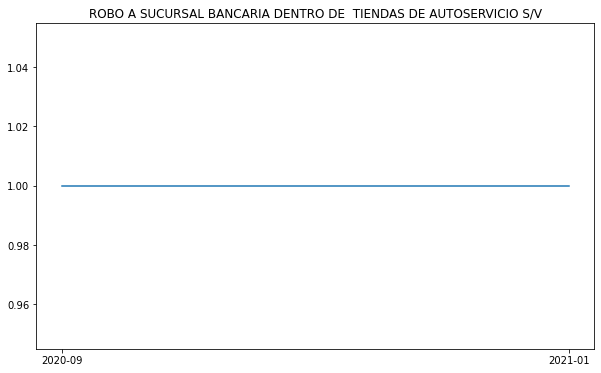

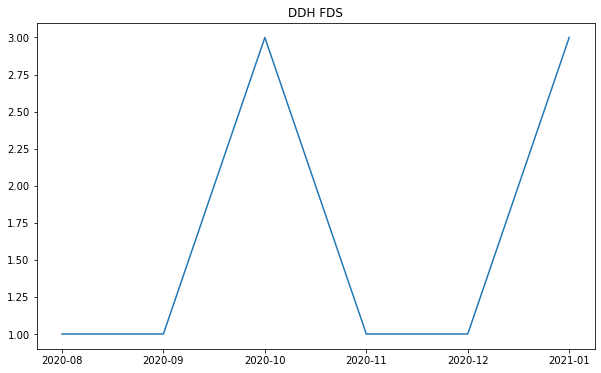

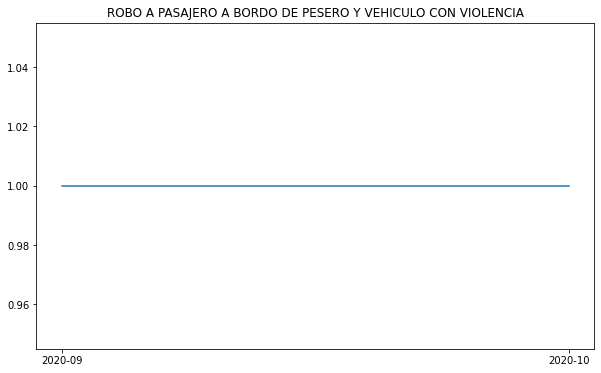

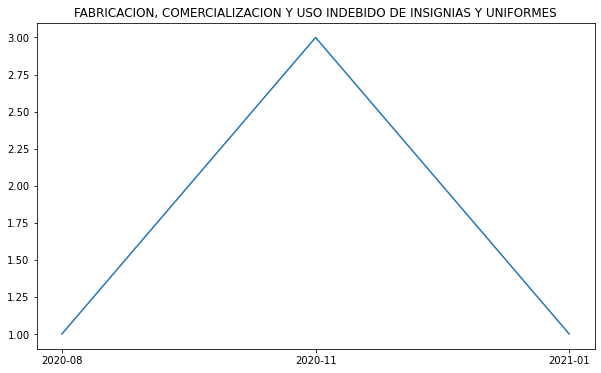

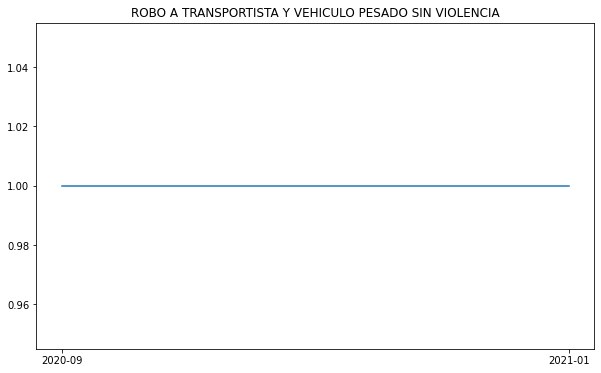

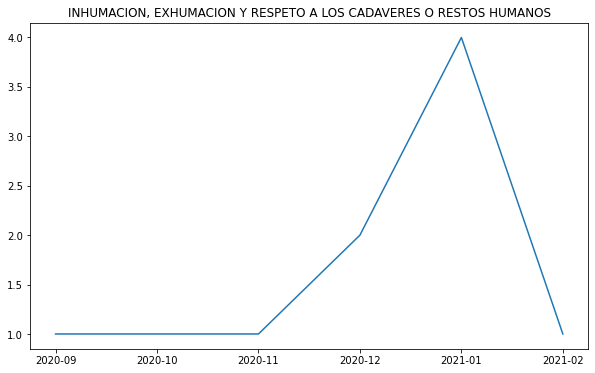

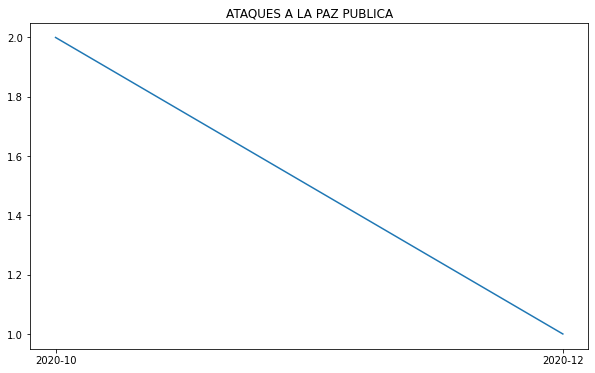

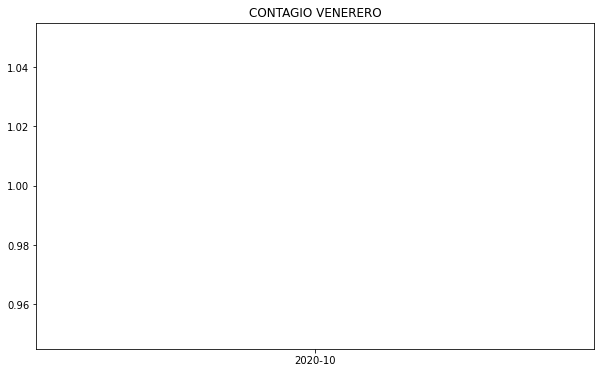

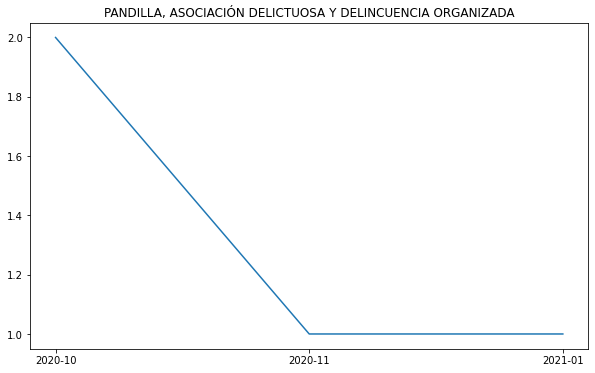

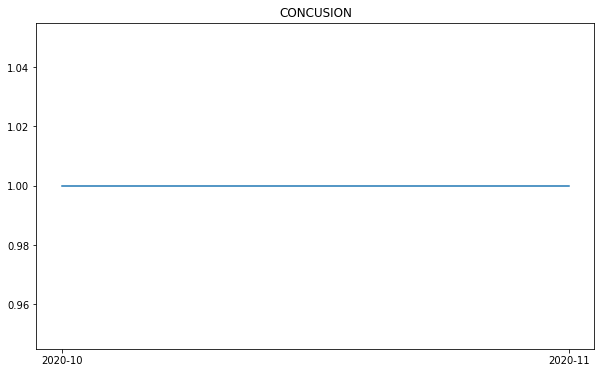

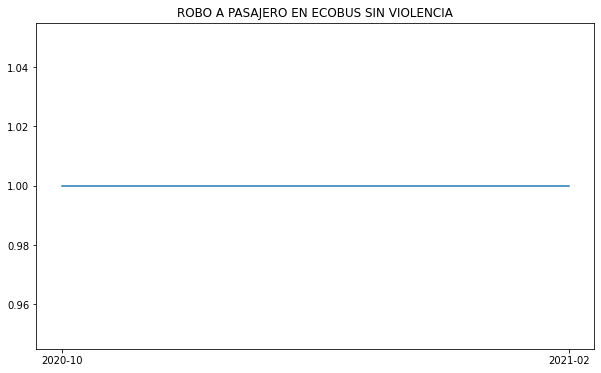

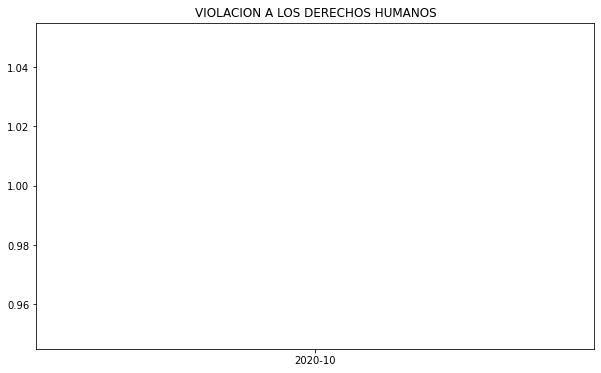

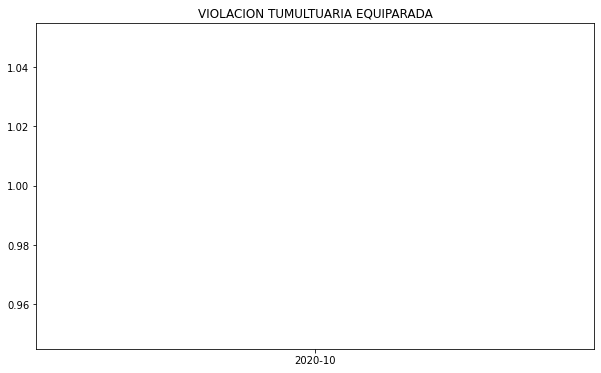

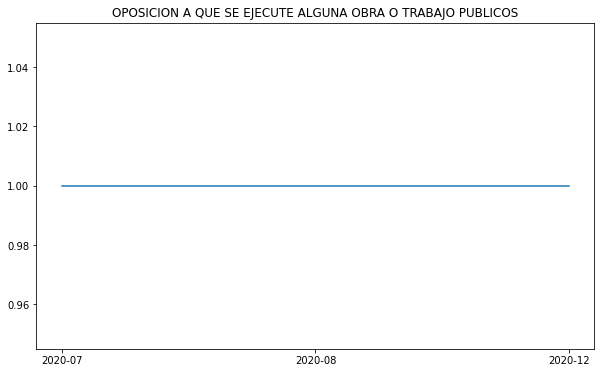

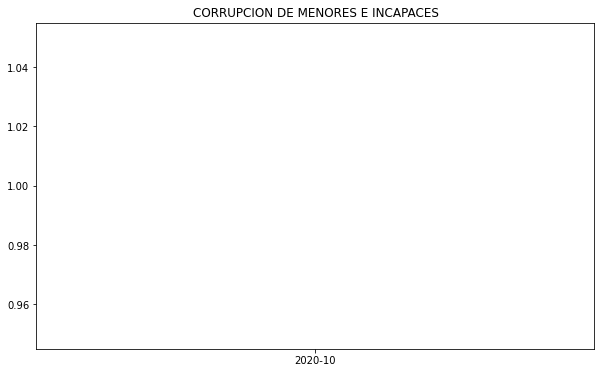

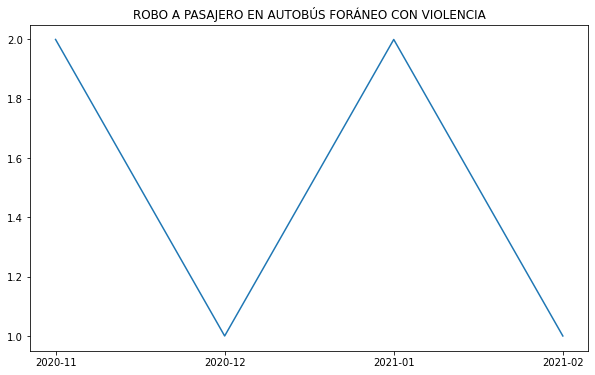

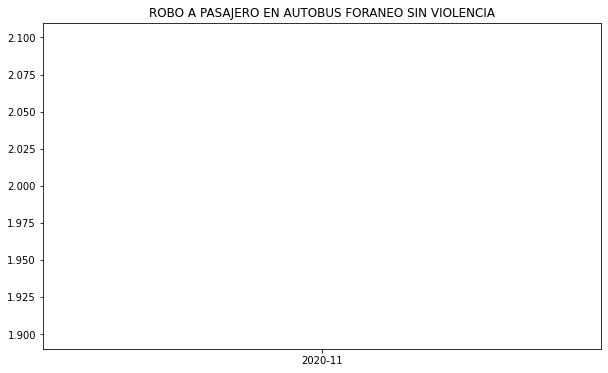

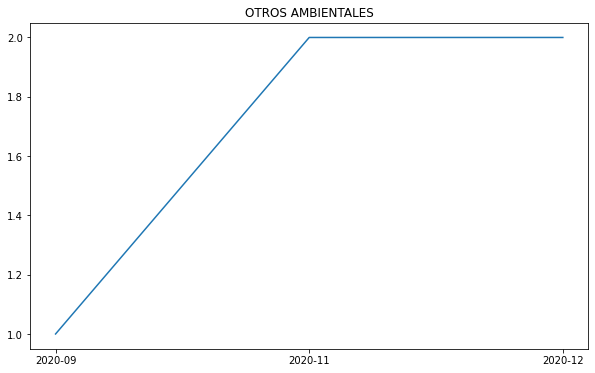

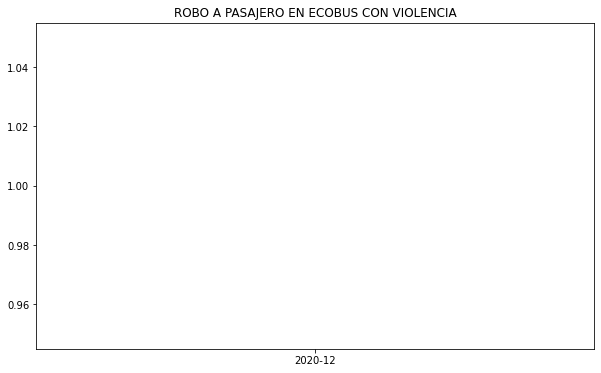

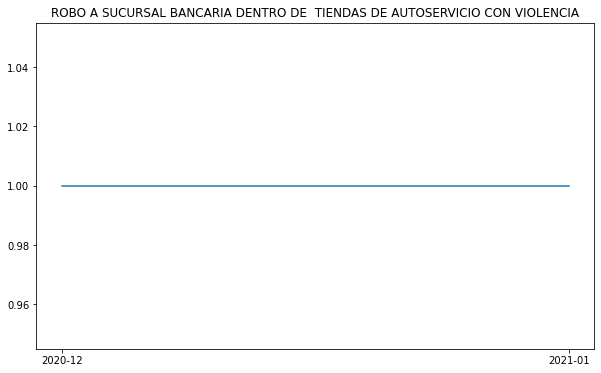

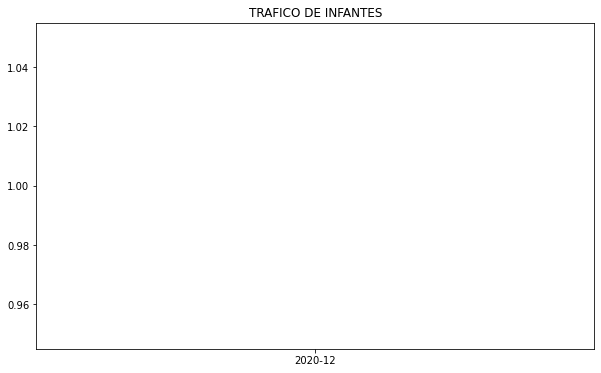

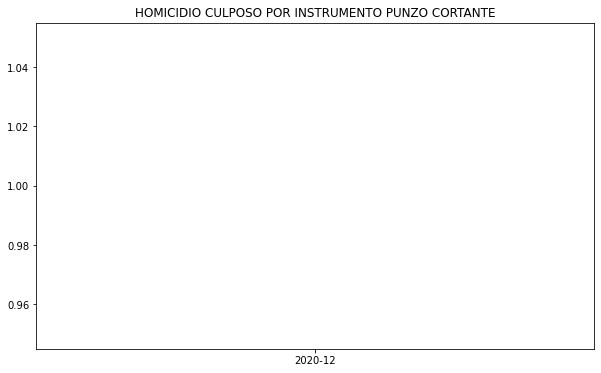

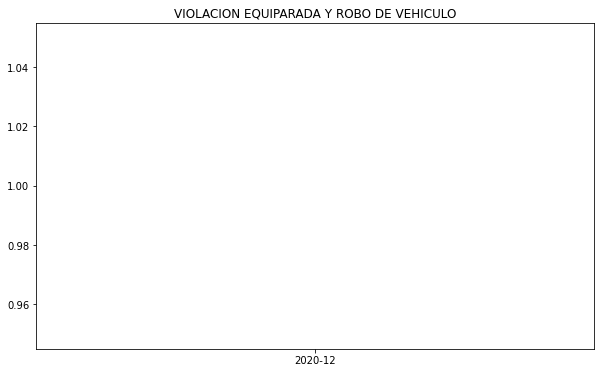

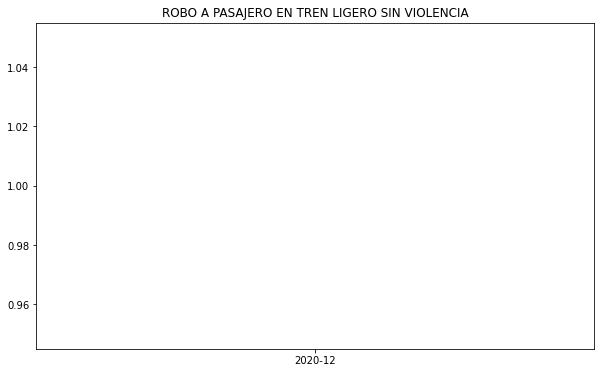

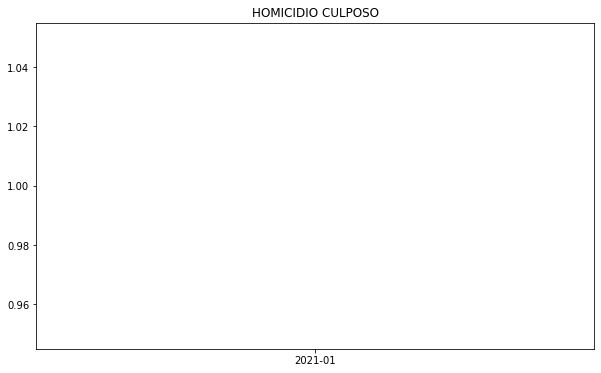

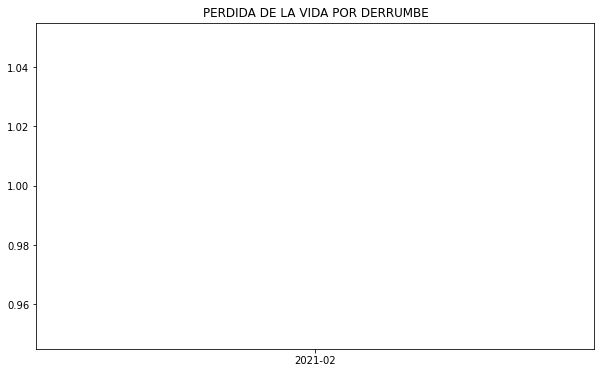

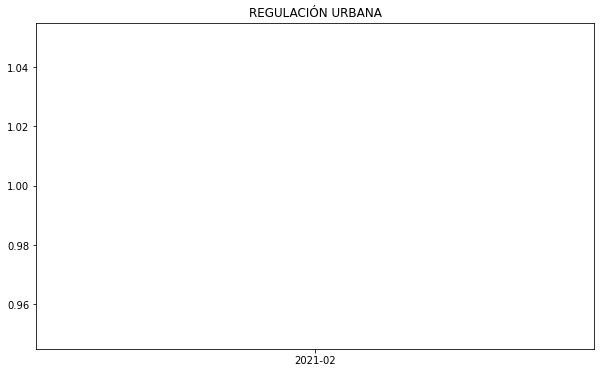

In [50]:
for delito in pgr_lastyear.delito.unique():
    aux = pgr_lastyear[pgr_lastyear.delito == delito].groupby(['mes_anio_hechos'])[['num_delitos']].sum()
    fig = plt.figure(figsize=(10,6))
    plt.plot(aux)
    plt.title(delito)
    plt.show()

## ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea esto?

In [51]:
pgr.groupby(['alcaldia_hechos']).sum()[['num_delitos']].sort_values(by='num_delitos')

num_delitos
alcaldia_hechos                   
ABALA                            1
ENCARNACION DE DIAZ              1
SAN JUAN GUICHICOVI              1
SAN JUAN DE LOS LAGOS            1
ERONGARICUARO                    1
...                            ...
ALVARO OBREGON               78922
BENITO JUAREZ                97733
GUSTAVO A MADERO            117082
IZTAPALAPA                  175723
CUAUHTEMOC                  182728

[542 rows x 1 columns]

## Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [52]:
pgr.groupby(['alcaldia_hechos','colonia_hechos']).sum()[['num_delitos']].sort_values(by='num_delitos')

num_delitos
alcaldia_hechos colonia_hechos               
ABALA           nan                         1
BUSTAMANTE      nan                         1
BUCTZOTZ        nan                         1
BOCOYNA         nan                         1
RAFAEL DELGADO  nan                         1
...                                       ...
BENITO JUAREZ   NARVARTE                12516
CUAUHTEMOC      ROMA NORTE              14181
BENITO JUAREZ   DEL VALLE CENTRO        17141
CUAUHTEMOC      DOCTORES                22761
                CENTRO                  38682

[2350 rows x 1 columns]

## ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [53]:
pgr_seasonality = pgr[~(pgr.fecha_hechos.isnull())].copy()

pgr_seasonality = pgr_seasonality[pgr_seasonality.fecha_hechos>=datetime(2016,1,1)]

In [54]:
pgr_seasonality['mes'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.month)
pgr_seasonality['dia'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.day)
pgr_seasonality['year'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.year)
pgr_seasonality['week'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.week)

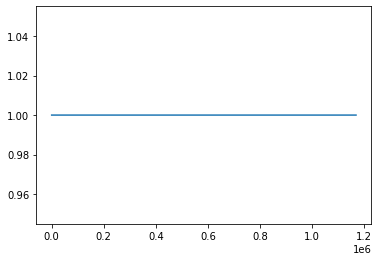

In [55]:
plt.plot(pgr_seasonality.num_delitos)

In [56]:
pgr_seasonality['hour'] = pgr_seasonality['fecha_hechos'].apply(lambda x: x.hour)

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

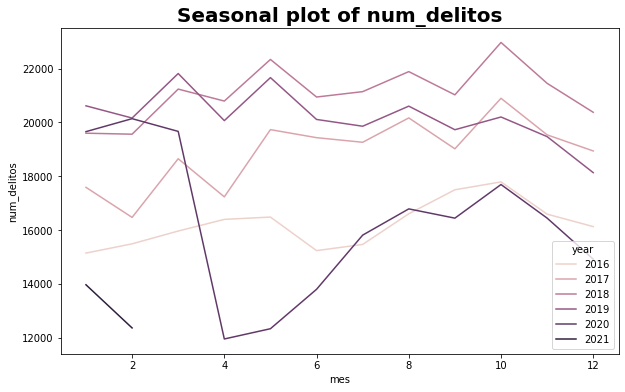

In [57]:
aux = pgr_seasonality.groupby(['year','mes']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['mes'], aux['num_delitos'], hue=aux['year'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

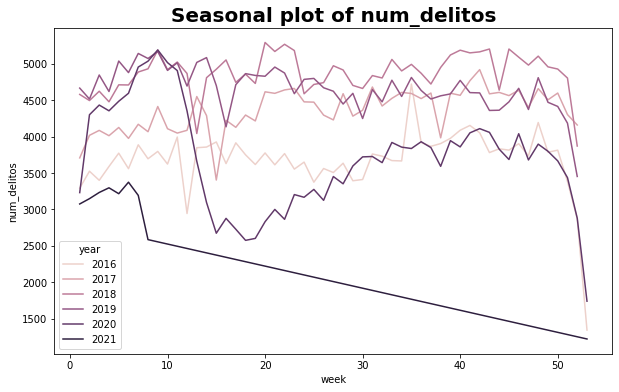

In [58]:
aux = pgr_seasonality.groupby(['year','week']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['week'], aux['num_delitos'], hue=aux['year'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

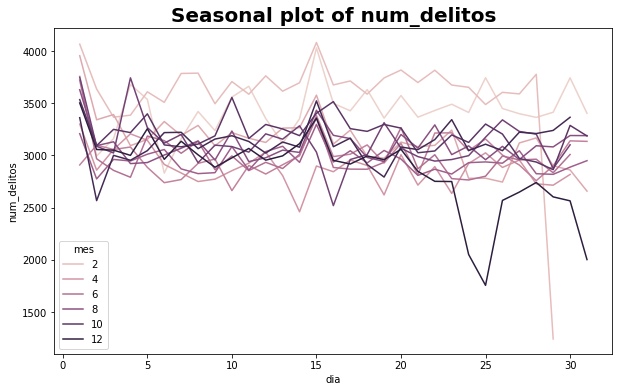

In [59]:
aux = pgr_seasonality.groupby(['mes','dia']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['dia'], aux['num_delitos'], hue=aux['mes'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

/home/abraxas/venv/opi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal plot of num_delitos')

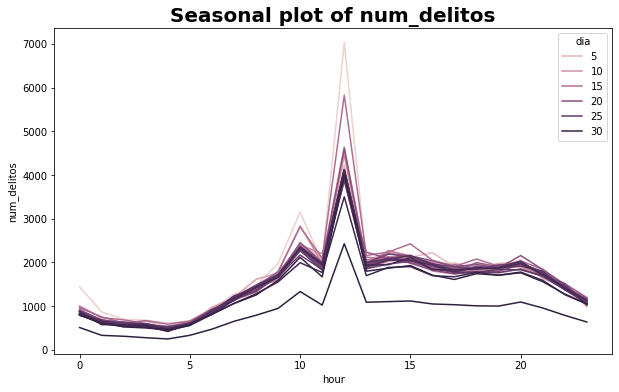

In [60]:
aux = pgr_seasonality.groupby(['dia','hour']).sum()[['num_delitos']].reset_index()
fig = plt.figure(figsize=(10,6))
sns.lineplot(aux['hour'], aux['num_delitos'], hue=aux['dia'])
plt.title('Seasonal plot of num_delitos', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
#('Month', fontsize = 16, fontdict=dict(weight='bold'))
#fig.set_ylabel('Num delitos', fontsize = 16, fontdict=dict(weight='bold'))

In [61]:
pgr_seasonality[pgr_seasonality.hour == 11].delito.value_counts(1)

VIOLENCIA FAMILIAR                                                                             0.101058
FRAUDE                                                                                         0.073872
ROBO DE OBJETOS                                                                                0.066469
AMENAZAS                                                                                       0.058714
ROBO A NEGOCIO SIN VIOLENCIA                                                                   0.049898
                                                                                                 ...   
ENTREGA ILEGITIMA DE UN MENOR                                                                  0.000017
EXPLOTACIÓN LABORAL DE MENORES, PERSONAS CON DISCAPACIDAD FÍSICA O MENTAL Y ADULTOS MAYORES    0.000017
ROBO A TRANSEUNTE EN CINE CON VIOLENCIA                                                        0.000017
INHUMACIONES Y/O EXHUMACIONES                                   

## ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [62]:
pgr_rep_alcaldia = pd.pivot_table(data=pgr[['num_delitos','delito','alcaldia_hechos']],index='delito',columns='alcaldia_hechos',
                                  aggfunc=np.sum).fillna(0)


In [63]:
pgr_rep_alcaldia.columns = [x[1] for x in pgr_rep_alcaldia.columns]

In [64]:
pgr_rep_alcaldia['TOTAL'] = pgr_rep_alcaldia.sum(axis=1)

In [65]:
pgr_rep_alcaldia.drop('nan',axis=1,inplace=True)

In [66]:
columnas = [x for x in pgr_rep_alcaldia.columns if x!='TOTAL']
for col in columnas:
    pgr_rep_alcaldia[col] = pgr_rep_alcaldia[col]/pgr_rep_alcaldia['TOTAL']


In [67]:
pgr_rep_alcaldia.drop('TOTAL',axis=1,inplace=True)

In [68]:
pgr_rep_alcaldia

ABALA  ACAMBARO   ACAMBAY  \
delito                                                                          
ABANDONO DE PERSONA                                   0.0  0.000000  0.000000   
ABORTO                                                0.0  0.000000  0.000000   
ABUSO DE AUTORIDAD                                    0.0  0.000000  0.000000   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...    0.0  0.000000  0.000000   
ABUSO DE CONFIANZA                                    0.0  0.000000  0.000000   
...                                                   ...       ...       ...   
VIOLACION TUMULTUARIA                                 0.0  0.000000  0.000000   
VIOLACION TUMULTUARIA EQUIPARADA                      0.0  0.000000  0.000000   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO         0.0  0.000000  0.000000   
VIOLACION Y ROBO DE VEHICULO                          0.0  0.000000  0.000000   
VIOLENCIA FAMILIAR                                    0.0  0.000009  0.000009   

                                                    ACAPULCO DE JUAREZ  \
delito                                                                   
ABANDONO DE PERSONA                                           0.000000   
ABORTO                                                        0.000000   
ABUSO DE AUTORIDAD                                            0.000000   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...            0.000000   
ABUSO DE CONFIANZA                                            0.000000   
...                                                                ...   
VIOLACION TUMULTUARIA                                         0.000000   
VIOLACION TUMULTUARIA EQUIPARADA                              0.000000   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO                 0.000000   
VIOLACION Y ROBO DE VEHICULO                                  0.000000   
VIOLENCIA FAMILIAR                                            0.000026   

                                                    ACATLAN  ACATZINGO  \
delito                                                                   
ABANDONO DE PERSONA                                     0.0        0.0   
ABORTO                                                  0.0        0.0   
ABUSO DE AUTORIDAD                                      0.0        0.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      0.0        0.0   
ABUSO DE CONFIANZA                                      0.0        0.0   
...                                                     ...        ...   
VIOLACION TUMULTUARIA                                   0.0        0.0   
VIOLACION TUMULTUARIA EQUIPARADA                        0.0        0.0   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO           0.0        0.0   
VIOLACION Y ROBO DE VEHICULO                            0.0        0.0   
VIOLENCIA FAMILIAR                                      0.0        0.0   

                                                    ACAXOCHITLAN  ACAYUCAN  \
delito                                                                       
ABANDONO DE PERSONA                                          0.0       0.0   
ABORTO                                                       0.0       0.0   
ABUSO DE AUTORIDAD                                           0.0       0.0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...           0.0       0.0   
ABUSO DE CONFIANZA                                           0.0       0.0   
...                                                          ...       ...   
VIOLACION TUMULTUARIA                                        0.0       0.0   
VIOLACION TUMULTUARIA EQUIPARADA                             0.0       0.0   
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO                0.0       0.0   
VIOLACION Y ROBO DE VEHICULO                                 0.0       0.0   
VIOLENCIA FAMILIAR                                           0.0       0.0   

                                                     ACOL

In [69]:
dicc = {}
for delito in pgr_rep_alcaldia.index:
    maximo = pgr_rep_alcaldia.loc[delito].max()
    if maximo > 0.5:
        alcaldia = pgr_rep_alcaldia.loc[delito].idxmax(axis = 1, skipna = True)
        if alcaldia in dicc.keys():
            aux = dicc[alcaldia]
            dicc.update({alcaldia:aux+[delito]})
        else:
            dicc[alcaldia] = [delito]

In [70]:
dicc

{'BENITO JUAREZ': ['ASOCIACION DELICTUOSA', 'CONTAGIO VENERERO'],
 'CUAUHTEMOC': ['CALUMNIAS',
  'COACCION DE SERVIDORES PUBLICOS',
  'DDH FRVT',
  'DDH OFICIO COLABORACION',
  'DELITOS DE ABOGADOS PATRONOS Y LITIGANTES',
  'DESOBEDENCIA DE PARTICULARES',
  'FALSEDAD ANTE AUTORIDADES',
  'FALSEDAD DE DECLARACIONES',
  'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',
  'ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA',
  'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
  'ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA',
  'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
  'ROBO DE INFANTE',
  'ULTRAJES'],
 'TLAHUAC': ['CONTRA LA LEY GENERAL DE EXPLOSIVOS'],
 'IZTAPALAPA': ['DDH CERESO',
  'ROBO DE VEHICULO Y NOMINA CON VIOLENCIA',
  'ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA',
  'VIOLACION A LOS DERECHOS HUMANOS'],
 'GUSTAVO A MADERO': ['DESACATO',
  'LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS',
  'UTILIZACION INDEBIDA DE LA VIA PUBLICA'],
 'TLALPAN': ['PROCREACION ASISTIDA'],
 

In [71]:
pgr_rep_alcaldia.loc['ABANDONO DE PERSONA'].idxmax(axis = 1, skipna = True)

'CUAUHTEMOC'

## Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

In [103]:
path_u = "data/09_ciudaddemexico/conjunto de datos/09a.shx"
path_r = "data/09_ciudaddemexico/conjunto de datos/09ar.shp"

In [104]:
ageb_u = gpd.read_file(path_u)
ageb_r = gpd.read_file(path_r)

In [105]:
ageb_u['tipo'] = 'U'
ageb_r['tipo'] = 'R'

In [106]:
ageb = ageb_u.append(ageb_r).reset_index(drop=True)

<Figure size 720x432 with 0 Axes>

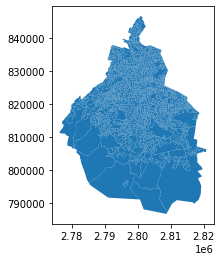

In [107]:
fig = plt.figure(figsize=(10,6))
ageb.plot();

### Sistema de coordenadas

https://stackoverflow.com/questions/31900600/python-and-shapefile-very-large-coordinates-after-importing-shapefile
https://inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/nueva_estruc/702825109226.pdf
https://all-geo.org/volcan01010/2012/11/change-coordinates-with-pyproj/

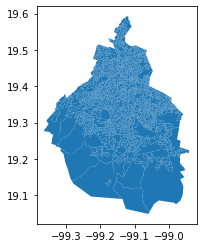

CVE_ENT CVE_LOC CVE_MUN CVE_AGEB  \
2040      09    0001     015     1055   
712       09    0001     007     4274   
1029      09    0001     007     2846   
1467      09    0001     011     1357   
2342      09    0001     017     0615   
1251      09    0011     009     0543   
2003      09    0001     015     1479   
99        09    0001     002     0970   
2169      09    0001     016     1029   
1593      09    0001     012     0021   

                                               geometry tipo CVEGEO  
2040  POLYGON ((-99.13449 19.42411, -99.13426 19.423...    U    NaN  
712   POLYGON ((-98.97758 19.32803, -98.97718 19.327...    U    NaN  
1029  POLYGON ((-99.06977 19.33895, -99.06949 19.338...    U    NaN  
1467  POLYGON ((-99.04493 19.31286, -99.04497 19.312...    U    NaN  
2342  POLYGON ((-99.11068 19.42729, -99.11043 19.427...    U    NaN  
1251  POLYGON ((-99.00387 19.22272, -99.00383 19.222...    U    NaN  
2003  POLYGON ((-99.15530 19.40534, -99.15540 19.404...    U    NaN  
99    POLYGON ((-99.20205 19.49911, -99.20213 19.499...    U    NaN  
2169  POLYGON ((-99.18162 19.41236, -99.18215 19.411...    U    NaN  
1593  POLYGON ((-99.21919 19.31114, -99.21901 19.310...    U    NaN

In [108]:
# convert projection to familiar lat/lon
ageb_ = ageb.to_crs('WGS84')

ageb_.plot()
plt.show()
display(ageb_.sample(10))


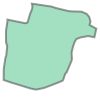

In [110]:
ageb_[ageb_.CVE_AGEB == '0505'].geometry.values[0]

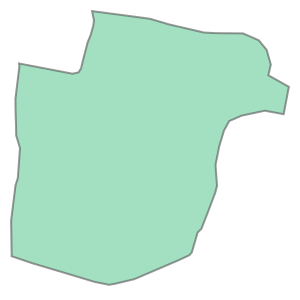

In [111]:
ageb[ageb.CVE_AGEB == '0505'].geometry.values[0]

#### Pruebas Tlalpan

In [112]:
point = Point(longitud,latitud)

NameError: name 'longitud' is not defined

In [113]:
ageb_[ageb_.CVE_AGEB=='0505'].geometry.values[1].contains(point)

NameError: name 'point' is not defined

In [114]:
ageb_[ageb_.CVE_AGEB=='0505'].geometry.values[0].contains(point)

NameError: name 'point' is not defined

## Cambiar sistema de coordenadas

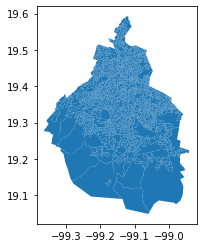

CVE_ENT CVE_LOC CVE_MUN CVE_AGEB  \
2155      09    0001     016     0302   
1878      09    0001     013     0438   
48        09    0001     002     0966   
811       09    0001     007     4999   
1700      09    0001     012     0534   
2003      09    0001     015     1479   
1855      09    0001     013     1559   
315       09    0001     005     1542   
1751      09    0001     012     0093   
1024      09    0001     007     2776   

                                               geometry tipo CVEGEO  
2155  POLYGON ((-99.21680 19.44984, -99.21695 19.449...    U    NaN  
1878  POLYGON ((-99.09756 19.23889, -99.09759 19.238...    U    NaN  
48    POLYGON ((-99.20723 19.50387, -99.20684 19.503...    U    NaN  
811   POLYGON ((-99.02667 19.34456, -99.02678 19.342...    U    NaN  
1700  POLYGON ((-99.14291 19.29071, -99.14203 19.290...    U    NaN  
2003  POLYGON ((-99.15530 19.40534, -99.15540 19.404...    U    NaN  
1855  POLYGON ((-99.02523 19.24551, -99.02506 19.245...    U    NaN  
315   POLYGON ((-99.06593 19.48439, -99.06578 19.484...    U    NaN  
1751  POLYGON ((-99.18560 19.29963, -99.18551 19.298...    U    NaN  
1024  POLYGON ((-99.02260 19.34205, -99.02268 19.341...    U    NaN

In [115]:
## convert projection to familiar lat/lon
ageb = ageb.to_crs('WGS84')
ageb.plot()
plt.show()
display(ageb.sample(10))

### AGEB por coordenada

https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [116]:
def get_AGEB(coord):
    point = Point(coord[1],coord[2])
    for cve,poligono in zip(ageb.CVE_AGEB,ageb.geometry):
        if poligono.contains(point):
            return (coord[0],cve)


In [134]:
ls_coords = [(i,longitud,latitud) for i,longitud,latitud in zip(range(len(pgr)),pgr.longitud,pgr.latitud)]

In [136]:
start = datetime.now()
pool = multiprocessing.Pool()
r =pool.map(get_AGEB,ls_coords)
end = datetime.now()

Process ForkPoolWorker-126:
Process ForkPoolWorker-119:
Process ForkPoolWorker-125:
Process ForkPoolWorker-124:
Process ForkPoolWorker-118:
Process ForkPoolWorker-127:
Process ForkPoolWorker-120:
Process ForkPoolWorker-121:
Process ForkPoolWorker-123:
Process ForkPoolWorker-117:
Process ForkPoolWorker-122:
Process ForkPoolWorker-116:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315

In [ ]:
print(end-start)

In [117]:
import pickle
r = pickle.load(open('ageb_coords.p','rb'))

In [118]:
len(r)

1168152

In [119]:
aux = [x for x in r if x!= None]

In [120]:
dicc_ageb_id = dict(zip([x[0] for x in aux],[x[1] for x in aux]))

In [121]:
pgr['id_ageb'] = range(len(pgr))

In [122]:
pgr['CVE_AGEB'] = pgr.id_ageb.apply(lambda x: dicc_ageb_id[x] if x in dicc_ageb_id.keys() else 'ND')

#### AGEB/INEGI

In [123]:
inegi = pd.read_csv('data/RESAGEBURB_09TXT10.txt',sep='\t')

inegi = inegi.groupby(['AGEB'])[['POBTOT']].sum().reset_index()

inegi.rename({'AGEB':'CVE_AGEB'},axis=1,inplace=True)

In [124]:
pgr_homdol = pgr[pgr.categoria_delito == 'HOMICIDIO DOLOSO'].copy()

pgr_homdol = pgr_homdol.groupby(['CVE_AGEB','ao_hechos'])[['num_delitos']].sum().reset_index()

pgr_homdol = pgr_homdol.merge(inegi,on='CVE_AGEB')

pgr_homdol['num_hom_100k'] = (pgr_homdol['num_delitos'] / pgr_homdol['POBTOT'])*100000

pgr_homdol = pgr_homdol.merge(ageb[['CVE_AGEB','geometry']],on=['CVE_AGEB'])

pgr_homdol = GeoDataFrame(pgr_homdol)

pgr_homdol = pgr_homdol[pgr_homdol.num_hom_100k != np.math.inf].copy()

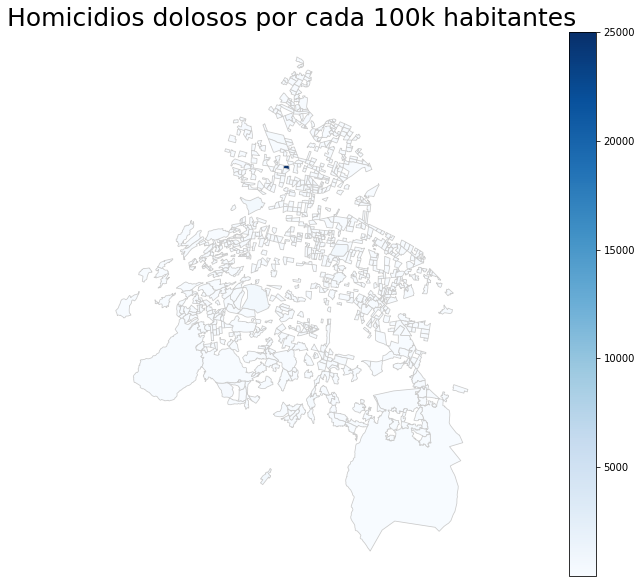

CVE_AGEB  ao_hechos  num_delitos  POBTOT  num_hom_100k  \
138      0057       2016            1      14   7142.857143   
2526     0920       2016            1     414    241.545894   
2274     0798       2016            1     506    197.628458   
2199     0770       2016            1     560    178.571429   
4424     2475       2016            5    2858    174.947516   
4423     2475       2016            5    2858    174.947516   
4712     3375       2016            4    2484    161.030596   
2113     0733       2016            1     664    150.602410   
4315     2297       2016            2    2240     89.285714   
2037     0687       2016            1    1336     74.850299   

                                               geometry  
138   POLYGON ((-99.14849 19.46299, -99.14834 19.462...  
2526  POLYGON ((-99.11233 19.41711, -99.11241 19.416...  
2274  POLYGON ((-99.18097 19.42805, -99.18079 19.428...  
2199  POLYGON ((-99.19022 19.33741, -99.19013 19.336...  
4424  POLYGON ((-99.16839 19.13749, -99.17009 19.136...  
4423  POLYGON ((-99.08550 19.37912, -99.08461 19.379...  
4712  POLYGON ((-99.14337 19.51605, -99.14399 19.515...  
2113  POLYGON ((-99.14175 19.43626, -99.14209 19.434...  
4315  POLYGON ((-99.22390 19.23171, -99.22224 19.231...  
2037  POLYGON ((-99.12303 19.42804, -99.12332 19.425...

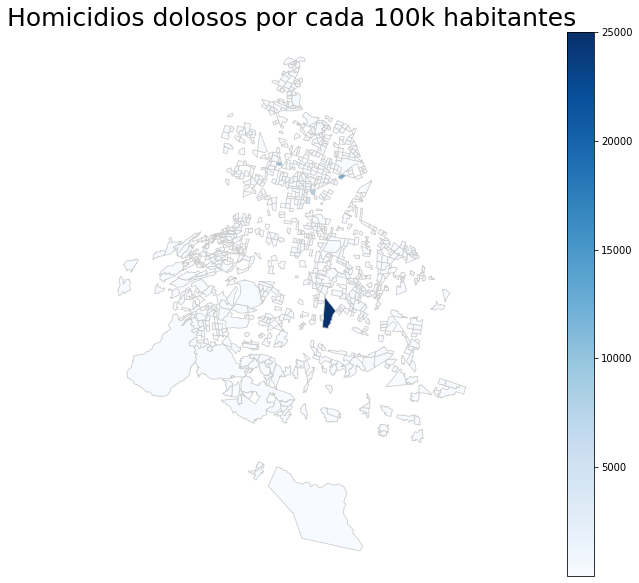

CVE_AGEB  ao_hechos  num_delitos  POBTOT  num_hom_100k  \
3194     1277       2017            2      12  16666.666667   
350      0136       2017            2      24   8333.333333   
139      0057       2017            1      14   7142.857143   
1517     0511       2017            1      18   5555.555556   
2070     0704       2017            2      60   3333.333333   
2200     0770       2017            1     560    178.571429   
2929     112A       2017            1     712    140.449438   
4425     2475       2017            4    2858    139.958013   
4426     2475       2017            4    2858    139.958013   
2563     0945       2017            3    2654    113.036925   

                                               geometry  
3194  POLYGON ((-99.09409 19.31287, -99.09394 19.312...  
350   POLYGON ((-99.07907 19.44977, -99.07870 19.449...  
139   POLYGON ((-99.14849 19.46299, -99.14834 19.462...  
1517  POLYGON ((-99.11028 19.43372, -99.11008 19.433...  
2070  POLYGON ((-99.11686 19.41984, -99.11701 19.418...  
2200  POLYGON ((-99.19022 19.33741, -99.19013 19.336...  
2929  POLYGON ((-99.10194 19.41962, -99.10178 19.419...  
4425  POLYGON ((-99.08550 19.37912, -99.08461 19.379...  
4426  POLYGON ((-99.16839 19.13749, -99.17009 19.136...  
2563  POLYGON ((-99.16443 19.42706, -99.16413 19.426...

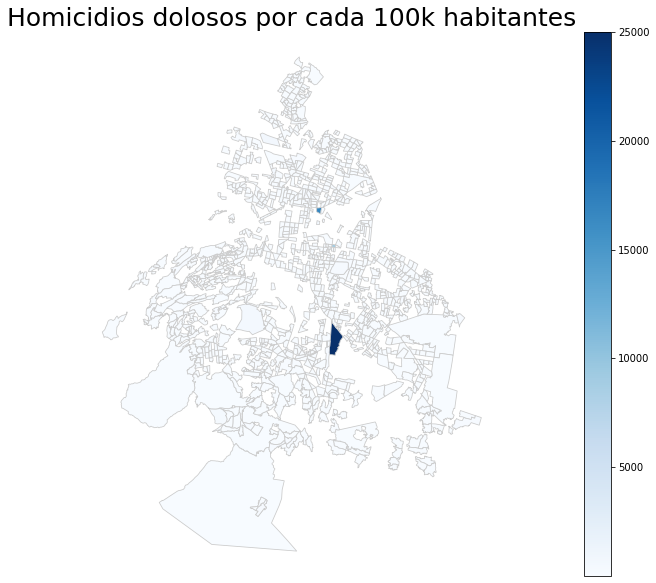

CVE_AGEB  ao_hechos  num_delitos  POBTOT  num_hom_100k  \
3195     1277       2018            1      12   8333.333333   
1518     0511       2018            1      18   5555.555556   
1370     0467       2018            1      34   2941.176471   
3026     1165       2018            2     802    249.376559   
2527     0920       2018            1     414    241.545894   
2201     0770       2018            1     560    178.571429   
1611     0542       2018           10    6026    165.947561   
2372     0834       2018            1     612    163.398693   
2039     0687       2018            2    1336    149.700599   
4443     2507       2018            7    4796    145.954962   

                                               geometry  
3195  POLYGON ((-99.09409 19.31287, -99.09394 19.312...  
1518  POLYGON ((-99.11028 19.43372, -99.11008 19.433...  
1370  POLYGON ((-99.09538 19.39466, -99.09547 19.393...  
3026  POLYGON ((-99.16737 19.50621, -99.16731 19.506...  
2527  POLYGON ((-99.11233 19.41711, -99.11241 19.416...  
2201  POLYGON ((-99.19022 19.33741, -99.19013 19.336...  
1611  POLYGON ((-99.15796 19.47361, -99.15806 19.473...  
2372  POLYGON ((-99.21112 19.43016, -99.21123 19.429...  
2039  POLYGON ((-99.12303 19.42804, -99.12332 19.425...  
4443  POLYGON ((-99.00295 19.36475, -99.00262 19.364...

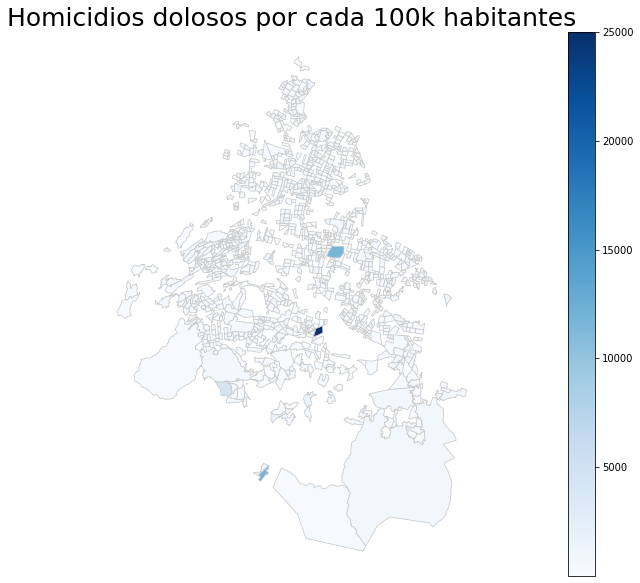

CVE_AGEB  ao_hechos  num_delitos  POBTOT  num_hom_100k  \
3156     1243       2019            1     104    961.538462   
4430     2475       2019           13    2858    454.863541   
4429     2475       2019           13    2858    454.863541   
2359     0825       2019            1     538    185.873606   
4317     2297       2019            4    2240    178.571429   
4921     4999       2019            9    6592    136.529126   
2204     0771       2019            3    2308    129.982669   
4824     4147       2019            1    1002     99.800399   
3364     1395       2019            2    2042     97.943193   
72       0038       2019            4    4880     81.967213   

                                               geometry  
3156  POLYGON ((-99.10612 19.28772, -99.10609 19.285...  
4430  POLYGON ((-99.16839 19.13749, -99.17009 19.136...  
4429  POLYGON ((-99.08550 19.37912, -99.08461 19.379...  
2359  POLYGON ((-99.16107 19.37437, -99.16160 19.372...  
4317  POLYGON ((-99.22390 19.23171, -99.22224 19.231...  
4921  POLYGON ((-99.02667 19.34456, -99.02678 19.342...  
2204  POLYGON ((-99.13202 19.43438, -99.13113 19.434...  
4824  POLYGON ((-99.07423 19.33353, -99.07424 19.333...  
3364  POLYGON ((-99.02494 19.28295, -99.02494 19.281...  
72    POLYGON ((-99.12951 19.46265, -99.12919 19.462...

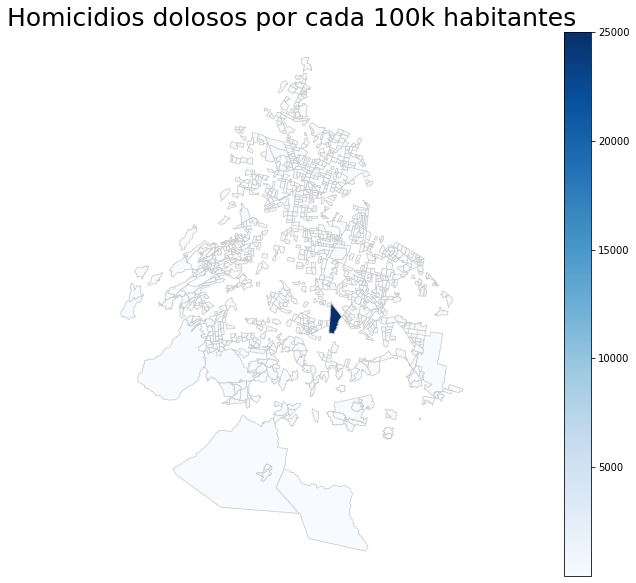

CVE_AGEB  ao_hechos  num_delitos  POBTOT  num_hom_100k  \
3196     1277       2020            3      12  25000.000000   
2102     0729       2020            1      32   3125.000000   
2071     0704       2020            1      60   1666.666667   
2710     1014       2020            2     468    427.350427   
2190     0767       2020            1     474    210.970464   
4432     2475       2020            6    2858    209.937019   
4431     2475       2020            6    2858    209.937019   
2342     0818       2020            1     498    200.803213   
2360     0825       2020            1     538    185.873606   
4318     2297       2020            4    2240    178.571429   

                                               geometry  
3196  POLYGON ((-99.09409 19.31287, -99.09394 19.312...  
2102  POLYGON ((-99.14935 19.43570, -99.14975 19.435...  
2071  POLYGON ((-99.11686 19.41984, -99.11701 19.418...  
2710  POLYGON ((-99.19705 19.42238, -99.19668 19.422...  
2190  POLYGON ((-99.13625 19.43343, -99.13644 19.432...  
4432  POLYGON ((-99.16839 19.13749, -99.17009 19.136...  
4431  POLYGON ((-99.08550 19.37912, -99.08461 19.379...  
2342  POLYGON ((-99.14109 19.43281, -99.13955 19.432...  
2360  POLYGON ((-99.16107 19.37437, -99.16160 19.372...  
4318  POLYGON ((-99.22390 19.23171, -99.22224 19.231...

In [125]:
for anio in range(2016,2021):
    ###### create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(30, 10))
    vmin, vmax = min(pgr_homdol.num_hom_100k),max(pgr_homdol.num_hom_100k)
    ###### remove the axis
    ax.axis('off')
    ###### add a title and annotation
    ax.set_title('Homicidios dolosos por cada 100k habitantes', fontdict={'fontsize': '25', 'fontweight' : '3'})
    #ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='######555555')
    ###### Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    ###### empty array for the data range
    sm.set_array([]) ###### or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
    ###### add the colorbar to the figure
    fig.colorbar(sm)
    ###### create map
    pgr_homdol[pgr_homdol.ao_hechos == anio].plot(column='num_hom_100k', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()
    display(pgr_homdol[pgr_homdol.ao_hechos == anio].sort_values(by='num_hom_100k',ascending=False).head(10))

## ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

El índice corresponde en clasificar 3 niveles la categoría del delito. según sea su gravedad. 
Nos enfocaremos por cada AGEB en métricas a nivel de los 3 niveles:

* índice por cada 100k habitantes
    
    * 10.01>    10  
    * 5.01 - 10 7.5
    * 1.01 - 5  5
    * .5 - 1  2.5
    * 0 - .5 0
 
 **Escalas de arriba en miles**

Aplicar un promedio ponderado a cada nivel de delito: Nivel 3 (50%) Nivel 2 (30%) Nivel 1 (20%) dejando al índice de inseguridad entre 0 - 10 donde 10 es el valor más alto de inseguridad

### Propuesta niveles 

In [126]:
delitos_nivel1 =  ['DELITO DE BAJO IMPACTO','HECHO NO DELICTIVO']
delitos_nivel2 = ['ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA','ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA','ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA']
delitos_nivel3 = ['LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO','VIOLACIÓN','HOMICIDIO DOLOSO',
                 'SECUESTRO', 'PLAGIO O SECUESTRO', 'FEMINICIDIO']

In [127]:
pgr['nivel_delito'] = pgr.categoria_delito.apply(lambda x: 'N1' if x in delitos_nivel1
                                                else 'N2' if x in delitos_nivel2
                                                else 'N3' if x in delitos_nivel3
                                                else 'ND')

<AxesSubplot:xlabel='ao_hechos'>

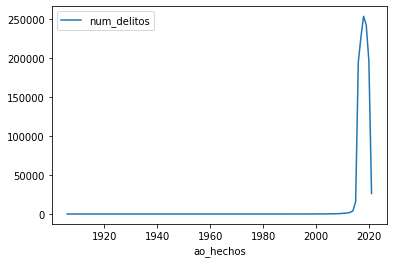

In [128]:
pgr.groupby(['ao_hechos'])[['num_delitos']].sum().plot()

Tomamos apartir de 2010 ya que se va a obtener un promedio anual de número de delitos por cada 100k y apartir de 2005 se tiene un mayor número de registros y además al tener la información del inegi más reciente y no la correspondiente en cada año, al tomar más tiempo incrementa la desviación de la población real en cada año

In [129]:
pgr_indice = pgr[pgr.ao_hechos>=2010].copy()

In [173]:
def indice_inseguridad(info):
    pgr_indice = info[0]
    ageb  = info[1]
    aux = pgr_indice[pgr_indice.CVE_AGEB == ageb][['CVE_AGEB','ao_hechos','nivel_delito','num_delitos',]].copy()
    aux = aux.merge(inegi[['CVE_AGEB','POBTOT']],on='CVE_AGEB')
    aux = aux.groupby(['nivel_delito','ao_hechos']).agg({'num_delitos':'sum','POBTOT':'min'}).reset_index()
    aux['num_100k'] = aux['num_delitos']/aux['POBTOT']*100000
    aux = aux.groupby(['nivel_delito']).agg({'num_100k':'sum'}).reset_index()
    aux['avg_anual_num_100k'] = aux['num_100k']/(2021-2010)
    aux['score'] = [0 if avg<=500 else 2.5 if avg<=2500 else 5 if avg<=5000 else 7.5 if avg<=10 else 10
                   for avg in aux.avg_anual_num_100k]
    aux['inseguridad'] = [score*0.5 if nivel == 'N1' else score*0.3 if nivel == 'N2' else score*0.2 if nivel == 'N3'
                         else np.math.nan for score,nivel in
                         zip(aux.score,aux.nivel_delito)]

    return aux.num_100k.sum(),aux.inseguridad.sum()

In [174]:
cve = pgr_indice.CVE_AGEB.values[0]
resultados = indice_inseguridad((pgr_indice,cve))
print(f'Indice de inseguridad para AGEB {cve} = {resultados[1]}')

Indice de inseguridad para AGEB 0505 = 1.25


## Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). 
11.1. ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

Variables:
    
* dummies para
    * ao_hechos
    * mes_hechos
    * categoria_delito
    * alcaldia_hechos

* fecha_inicio-mes_inicio (mediana)
* num_delitos suma 
* indice inseguridad (promedio)
* num_100k 

In [151]:
pgr_dummies = pd.get_dummies(pgr_indice[['ao_hechos','mes_hechos','categoria_delito']])

In [152]:
pgr_dummies['CVE_AGEB'] = pgr_indice['CVE_AGEB']

In [153]:
len(pgr_dummies)

1164994

In [154]:
#Dummies
pgr_dummies = pgr_dummies.groupby(['CVE_AGEB']).sum().reset_index()

In [155]:
#Tiempo transcurrido para abrir una carpeta de investigación
pgr_indice['tiempo_investigacion'] = (pgr_indice['fecha_inicio'].dt.date-pgr_indice['fecha_hechos'].dt.date).dt.days

In [156]:
#TAD
pgr_ageb = pgr_indice.groupby(['CVE_AGEB']).agg({'tiempo_investigacion':'mean','num_delitos':'sum'}).reset_index()

In [157]:
#Integrando dummies
pgr_ageb = pgr_ageb.merge(pgr_dummies,on='CVE_AGEB')

In [158]:
#POblación total
pgr_ageb = pgr_ageb.merge(inegi[['CVE_AGEB','POBTOT']],on='CVE_AGEB')

In [180]:
ls_agebs = list(pgr_ageb.CVE_AGEB.unique())
i=0
dicc = {}
for cve in ls_agebs:
    i+=1
    num_100k,inseguridad = indice_inseguridad((pgr_indice,cve))
    dicc[cve] = {'num_100k':num_100k,'inseguridad':inseguridad}
    print(i)